# benchmarking on omnipath


In [1]:
from scprint import scPrint
from scprint.tasks import GRNfer

from bengrn import BenGRN
import scanpy as sc

from bengrn.base import train_classifier

from anndata.utils import make_index_unique
from bengrn import compute_genie3
from grnndata import utils as grnutils
import numpy as np

%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

💡 connected lamindb: jkobject/scprint


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/chex/_src/pytypes.py:53: DeprecationWarning: jax.core.Shape is deprecated. Use Shape = Sequence[int | Any].
  Shape = jax.core.Shape
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/chex/_src/pytypes.py:54: DeprecationWarning: jax.random.KeyArray is deprecated. Use jax.Array for annotations, and jax.dtypes.issubdtype(arr.dtype, jax.dtypes.prng_key) for runtime detection of typed prng keys (i.e. keys created with jax.random.key).
For more information, see https://jax.readthedocs.io/en/latest/jep/9263-typed-keys.html
  PRNGKey = jax.random.KeyArray
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scib_metrics/_types.py:9: DeprecationWarning: jax.random.KeyArray is deprecated. Use jax.Array for annotations, and jax.dtypes.i

In [2]:
model = scPrint.load_from_checkpoint(
    '../data/temp/o2uniqsx/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
NUM_GENES = 5000
MAXCELLS = 1024

RuntimeError caught: scPrint is not attached to a `Trainer`.

In [4]:
CELLTYPES = [
"retinal rod cell",
"Mueller cell",
"amacrine cell",
"ON-bipolar cell",
"rod bipolar cell",
"retinal cone cell",
"retina horizontal cell",
"retinal ganglion cell",
"astrocyte",
"microglial cell",
]

In [3]:
adata = sc.read_h5ad('/home/ml4ig1/scprint/.lamindb/gNNpgpo6gATjuxTE7CCp.h5ad')
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
adata

AnnData object with n_obs × n_vars = 51370 × 70116
    obs: 'biosample_id', 'donor_id', 'cell_type_ontology_term_id', 'organism_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'cell_type__custom', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'is_primary_data', 'age', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'uid', 'symbol', 'ncbi_gene_ids', 'biotype', 'desc

/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


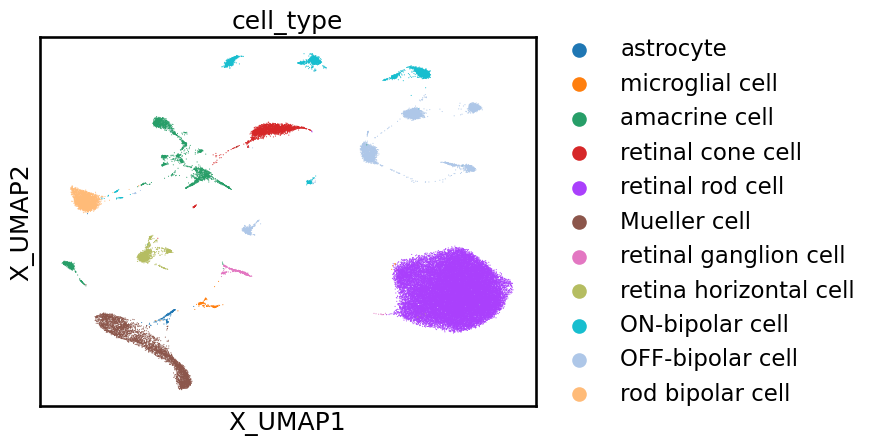

In [5]:
sc.pl.embedding(adata, basis="X_UMAP", color=['cell_type'])

/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


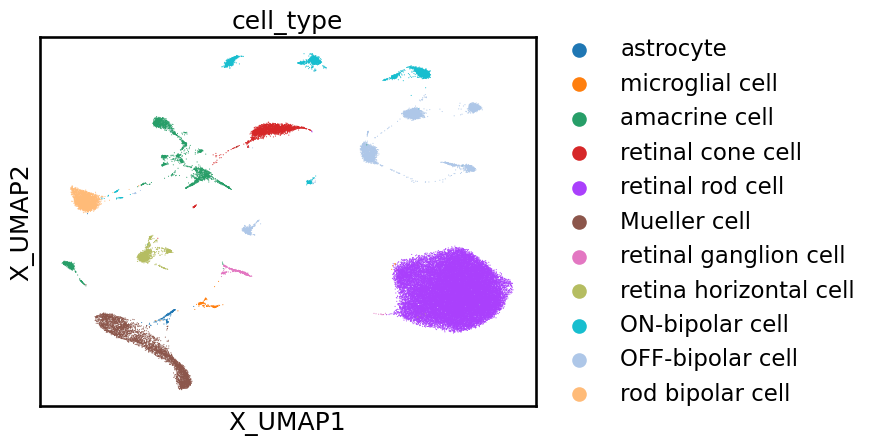

In [8]:
sc.pl.embedding(adata, basis="X_UMAP", color=['cell_type'])

In [ ]:
grn_inferer = GRNfer(model, adata[adata.X.sum(1) > 500],
                         how="most var across",
                         preprocess="softmax",
                         head_agg='mean',
                         filtration="none",
                         forward_mode="none",
                         organisms=['NCBITaxon:9606','NCBITaxon:10090'],
                         num_genes=NUM_GENES,
                         max_cells=MAXCELLS,
                         doplot=False,
                         batch_size=32,
                         )

Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:165: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/torch/utils/tensorboard/__init__.py:6: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  ) < LooseVersion("1.15"):


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

avg link count: 536246649, sparsity: 1.0

base enrichment

too many genes for central computation

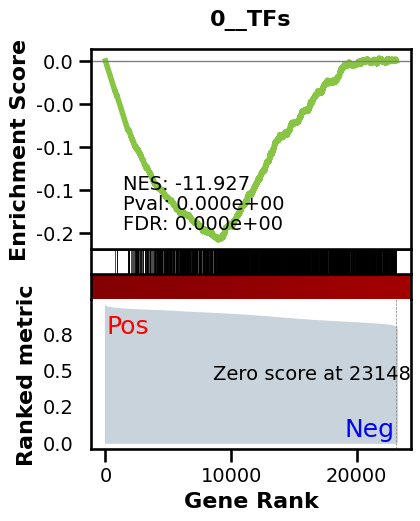

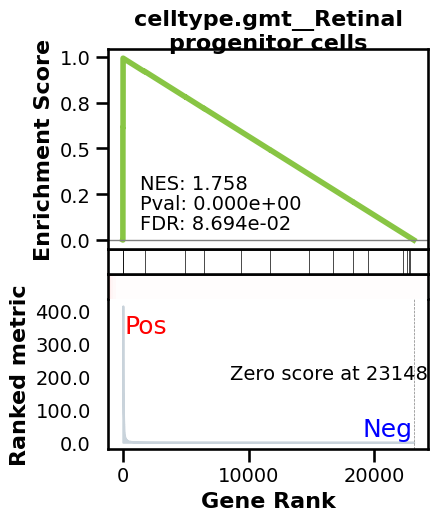

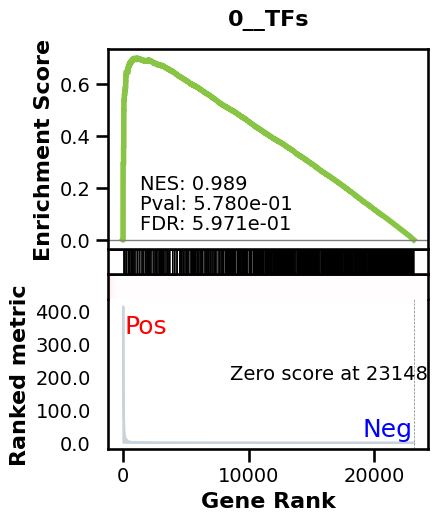

_________________________________________

TF specific enrichment

found some significant results for 

42.857142857142854

% TFs


_________________________________________

loading GT, 

omnipath

intersection of 12463 genes

intersection pct:

0.5383817875502181

precision: 

0.0006618214377693767


recall: 

1.0


random precision:

0.0006618672671051408


  0%|                                                                      | 0/128 [00:00<?, ?it/s]


  1%|▍                                                             | 1/128 [00:00<00:41,  3.07it/s]


  2%|▉                                                             | 2/128 [00:00<00:41,  3.06it/s]


  2%|█▍                                                            | 3/128 [00:00<00:41,  3.04it/s]


  3%|█▉                                                            | 4/128 [00:01<00:40,  3.05it/s]


  4%|██▍                                                           | 5/128 [00:01<00:40,  3.05it/s]


  5%|██▉                                                           | 6/128 [00:01<00:39,  3.05it/s]


  5%|███▍                                                          | 7/128 [00:02<00:39,  3.05it/s]


  6%|███▉                                                          | 8/128 [00:02<00:39,  3.05it/s]


  7%|████▎                                                         | 9/128 [00:02<00:39,  3.04it/s]


  8%|████▊                                                        | 10/128 [00:03<00:38,  3.05it/s]


  9%|█████▏                                                       | 11/128 [00:03<00:38,  3.05it/s]


  9%|█████▋                                                       | 12/128 [00:03<00:38,  3.04it/s]


 10%|██████▏                                                      | 13/128 [00:04<00:37,  3.05it/s]


 11%|██████▋                                                      | 14/128 [00:04<00:37,  3.06it/s]


 12%|███████▏                                                     | 15/128 [00:04<00:37,  3.05it/s]


 12%|███████▋                                                     | 16/128 [00:05<00:37,  3.00it/s]


 13%|████████                                                     | 17/128 [00:05<00:36,  3.01it/s]


 14%|████████▌                                                    | 18/128 [00:05<00:36,  3.02it/s]


 15%|█████████                                                    | 19/128 [00:06<00:36,  3.02it/s]


 16%|█████████▌                                                   | 20/128 [00:06<00:35,  3.04it/s]


 16%|██████████                                                   | 21/128 [00:06<00:35,  3.04it/s]


 17%|██████████▍                                                  | 22/128 [00:07<00:34,  3.03it/s]


 18%|██████████▉                                                  | 23/128 [00:07<00:34,  3.05it/s]


 19%|███████████▍                                                 | 24/128 [00:07<00:34,  3.05it/s]


 20%|███████████▉                                                 | 25/128 [00:08<00:33,  3.05it/s]


 20%|████████████▍                                                | 26/128 [00:08<00:33,  3.06it/s]


 21%|████████████▊                                                | 27/128 [00:08<00:33,  3.04it/s]


 22%|█████████████▎                                               | 28/128 [00:09<00:32,  3.04it/s]


 23%|█████████████▊                                               | 29/128 [00:09<00:32,  3.05it/s]


 23%|██████████████▎                                              | 30/128 [00:09<00:32,  3.05it/s]


 24%|██████████████▊                                              | 31/128 [00:10<00:31,  3.05it/s]


 25%|███████████████▎                                             | 32/128 [00:10<00:31,  3.05it/s]


 26%|███████████████▋                                             | 33/128 [00:10<00:31,  3.06it/s]


 27%|████████████████▏                                            | 34/128 [00:11<00:30,  3.05it/s]


 27%|████████████████▋                                            | 35/128 [00:11<00:30,  3.06it/s]


 28%|█████████████████▏                                           | 36/128 [00:11<00:30,  3.05it/s]


 29%|█████████████████▋                                           | 37/128 [00:12<00:29,  3.04it/s]


 30%|██████████████████                                           | 38/128 [00:12<00:29,  3.05it/s]


 30%|██████████████████▌                                          | 39/128 [00:12<00:29,  3.06it/s]


 31%|███████████████████                                          | 40/128 [00:13<00:28,  3.06it/s]


 32%|███████████████████▌                                         | 41/128 [00:13<00:28,  3.06it/s]


 33%|████████████████████                                         | 42/128 [00:13<00:28,  3.06it/s]


 34%|████████████████████▍                                        | 43/128 [00:14<00:27,  3.07it/s]


 34%|████████████████████▉                                        | 44/128 [00:14<00:27,  3.07it/s]


 35%|█████████████████████▍                                       | 45/128 [00:14<00:27,  3.07it/s]


 36%|█████████████████████▉                                       | 46/128 [00:15<00:26,  3.06it/s]


 37%|██████████████████████▍                                      | 47/128 [00:15<00:26,  3.06it/s]


 38%|██████████████████████▉                                      | 48/128 [00:15<00:26,  3.06it/s]


 38%|███████████████████████▎                                     | 49/128 [00:16<00:25,  3.04it/s]


 39%|███████████████████████▊                                     | 50/128 [00:16<00:25,  3.04it/s]


 40%|████████████████████████▎                                    | 51/128 [00:16<00:25,  3.04it/s]


 41%|████████████████████████▊                                    | 52/128 [00:17<00:24,  3.04it/s]


 41%|█████████████████████████▎                                   | 53/128 [00:17<00:24,  3.05it/s]


 42%|█████████████████████████▋                                   | 54/128 [00:17<00:24,  3.05it/s]


 43%|██████████████████████████▏                                  | 55/128 [00:18<00:23,  3.04it/s]


 44%|██████████████████████████▋                                  | 56/128 [00:18<00:23,  3.05it/s]


 45%|███████████████████████████▏                                 | 57/128 [00:18<00:23,  3.04it/s]


 45%|███████████████████████████▋                                 | 58/128 [00:19<00:23,  3.00it/s]


 46%|████████████████████████████                                 | 59/128 [00:19<00:23,  2.99it/s]


 47%|████████████████████████████▌                                | 60/128 [00:19<00:22,  3.01it/s]


 48%|█████████████████████████████                                | 61/128 [00:20<00:22,  3.03it/s]


 48%|█████████████████████████████▌                               | 62/128 [00:20<00:21,  3.04it/s]


 49%|██████████████████████████████                               | 63/128 [00:20<00:21,  3.05it/s]


 50%|██████████████████████████████▌                              | 64/128 [00:21<00:21,  3.04it/s]


 51%|██████████████████████████████▉                              | 65/128 [00:21<00:20,  3.04it/s]


 52%|███████████████████████████████▍                             | 66/128 [00:21<00:20,  3.04it/s]


 52%|███████████████████████████████▉                             | 67/128 [00:22<00:19,  3.05it/s]


 53%|████████████████████████████████▍                            | 68/128 [00:22<00:19,  3.05it/s]


 54%|████████████████████████████████▉                            | 69/128 [00:22<00:19,  3.05it/s]


 55%|█████████████████████████████████▎                           | 70/128 [00:22<00:18,  3.05it/s]


 55%|█████████████████████████████████▊                           | 71/128 [00:23<00:18,  3.06it/s]


 56%|██████████████████████████████████▎                          | 72/128 [00:23<00:18,  3.06it/s]


 57%|██████████████████████████████████▊                          | 73/128 [00:23<00:17,  3.06it/s]


 58%|███████████████████████████████████▎                         | 74/128 [00:24<00:17,  3.06it/s]


 59%|███████████████████████████████████▋                         | 75/128 [00:24<00:17,  3.06it/s]


 59%|████████████████████████████████████▏                        | 76/128 [00:24<00:16,  3.06it/s]


 60%|████████████████████████████████████▋                        | 77/128 [00:25<00:16,  3.05it/s]


 61%|█████████████████████████████████████▏                       | 78/128 [00:25<00:16,  3.05it/s]


 62%|█████████████████████████████████████▋                       | 79/128 [00:25<00:16,  3.01it/s]


 62%|██████████████████████████████████████▏                      | 80/128 [00:26<00:15,  3.02it/s]


 63%|██████████████████████████████████████▌                      | 81/128 [00:26<00:15,  3.03it/s]


 64%|███████████████████████████████████████                      | 82/128 [00:26<00:15,  3.04it/s]


 65%|███████████████████████████████████████▌                     | 83/128 [00:27<00:15,  2.98it/s]


 66%|████████████████████████████████████████                     | 84/128 [00:27<00:15,  2.91it/s]


 66%|████████████████████████████████████████▌                    | 85/128 [00:27<00:14,  2.91it/s]


 67%|████████████████████████████████████████▉                    | 86/128 [00:28<00:14,  2.92it/s]


 68%|█████████████████████████████████████████▍                   | 87/128 [00:28<00:13,  2.94it/s]


 69%|█████████████████████████████████████████▉                   | 88/128 [00:28<00:13,  2.98it/s]


 70%|██████████████████████████████████████████▍                  | 89/128 [00:29<00:13,  2.99it/s]


 70%|██████████████████████████████████████████▉                  | 90/128 [00:29<00:12,  3.02it/s]


 71%|███████████████████████████████████████████▎                 | 91/128 [00:29<00:12,  3.04it/s]


 72%|███████████████████████████████████████████▊                 | 92/128 [00:30<00:11,  3.05it/s]


 73%|████████████████████████████████████████████▎                | 93/128 [00:30<00:11,  3.05it/s]


 73%|████████████████████████████████████████████▊                | 94/128 [00:30<00:11,  3.05it/s]


 74%|█████████████████████████████████████████████▎               | 95/128 [00:31<00:10,  3.05it/s]


 75%|█████████████████████████████████████████████▊               | 96/128 [00:31<00:10,  3.06it/s]


 76%|██████████████████████████████████████████████▏              | 97/128 [00:31<00:10,  3.06it/s]


 77%|██████████████████████████████████████████████▋              | 98/128 [00:32<00:09,  3.05it/s]


 77%|███████████████████████████████████████████████▏             | 99/128 [00:32<00:09,  3.02it/s]


 78%|██████████████████████████████████████████████▉             | 100/128 [00:32<00:09,  3.01it/s]


 79%|███████████████████████████████████████████████▎            | 101/128 [00:33<00:08,  3.03it/s]


 80%|███████████████████████████████████████████████▊            | 102/128 [00:33<00:08,  3.04it/s]


 80%|████████████████████████████████████████████████▎           | 103/128 [00:33<00:08,  3.05it/s]


 81%|████████████████████████████████████████████████▊           | 104/128 [00:34<00:07,  3.06it/s]


 82%|█████████████████████████████████████████████████▏          | 105/128 [00:34<00:07,  3.07it/s]


 83%|█████████████████████████████████████████████████▋          | 106/128 [00:34<00:07,  3.07it/s]


 84%|██████████████████████████████████████████████████▏         | 107/128 [00:35<00:06,  3.07it/s]


 84%|██████████████████████████████████████████████████▋         | 108/128 [00:35<00:06,  3.05it/s]


 85%|███████████████████████████████████████████████████         | 109/128 [00:35<00:06,  3.04it/s]


 86%|███████████████████████████████████████████████████▌        | 110/128 [00:36<00:05,  3.04it/s]


 87%|████████████████████████████████████████████████████        | 111/128 [00:36<00:05,  3.04it/s]


 88%|████████████████████████████████████████████████████▌       | 112/128 [00:36<00:05,  3.04it/s]


 88%|████████████████████████████████████████████████████▉       | 113/128 [00:37<00:04,  3.04it/s]


 89%|█████████████████████████████████████████████████████▍      | 114/128 [00:37<00:04,  3.05it/s]


 90%|█████████████████████████████████████████████████████▉      | 115/128 [00:37<00:04,  3.06it/s]


 91%|██████████████████████████████████████████████████████▍     | 116/128 [00:38<00:03,  3.06it/s]


 91%|██████████████████████████████████████████████████████▊     | 117/128 [00:38<00:03,  3.06it/s]


 92%|███████████████████████████████████████████████████████▎    | 118/128 [00:38<00:03,  3.06it/s]


 93%|███████████████████████████████████████████████████████▊    | 119/128 [00:39<00:02,  3.06it/s]


 94%|████████████████████████████████████████████████████████▎   | 120/128 [00:39<00:02,  3.07it/s]


 95%|████████████████████████████████████████████████████████▋   | 121/128 [00:39<00:02,  3.06it/s]


 95%|█████████████████████████████████████████████████████████▏  | 122/128 [00:40<00:01,  3.06it/s]


 96%|█████████████████████████████████████████████████████████▋  | 123/128 [00:40<00:01,  3.07it/s]


 97%|██████████████████████████████████████████████████████████▏ | 124/128 [00:40<00:01,  3.07it/s]


 98%|██████████████████████████████████████████████████████████▌ | 125/128 [00:41<00:00,  3.05it/s]


 98%|███████████████████████████████████████████████████████████ | 126/128 [00:41<00:00,  3.05it/s]


 99%|███████████████████████████████████████████████████████████▌| 127/128 [00:41<00:00,  3.06it/s]

/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|████████████████████████████████████████████████████████████| 128/128 [00:42<00:00,  2.84it/s]


100%|████████████████████████████████████████████████████████████| 128/128 [00:42<00:00,  3.04it/s]

Area Under Precision-Recall Curve (AUPRC): 

0.0006332263407250111

EPR:

2.291506801719913

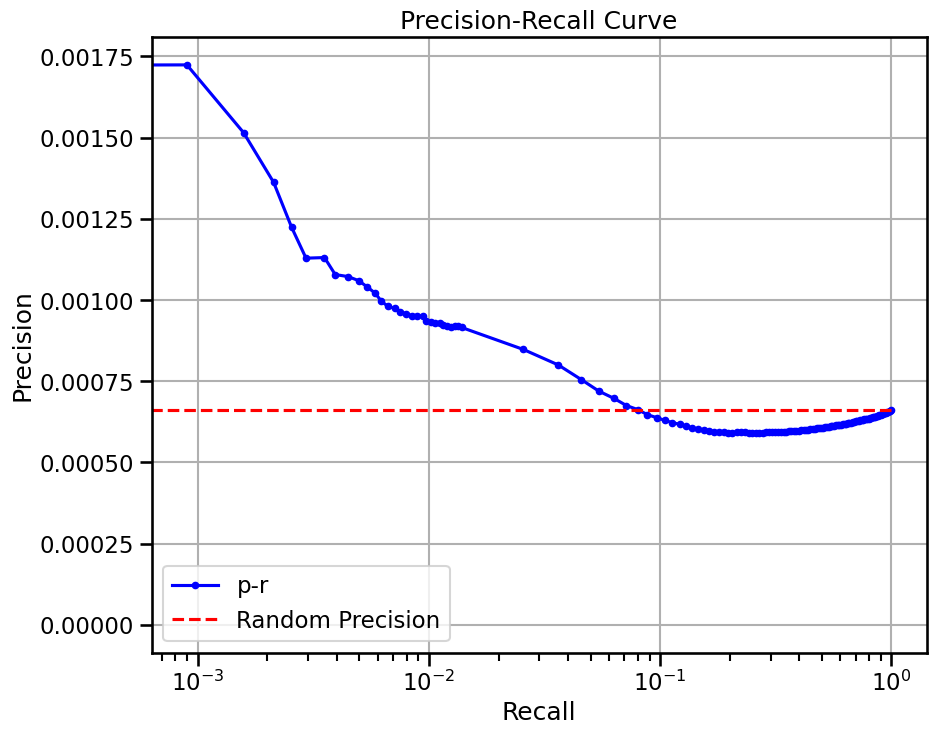

Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:165: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

base enrichment

Top central genes:

[]

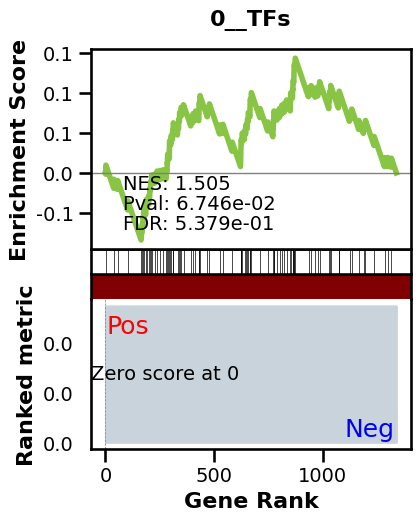

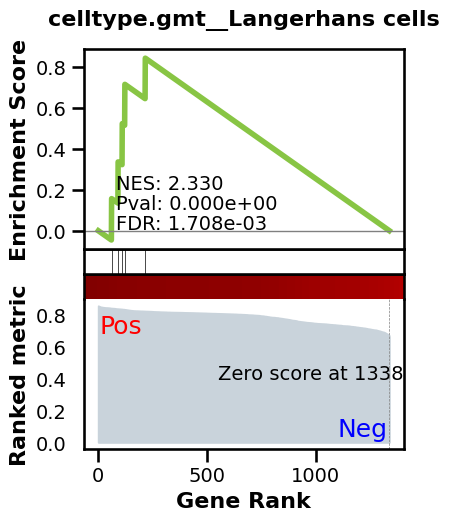

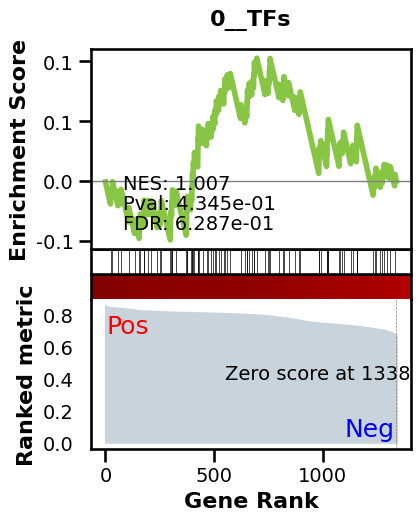

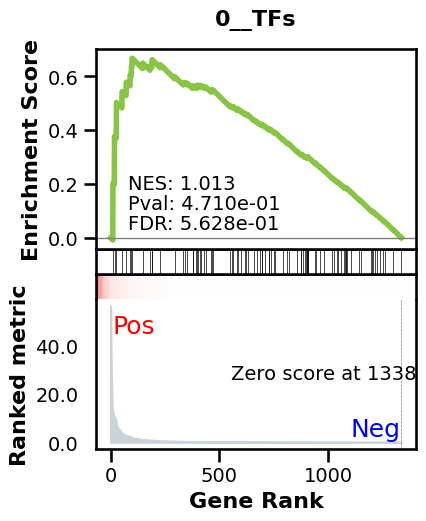

_________________________________________

TF specific enrichment

found some significant results for 

0.0

% TFs


_________________________________________

loading GT, 

omnipath

intersection of 795 genes

intersection pct:

0.5937266616878267

precision: 

0.0006598171363936281


recall: 

1.0


random precision:

0.0006606188583090516


  0%|                                                                      | 0/128 [00:00<?, ?it/s]


 73%|███████████████████████████████████████████▌                | 93/128 [00:00<00:00, 926.80it/s]

/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|███████████████████████████████████████████████████████████| 128/128 [00:00<00:00, 936.50it/s]

Area Under Precision-Recall Curve (AUPRC): 

0.0009848623898070052

EPR:

6.809487421826298

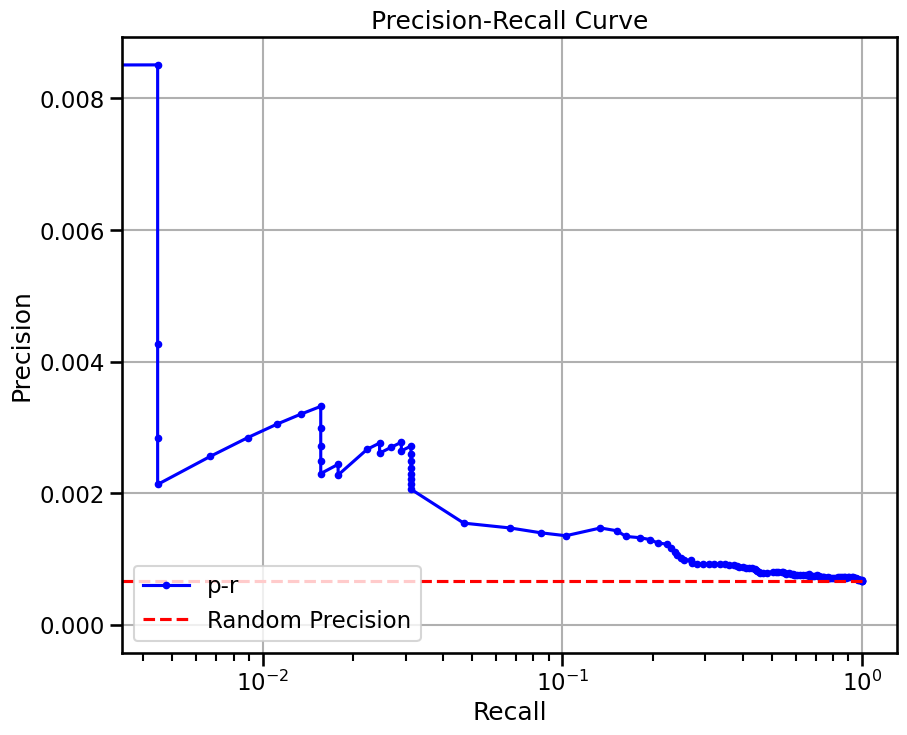

true elem

448

...

doing classification....

metrics

{'used_heads': 109, 'precision': 0.0008922198429693076, 'random_precision': 0.0004035488735978886, 'recall': 0.072992700729927, 'predicted_true': 11208.0, 'number_of_true': 137.0, 'epr': 18.33991133217993}

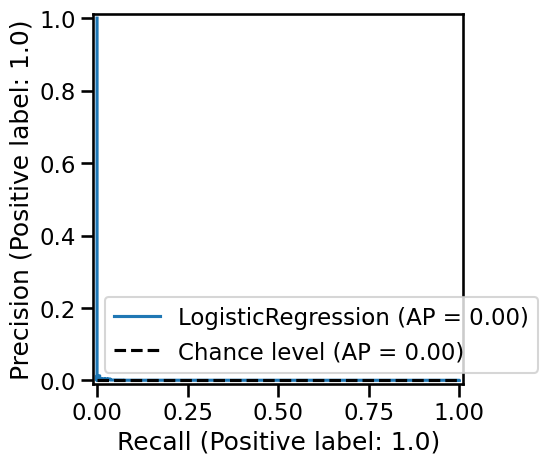

base enrichment

Top central genes:

[]

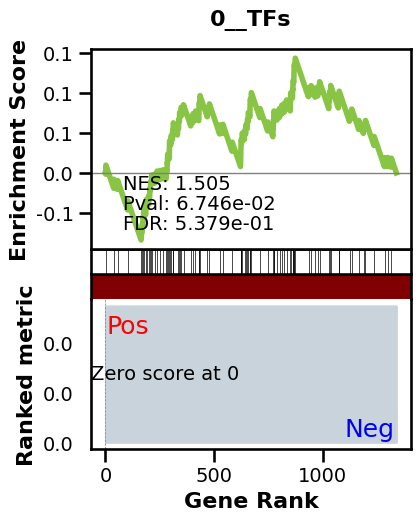

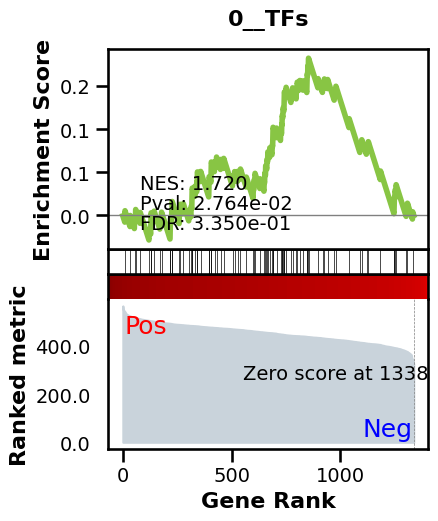

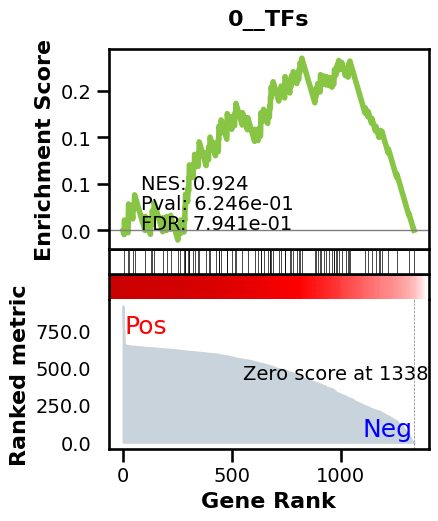

_________________________________________

TF specific enrichment

found some significant results for 

0.0

% TFs


_________________________________________

loading GT, 

omnipath

intersection of 795 genes

intersection pct:

0.5937266616878267

precision: 

0.0006598171363936281


recall: 

1.0


random precision:

0.0006606188583090516


  0%|                                                                      | 0/128 [00:00<?, ?it/s]


 69%|█████████████████████████████████████████▎                  | 88/128 [00:00<00:00, 874.73it/s]

/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|███████████████████████████████████████████████████████████| 128/128 [00:00<00:00, 880.78it/s]

Area Under Precision-Recall Curve (AUPRC): 

0.001366981554534013

EPR:

6.809487421826298

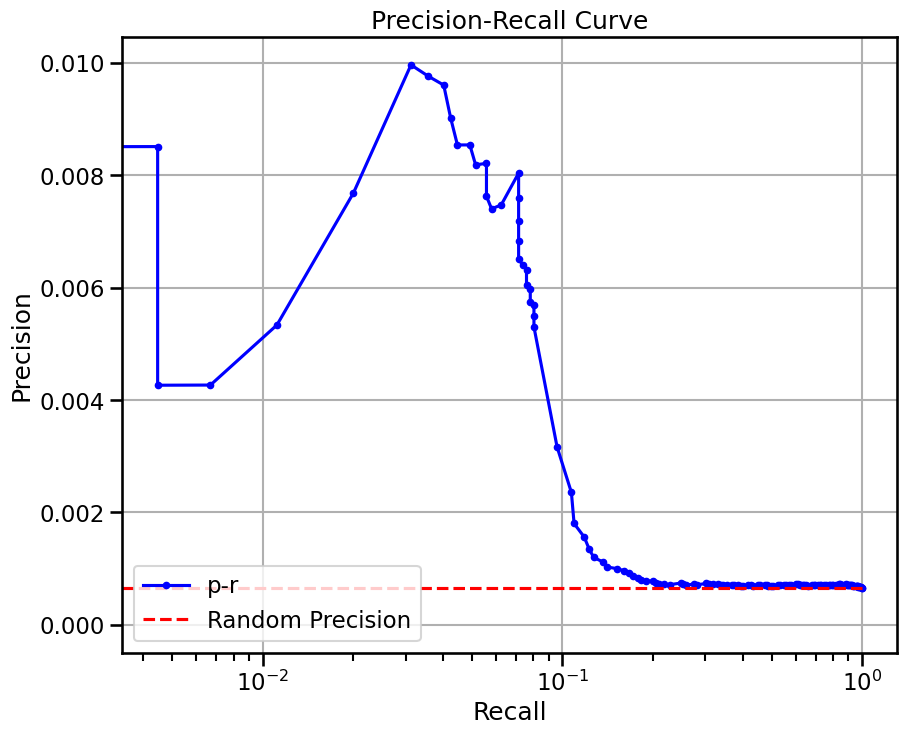

Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:165: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

avg link count: 535737316, sparsity: 1.0

base enrichment

too many genes for central computation

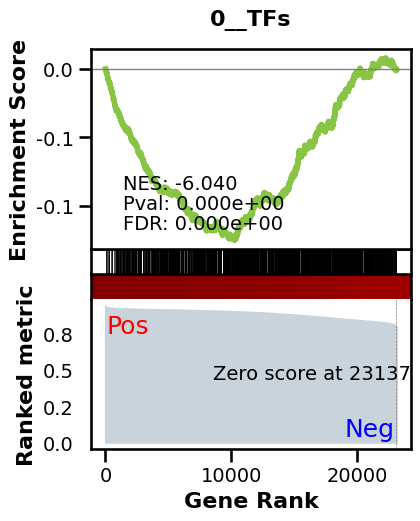

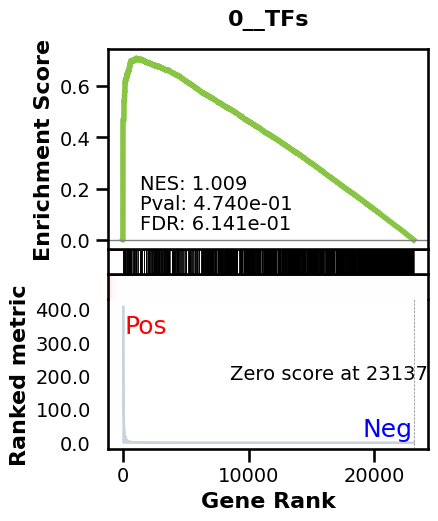

_________________________________________

TF specific enrichment

found some significant results for 

31.25

% TFs


_________________________________________

loading GT, 

omnipath

intersection of 12461 genes

intersection pct:

0.5385513008903103

precision: 

0.000662155193553671


recall: 

1.0


random precision:

0.0006622010618824016


  0%|                                                                      | 0/128 [00:00<?, ?it/s]


  1%|▍                                                             | 1/128 [00:00<00:43,  2.92it/s]


  2%|▉                                                             | 2/128 [00:00<00:43,  2.92it/s]


  2%|█▍                                                            | 3/128 [00:01<00:42,  2.92it/s]


  3%|█▉                                                            | 4/128 [00:01<00:42,  2.92it/s]


  4%|██▍                                                           | 5/128 [00:01<00:42,  2.91it/s]


  5%|██▉                                                           | 6/128 [00:02<00:41,  2.91it/s]


  5%|███▍                                                          | 7/128 [00:02<00:42,  2.85it/s]


  6%|███▉                                                          | 8/128 [00:02<00:42,  2.83it/s]


  7%|████▎                                                         | 9/128 [00:03<00:41,  2.85it/s]


  8%|████▊                                                        | 10/128 [00:03<00:41,  2.85it/s]


  9%|█████▏                                                       | 11/128 [00:03<00:40,  2.87it/s]


  9%|█████▋                                                       | 12/128 [00:04<00:40,  2.89it/s]


 10%|██████▏                                                      | 13/128 [00:04<00:39,  2.90it/s]


 11%|██████▋                                                      | 14/128 [00:04<00:39,  2.90it/s]


 12%|███████▏                                                     | 15/128 [00:05<00:38,  2.90it/s]


 12%|███████▋                                                     | 16/128 [00:05<00:38,  2.90it/s]


 13%|████████                                                     | 17/128 [00:05<00:38,  2.90it/s]


 14%|████████▌                                                    | 18/128 [00:06<00:37,  2.90it/s]


 15%|█████████                                                    | 19/128 [00:06<00:37,  2.91it/s]


 16%|█████████▌                                                   | 20/128 [00:06<00:37,  2.91it/s]


 16%|██████████                                                   | 21/128 [00:07<00:36,  2.89it/s]


 17%|██████████▍                                                  | 22/128 [00:07<00:36,  2.90it/s]


 18%|██████████▉                                                  | 23/128 [00:07<00:36,  2.90it/s]


 19%|███████████▍                                                 | 24/128 [00:08<00:35,  2.90it/s]


 20%|███████████▉                                                 | 25/128 [00:08<00:35,  2.90it/s]


 20%|████████████▍                                                | 26/128 [00:08<00:35,  2.90it/s]


 21%|████████████▊                                                | 27/128 [00:09<00:34,  2.90it/s]


 22%|█████████████▎                                               | 28/128 [00:09<00:34,  2.90it/s]


 23%|█████████████▊                                               | 29/128 [00:10<00:34,  2.91it/s]


 23%|██████████████▎                                              | 30/128 [00:10<00:33,  2.91it/s]


 24%|██████████████▊                                              | 31/128 [00:10<00:33,  2.91it/s]


 25%|███████████████▎                                             | 32/128 [00:11<00:33,  2.91it/s]


 26%|███████████████▋                                             | 33/128 [00:11<00:32,  2.91it/s]


 27%|████████████████▏                                            | 34/128 [00:11<00:32,  2.91it/s]


 27%|████████████████▋                                            | 35/128 [00:12<00:31,  2.91it/s]


 28%|█████████████████▏                                           | 36/128 [00:12<00:31,  2.89it/s]


 29%|█████████████████▋                                           | 37/128 [00:12<00:31,  2.90it/s]


 30%|██████████████████                                           | 38/128 [00:13<00:30,  2.90it/s]


 30%|██████████████████▌                                          | 39/128 [00:13<00:30,  2.90it/s]


 31%|███████████████████                                          | 40/128 [00:13<00:30,  2.91it/s]


 32%|███████████████████▌                                         | 41/128 [00:14<00:29,  2.90it/s]


 33%|████████████████████                                         | 42/128 [00:14<00:29,  2.91it/s]


 34%|████████████████████▍                                        | 43/128 [00:14<00:29,  2.91it/s]


 34%|████████████████████▉                                        | 44/128 [00:15<00:28,  2.91it/s]


 35%|█████████████████████▍                                       | 45/128 [00:15<00:28,  2.91it/s]


 36%|█████████████████████▉                                       | 46/128 [00:15<00:28,  2.85it/s]


 37%|██████████████████████▍                                      | 47/128 [00:16<00:28,  2.85it/s]


 38%|██████████████████████▉                                      | 48/128 [00:16<00:27,  2.87it/s]


 38%|███████████████████████▎                                     | 49/128 [00:16<00:27,  2.89it/s]


 39%|███████████████████████▊                                     | 50/128 [00:17<00:27,  2.88it/s]


 40%|████████████████████████▎                                    | 51/128 [00:17<00:26,  2.89it/s]


 41%|████████████████████████▊                                    | 52/128 [00:17<00:26,  2.89it/s]


 41%|█████████████████████████▎                                   | 53/128 [00:18<00:25,  2.90it/s]


 42%|█████████████████████████▋                                   | 54/128 [00:18<00:25,  2.90it/s]


 43%|██████████████████████████▏                                  | 55/128 [00:18<00:25,  2.90it/s]


 44%|██████████████████████████▋                                  | 56/128 [00:19<00:24,  2.90it/s]


 45%|███████████████████████████▏                                 | 57/128 [00:19<00:24,  2.91it/s]


 45%|███████████████████████████▋                                 | 58/128 [00:20<00:24,  2.90it/s]


 46%|████████████████████████████                                 | 59/128 [00:20<00:23,  2.90it/s]


 47%|████████████████████████████▌                                | 60/128 [00:20<00:23,  2.90it/s]


 48%|█████████████████████████████                                | 61/128 [00:21<00:23,  2.90it/s]


 48%|█████████████████████████████▌                               | 62/128 [00:21<00:22,  2.91it/s]


 49%|██████████████████████████████                               | 63/128 [00:21<00:22,  2.91it/s]


 50%|██████████████████████████████▌                              | 64/128 [00:22<00:22,  2.90it/s]


 51%|██████████████████████████████▉                              | 65/128 [00:22<00:21,  2.89it/s]


 52%|███████████████████████████████▍                             | 66/128 [00:22<00:21,  2.89it/s]


 52%|███████████████████████████████▉                             | 67/128 [00:23<00:21,  2.90it/s]


 53%|████████████████████████████████▍                            | 68/128 [00:23<00:20,  2.89it/s]


 54%|████████████████████████████████▉                            | 69/128 [00:23<00:20,  2.89it/s]


 55%|█████████████████████████████████▎                           | 70/128 [00:24<00:20,  2.90it/s]


 55%|█████████████████████████████████▊                           | 71/128 [00:24<00:19,  2.90it/s]


 56%|██████████████████████████████████▎                          | 72/128 [00:24<00:19,  2.91it/s]


 57%|██████████████████████████████████▊                          | 73/128 [00:25<00:18,  2.90it/s]


 58%|███████████████████████████████████▎                         | 74/128 [00:25<00:18,  2.91it/s]


 59%|███████████████████████████████████▋                         | 75/128 [00:25<00:18,  2.91it/s]


 59%|████████████████████████████████████▏                        | 76/128 [00:26<00:17,  2.91it/s]


 60%|████████████████████████████████████▋                        | 77/128 [00:26<00:17,  2.90it/s]


 61%|█████████████████████████████████████▏                       | 78/128 [00:26<00:17,  2.90it/s]


 62%|█████████████████████████████████████▋                       | 79/128 [00:27<00:16,  2.88it/s]


 62%|██████████████████████████████████████▏                      | 80/128 [00:27<00:16,  2.89it/s]


 63%|██████████████████████████████████████▌                      | 81/128 [00:27<00:16,  2.89it/s]


 64%|███████████████████████████████████████                      | 82/128 [00:28<00:15,  2.89it/s]


 65%|███████████████████████████████████████▌                     | 83/128 [00:28<00:15,  2.89it/s]


 66%|████████████████████████████████████████                     | 84/128 [00:29<00:15,  2.87it/s]


 66%|████████████████████████████████████████▌                    | 85/128 [00:29<00:15,  2.84it/s]


 67%|████████████████████████████████████████▉                    | 86/128 [00:29<00:14,  2.85it/s]


 68%|█████████████████████████████████████████▍                   | 87/128 [00:30<00:14,  2.87it/s]


 69%|█████████████████████████████████████████▉                   | 88/128 [00:30<00:13,  2.88it/s]


 70%|██████████████████████████████████████████▍                  | 89/128 [00:30<00:13,  2.89it/s]


 70%|██████████████████████████████████████████▉                  | 90/128 [00:31<00:13,  2.90it/s]


 71%|███████████████████████████████████████████▎                 | 91/128 [00:31<00:12,  2.90it/s]


 72%|███████████████████████████████████████████▊                 | 92/128 [00:31<00:12,  2.90it/s]


 73%|████████████████████████████████████████████▎                | 93/128 [00:32<00:12,  2.90it/s]


 73%|████████████████████████████████████████████▊                | 94/128 [00:32<00:11,  2.89it/s]


 74%|█████████████████████████████████████████████▎               | 95/128 [00:32<00:11,  2.89it/s]


 75%|█████████████████████████████████████████████▊               | 96/128 [00:33<00:11,  2.90it/s]


 76%|██████████████████████████████████████████████▏              | 97/128 [00:33<00:10,  2.89it/s]


 77%|██████████████████████████████████████████████▋              | 98/128 [00:33<00:10,  2.90it/s]


 77%|███████████████████████████████████████████████▏             | 99/128 [00:34<00:09,  2.90it/s]


 78%|██████████████████████████████████████████████▉             | 100/128 [00:34<00:09,  2.90it/s]


 79%|███████████████████████████████████████████████▎            | 101/128 [00:34<00:09,  2.90it/s]


 80%|███████████████████████████████████████████████▊            | 102/128 [00:35<00:08,  2.90it/s]


 80%|████████████████████████████████████████████████▎           | 103/128 [00:35<00:08,  2.91it/s]


 81%|████████████████████████████████████████████████▊           | 104/128 [00:35<00:08,  2.90it/s]


 82%|█████████████████████████████████████████████████▏          | 105/128 [00:36<00:07,  2.90it/s]


 83%|█████████████████████████████████████████████████▋          | 106/128 [00:36<00:07,  2.89it/s]


 84%|██████████████████████████████████████████████████▏         | 107/128 [00:36<00:07,  2.89it/s]


 84%|██████████████████████████████████████████████████▋         | 108/128 [00:37<00:06,  2.88it/s]


 85%|███████████████████████████████████████████████████         | 109/128 [00:37<00:06,  2.88it/s]


 86%|███████████████████████████████████████████████████▌        | 110/128 [00:38<00:06,  2.89it/s]


 87%|████████████████████████████████████████████████████        | 111/128 [00:38<00:05,  2.88it/s]


 88%|████████████████████████████████████████████████████▌       | 112/128 [00:38<00:05,  2.89it/s]


 88%|████████████████████████████████████████████████████▉       | 113/128 [00:39<00:05,  2.89it/s]


 89%|█████████████████████████████████████████████████████▍      | 114/128 [00:39<00:04,  2.90it/s]


 90%|█████████████████████████████████████████████████████▉      | 115/128 [00:39<00:04,  2.90it/s]


 91%|██████████████████████████████████████████████████████▍     | 116/128 [00:40<00:04,  2.91it/s]


 91%|██████████████████████████████████████████████████████▊     | 117/128 [00:40<00:03,  2.91it/s]


 92%|███████████████████████████████████████████████████████▎    | 118/128 [00:40<00:03,  2.90it/s]


 93%|███████████████████████████████████████████████████████▊    | 119/128 [00:41<00:03,  2.91it/s]


 94%|████████████████████████████████████████████████████████▎   | 120/128 [00:41<00:02,  2.91it/s]


 95%|████████████████████████████████████████████████████████▋   | 121/128 [00:41<00:02,  2.91it/s]


 95%|█████████████████████████████████████████████████████████▏  | 122/128 [00:42<00:02,  2.91it/s]


 96%|█████████████████████████████████████████████████████████▋  | 123/128 [00:42<00:01,  2.85it/s]


 97%|██████████████████████████████████████████████████████████▏ | 124/128 [00:42<00:01,  2.85it/s]


 98%|██████████████████████████████████████████████████████████▌ | 125/128 [00:43<00:01,  2.86it/s]


 98%|███████████████████████████████████████████████████████████ | 126/128 [00:43<00:00,  2.87it/s]


 99%|███████████████████████████████████████████████████████████▌| 127/128 [00:43<00:00,  2.88it/s]

/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|████████████████████████████████████████████████████████████| 128/128 [00:44<00:00,  2.89it/s]


100%|████████████████████████████████████████████████████████████| 128/128 [00:44<00:00,  2.89it/s]

Area Under Precision-Recall Curve (AUPRC): 

0.0006478397671368799

EPR:

2.235817259389628

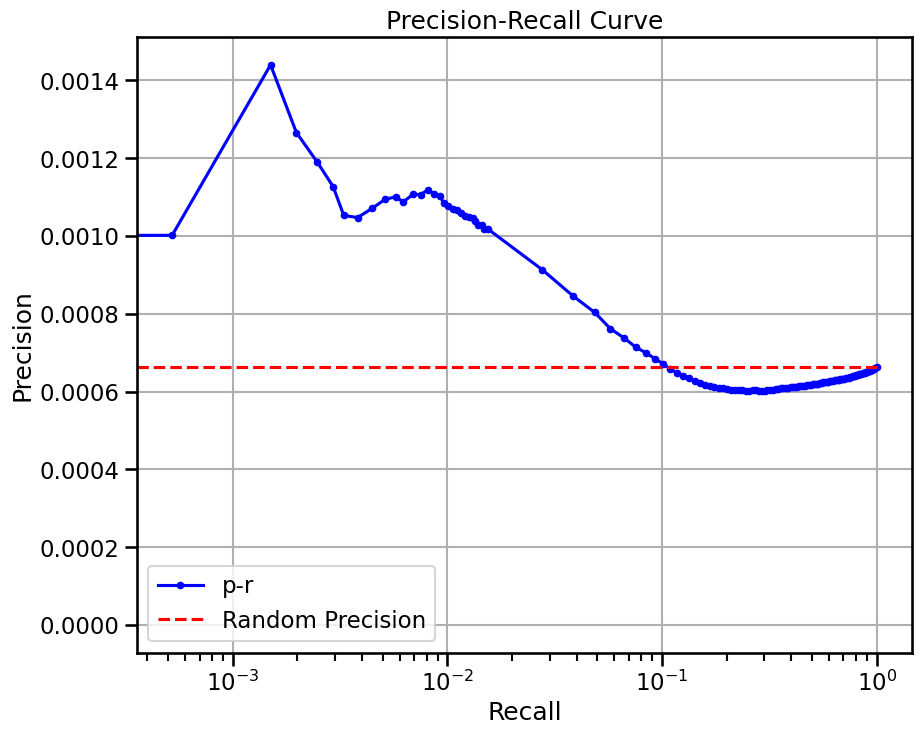

Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:165: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

base enrichment

Top central genes:

[]

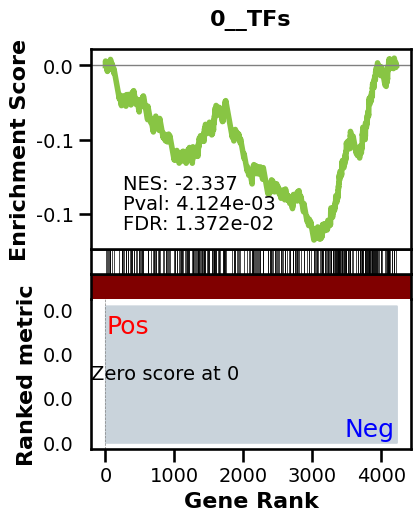

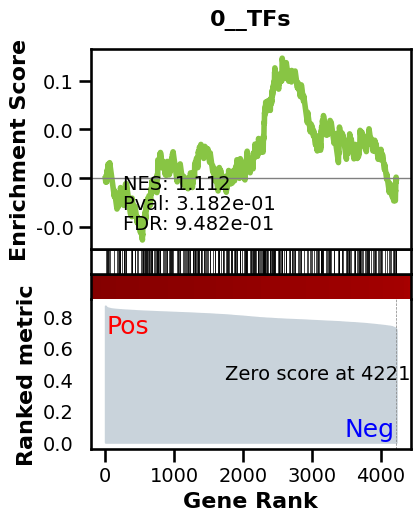

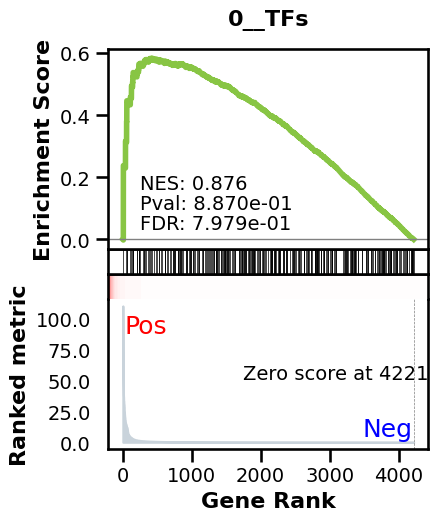

_________________________________________

TF specific enrichment

found some significant results for 

21.05263157894737

% TFs


_________________________________________

loading GT, 

omnipath

intersection of 3088 genes

intersection pct:

0.7314069161534817

precision: 

0.0014924897312679536


recall: 

1.0


random precision:

0.0014929732070474379


  0%|                                                                      | 0/128 [00:00<?, ?it/s]


  2%|█▍                                                            | 3/128 [00:00<00:04, 25.64it/s]


  5%|██▉                                                           | 6/128 [00:00<00:04, 26.23it/s]


  9%|█████▋                                                       | 12/128 [00:00<00:02, 39.85it/s]


 15%|█████████                                                    | 19/128 [00:00<00:02, 50.80it/s]


 20%|███████████▉                                                 | 25/128 [00:00<00:01, 53.33it/s]


 25%|███████████████▎                                             | 32/128 [00:00<00:01, 58.15it/s]


 30%|██████████████████▌                                          | 39/128 [00:00<00:01, 61.44it/s]


 36%|█████████████████████▉                                       | 46/128 [00:00<00:01, 63.97it/s]


 41%|█████████████████████████▎                                   | 53/128 [00:00<00:01, 65.78it/s]


 47%|████████████████████████████▌                                | 60/128 [00:01<00:01, 66.82it/s]


 52%|███████████████████████████████▉                             | 67/128 [00:01<00:00, 67.09it/s]


 58%|███████████████████████████████████▎                         | 74/128 [00:01<00:00, 67.14it/s]


 63%|██████████████████████████████████████▌                      | 81/128 [00:01<00:00, 67.07it/s]


 69%|█████████████████████████████████████████▉                   | 88/128 [00:01<00:00, 67.77it/s]


 74%|█████████████████████████████████████████████▎               | 95/128 [00:01<00:00, 54.15it/s]


 80%|████████████████████████████████████████████████▎           | 103/128 [00:01<00:00, 58.62it/s]


 86%|███████████████████████████████████████████████████▌        | 110/128 [00:01<00:00, 61.45it/s]


 91%|██████████████████████████████████████████████████████▊     | 117/128 [00:01<00:00, 63.73it/s]


 97%|██████████████████████████████████████████████████████████▏ | 124/128 [00:02<00:00, 65.10it/s]

/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|████████████████████████████████████████████████████████████| 128/128 [00:02<00:00, 57.28it/s]

Area Under Precision-Recall Curve (AUPRC): 

0.0016488304555015748

EPR:

2.8870002899800817

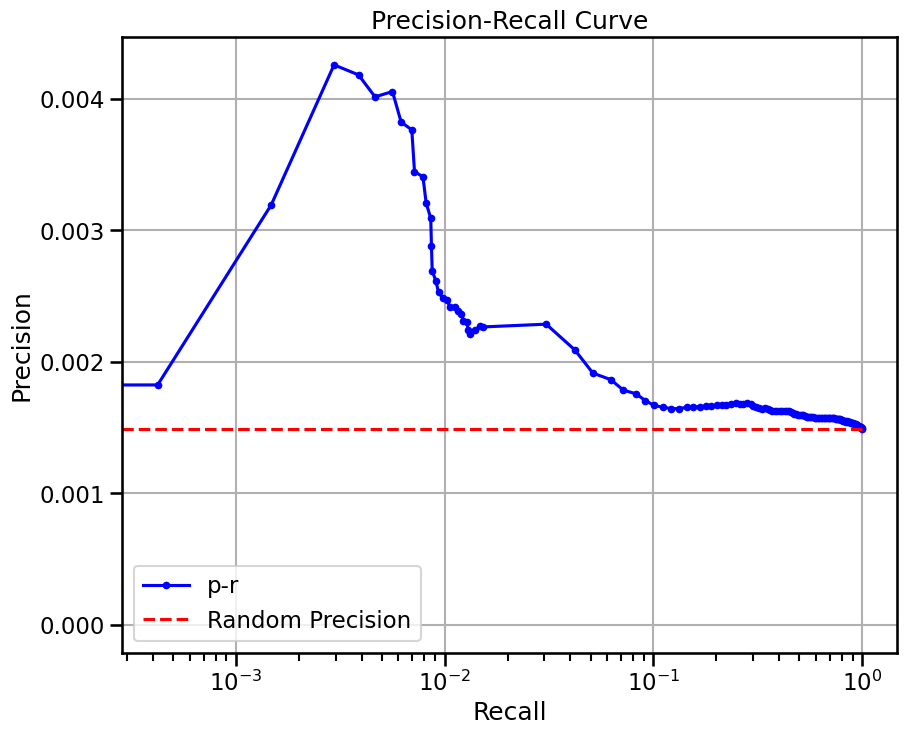

base enrichment

Top central genes:

[]

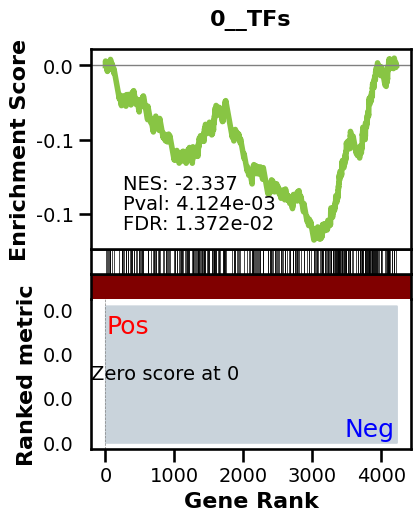

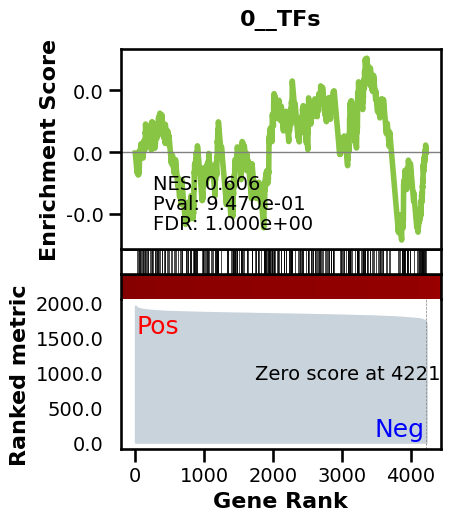

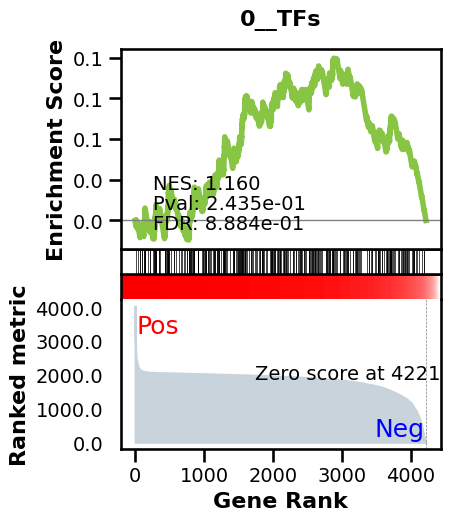

_________________________________________

TF specific enrichment

found some significant results for 

8.771929824561404

% TFs


_________________________________________

loading GT, 

omnipath

intersection of 3088 genes

intersection pct:

0.7314069161534817

precision: 

0.0014924897312679536


recall: 

1.0


random precision:

0.0014929732070474379


  0%|                                                                      | 0/128 [00:00<?, ?it/s]


  2%|█▍                                                            | 3/128 [00:00<00:04, 25.97it/s]


  7%|████▎                                                         | 9/128 [00:00<00:02, 41.64it/s]


 12%|███████▏                                                     | 15/128 [00:00<00:02, 46.36it/s]


 16%|██████████                                                   | 21/128 [00:00<00:02, 50.74it/s]


 21%|████████████▊                                                | 27/128 [00:00<00:01, 53.44it/s]


 26%|███████████████▋                                             | 33/128 [00:00<00:01, 54.84it/s]


 30%|██████████████████▌                                          | 39/128 [00:00<00:01, 56.06it/s]


 35%|█████████████████████▍                                       | 45/128 [00:00<00:01, 56.29it/s]


 40%|████████████████████████▎                                    | 51/128 [00:00<00:01, 56.26it/s]


 45%|███████████████████████████▏                                 | 57/128 [00:01<00:01, 56.06it/s]


 49%|██████████████████████████████                               | 63/128 [00:01<00:01, 55.98it/s]


 54%|████████████████████████████████▉                            | 69/128 [00:01<00:01, 56.15it/s]


 59%|███████████████████████████████████▋                         | 75/128 [00:01<00:00, 56.75it/s]


 63%|██████████████████████████████████████▌                      | 81/128 [00:01<00:00, 57.59it/s]


 68%|█████████████████████████████████████████▍                   | 87/128 [00:01<00:00, 58.13it/s]


 73%|████████████████████████████████████████████▎                | 93/128 [00:01<00:00, 58.45it/s]


 77%|███████████████████████████████████████████████▏             | 99/128 [00:01<00:00, 58.55it/s]


 82%|█████████████████████████████████████████████████▏          | 105/128 [00:01<00:00, 56.50it/s]


 87%|████████████████████████████████████████████████████        | 111/128 [00:02<00:00, 56.99it/s]


 91%|██████████████████████████████████████████████████████▊     | 117/128 [00:02<00:00, 57.59it/s]


 96%|█████████████████████████████████████████████████████████▋  | 123/128 [00:02<00:00, 57.79it/s]

/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|████████████████████████████████████████████████████████████| 128/128 [00:02<00:00, 55.14it/s]

Area Under Precision-Recall Curve (AUPRC): 

0.001496626321519447

EPR:

1.4609671695666393

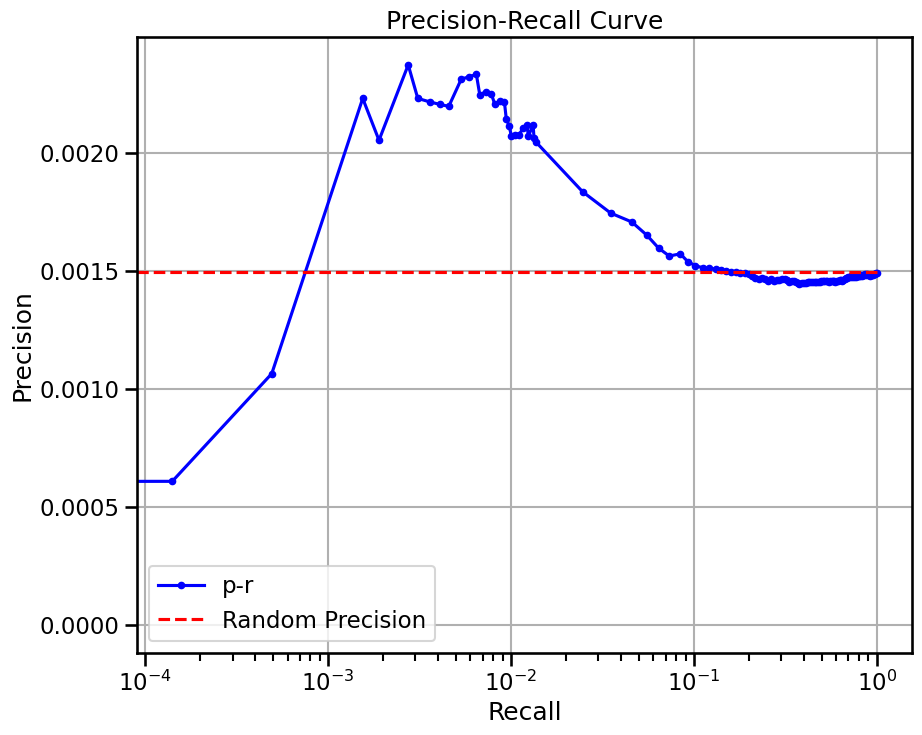

Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:165: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

avg link count: 536246649, sparsity: 1.0

base enrichment

too many genes for central computation

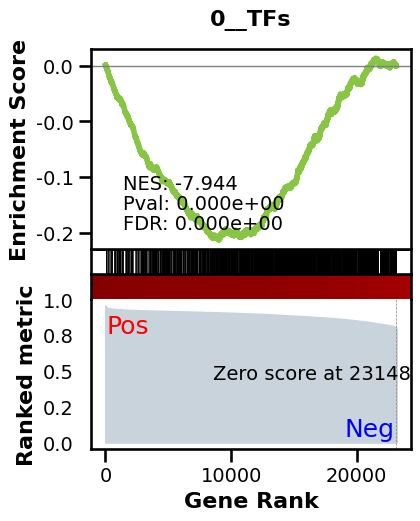

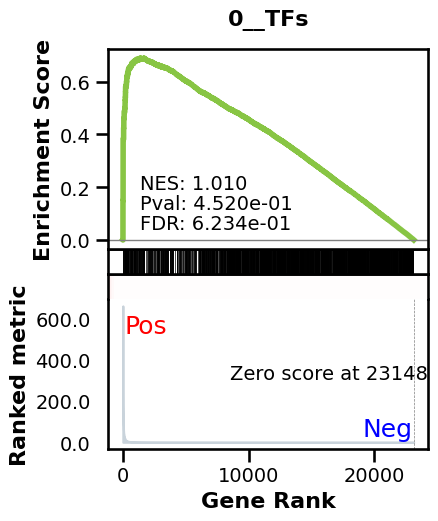

_________________________________________

TF specific enrichment

found some significant results for 

32.142857142857146

% TFs


_________________________________________

loading GT, 

omnipath

intersection of 12463 genes

intersection pct:

0.5383817875502181

precision: 

0.0006618214377693767


recall: 

1.0


random precision:

0.0006618672671051408


  0%|                                                                      | 0/128 [00:00<?, ?it/s]


  1%|▍                                                             | 1/128 [00:00<00:43,  2.92it/s]


  2%|▉                                                             | 2/128 [00:00<00:42,  2.94it/s]


  2%|█▍                                                            | 3/128 [00:01<00:42,  2.93it/s]


  3%|█▉                                                            | 4/128 [00:01<00:42,  2.94it/s]


  4%|██▍                                                           | 5/128 [00:01<00:41,  2.93it/s]


  5%|██▉                                                           | 6/128 [00:02<00:41,  2.94it/s]


  5%|███▍                                                          | 7/128 [00:02<00:41,  2.94it/s]


  6%|███▉                                                          | 8/128 [00:02<00:40,  2.94it/s]


  7%|████▎                                                         | 9/128 [00:03<00:41,  2.88it/s]


  8%|████▊                                                        | 10/128 [00:03<00:40,  2.89it/s]


  9%|█████▏                                                       | 11/128 [00:03<00:40,  2.90it/s]


  9%|█████▋                                                       | 12/128 [00:04<00:40,  2.89it/s]


 10%|██████▏                                                      | 13/128 [00:04<00:39,  2.90it/s]


 11%|██████▋                                                      | 14/128 [00:04<00:39,  2.91it/s]


 12%|███████▏                                                     | 15/128 [00:05<00:38,  2.90it/s]


 12%|███████▋                                                     | 16/128 [00:05<00:38,  2.91it/s]


 13%|████████                                                     | 17/128 [00:05<00:38,  2.92it/s]


 14%|████████▌                                                    | 18/128 [00:06<00:37,  2.91it/s]


 15%|█████████                                                    | 19/128 [00:06<00:37,  2.92it/s]


 16%|█████████▌                                                   | 20/128 [00:06<00:36,  2.92it/s]


 16%|██████████                                                   | 21/128 [00:07<00:36,  2.93it/s]


 17%|██████████▍                                                  | 22/128 [00:07<00:36,  2.93it/s]


 18%|██████████▉                                                  | 23/128 [00:07<00:36,  2.92it/s]


 19%|███████████▍                                                 | 24/128 [00:08<00:35,  2.92it/s]


 20%|███████████▉                                                 | 25/128 [00:08<00:35,  2.93it/s]


 20%|████████████▍                                                | 26/128 [00:08<00:34,  2.93it/s]


 21%|████████████▊                                                | 27/128 [00:09<00:34,  2.91it/s]


 22%|█████████████▎                                               | 28/128 [00:09<00:34,  2.91it/s]


 23%|█████████████▊                                               | 29/128 [00:09<00:33,  2.92it/s]


 23%|██████████████▎                                              | 30/128 [00:10<00:33,  2.92it/s]


 24%|██████████████▊                                              | 31/128 [00:10<00:33,  2.92it/s]


 25%|███████████████▎                                             | 32/128 [00:10<00:32,  2.92it/s]


 26%|███████████████▋                                             | 33/128 [00:11<00:32,  2.93it/s]


 27%|████████████████▏                                            | 34/128 [00:11<00:32,  2.93it/s]


 27%|████████████████▋                                            | 35/128 [00:11<00:31,  2.93it/s]


 28%|█████████████████▏                                           | 36/128 [00:12<00:31,  2.93it/s]


 29%|█████████████████▋                                           | 37/128 [00:12<00:31,  2.93it/s]


 30%|██████████████████                                           | 38/128 [00:13<00:30,  2.94it/s]


 30%|██████████████████▌                                          | 39/128 [00:13<00:30,  2.93it/s]


 31%|███████████████████                                          | 40/128 [00:13<00:30,  2.93it/s]


 32%|███████████████████▌                                         | 41/128 [00:14<00:29,  2.91it/s]


 33%|████████████████████                                         | 42/128 [00:14<00:29,  2.92it/s]


 34%|████████████████████▍                                        | 43/128 [00:14<00:29,  2.93it/s]


 34%|████████████████████▉                                        | 44/128 [00:15<00:28,  2.92it/s]


 35%|█████████████████████▍                                       | 45/128 [00:15<00:28,  2.92it/s]


 36%|█████████████████████▉                                       | 46/128 [00:15<00:28,  2.91it/s]


 37%|██████████████████████▍                                      | 47/128 [00:16<00:28,  2.87it/s]


 38%|██████████████████████▉                                      | 48/128 [00:16<00:27,  2.88it/s]


 38%|███████████████████████▎                                     | 49/128 [00:16<00:27,  2.89it/s]


 39%|███████████████████████▊                                     | 50/128 [00:17<00:26,  2.90it/s]


 40%|████████████████████████▎                                    | 51/128 [00:17<00:26,  2.91it/s]


 41%|████████████████████████▊                                    | 52/128 [00:17<00:26,  2.92it/s]


 41%|█████████████████████████▎                                   | 53/128 [00:18<00:25,  2.92it/s]


 42%|█████████████████████████▋                                   | 54/128 [00:18<00:25,  2.93it/s]


 43%|██████████████████████████▏                                  | 55/128 [00:18<00:24,  2.93it/s]


 44%|██████████████████████████▋                                  | 56/128 [00:19<00:24,  2.92it/s]


 45%|███████████████████████████▏                                 | 57/128 [00:19<00:24,  2.91it/s]


 45%|███████████████████████████▋                                 | 58/128 [00:19<00:24,  2.90it/s]


 46%|████████████████████████████                                 | 59/128 [00:20<00:23,  2.90it/s]


 47%|████████████████████████████▌                                | 60/128 [00:20<00:23,  2.91it/s]


 48%|█████████████████████████████                                | 61/128 [00:20<00:22,  2.92it/s]


 48%|█████████████████████████████▌                               | 62/128 [00:21<00:22,  2.93it/s]


 49%|██████████████████████████████                               | 63/128 [00:21<00:22,  2.93it/s]


 50%|██████████████████████████████▌                              | 64/128 [00:21<00:21,  2.92it/s]


 51%|██████████████████████████████▉                              | 65/128 [00:22<00:21,  2.93it/s]


 52%|███████████████████████████████▍                             | 66/128 [00:22<00:21,  2.93it/s]


 52%|███████████████████████████████▉                             | 67/128 [00:22<00:20,  2.94it/s]


 53%|████████████████████████████████▍                            | 68/128 [00:23<00:20,  2.93it/s]


 54%|████████████████████████████████▉                            | 69/128 [00:23<00:20,  2.93it/s]


 55%|█████████████████████████████████▎                           | 70/128 [00:23<00:19,  2.92it/s]


 55%|█████████████████████████████████▊                           | 71/128 [00:24<00:19,  2.92it/s]


 56%|██████████████████████████████████▎                          | 72/128 [00:24<00:19,  2.92it/s]


 57%|██████████████████████████████████▊                          | 73/128 [00:25<00:18,  2.92it/s]


 58%|███████████████████████████████████▎                         | 74/128 [00:25<00:18,  2.92it/s]


 59%|███████████████████████████████████▋                         | 75/128 [00:25<00:18,  2.92it/s]


 59%|████████████████████████████████████▏                        | 76/128 [00:26<00:17,  2.93it/s]


 60%|████████████████████████████████████▋                        | 77/128 [00:26<00:17,  2.93it/s]


 61%|█████████████████████████████████████▏                       | 78/128 [00:26<00:17,  2.92it/s]


 62%|█████████████████████████████████████▋                       | 79/128 [00:27<00:16,  2.93it/s]


 62%|██████████████████████████████████████▏                      | 80/128 [00:27<00:16,  2.93it/s]


 63%|██████████████████████████████████████▌                      | 81/128 [00:27<00:16,  2.92it/s]


 64%|███████████████████████████████████████                      | 82/128 [00:28<00:15,  2.92it/s]


 65%|███████████████████████████████████████▌                     | 83/128 [00:28<00:15,  2.92it/s]


 66%|████████████████████████████████████████                     | 84/128 [00:28<00:15,  2.93it/s]


 66%|████████████████████████████████████████▌                    | 85/128 [00:29<00:14,  2.87it/s]


 67%|████████████████████████████████████████▉                    | 86/128 [00:29<00:14,  2.86it/s]


 68%|█████████████████████████████████████████▍                   | 87/128 [00:29<00:14,  2.87it/s]


 69%|█████████████████████████████████████████▉                   | 88/128 [00:30<00:13,  2.88it/s]


 70%|██████████████████████████████████████████▍                  | 89/128 [00:30<00:13,  2.89it/s]


 70%|██████████████████████████████████████████▉                  | 90/128 [00:30<00:13,  2.91it/s]


 71%|███████████████████████████████████████████▎                 | 91/128 [00:31<00:12,  2.90it/s]


 72%|███████████████████████████████████████████▊                 | 92/128 [00:31<00:12,  2.90it/s]


 73%|████████████████████████████████████████████▎                | 93/128 [00:31<00:12,  2.91it/s]


 73%|████████████████████████████████████████████▊                | 94/128 [00:32<00:11,  2.92it/s]


 74%|█████████████████████████████████████████████▎               | 95/128 [00:32<00:11,  2.92it/s]


 75%|█████████████████████████████████████████████▊               | 96/128 [00:32<00:10,  2.92it/s]


 76%|██████████████████████████████████████████████▏              | 97/128 [00:33<00:10,  2.93it/s]


 77%|██████████████████████████████████████████████▋              | 98/128 [00:33<00:10,  2.93it/s]


 77%|███████████████████████████████████████████████▏             | 99/128 [00:33<00:09,  2.93it/s]


 78%|██████████████████████████████████████████████▉             | 100/128 [00:34<00:09,  2.92it/s]


 79%|███████████████████████████████████████████████▎            | 101/128 [00:34<00:09,  2.92it/s]


 80%|███████████████████████████████████████████████▊            | 102/128 [00:34<00:08,  2.93it/s]


 80%|████████████████████████████████████████████████▎           | 103/128 [00:35<00:08,  2.93it/s]


 81%|████████████████████████████████████████████████▊           | 104/128 [00:35<00:08,  2.93it/s]


 82%|█████████████████████████████████████████████████▏          | 105/128 [00:35<00:07,  2.92it/s]


 83%|█████████████████████████████████████████████████▋          | 106/128 [00:36<00:07,  2.93it/s]


 84%|██████████████████████████████████████████████████▏         | 107/128 [00:36<00:07,  2.93it/s]


 84%|██████████████████████████████████████████████████▋         | 108/128 [00:37<00:06,  2.93it/s]


 85%|███████████████████████████████████████████████████         | 109/128 [00:37<00:06,  2.93it/s]


 86%|███████████████████████████████████████████████████▌        | 110/128 [00:37<00:06,  2.93it/s]


 87%|████████████████████████████████████████████████████        | 111/128 [00:38<00:05,  2.93it/s]


 88%|████████████████████████████████████████████████████▌       | 112/128 [00:38<00:05,  2.93it/s]


 88%|████████████████████████████████████████████████████▉       | 113/128 [00:38<00:05,  2.93it/s]


 89%|█████████████████████████████████████████████████████▍      | 114/128 [00:39<00:04,  2.91it/s]


 90%|█████████████████████████████████████████████████████▉      | 115/128 [00:39<00:04,  2.92it/s]


 91%|██████████████████████████████████████████████████████▍     | 116/128 [00:39<00:04,  2.91it/s]


 91%|██████████████████████████████████████████████████████▊     | 117/128 [00:40<00:03,  2.89it/s]


 92%|███████████████████████████████████████████████████████▎    | 118/128 [00:40<00:03,  2.90it/s]


 93%|███████████████████████████████████████████████████████▊    | 119/128 [00:40<00:03,  2.91it/s]


 94%|████████████████████████████████████████████████████████▎   | 120/128 [00:41<00:02,  2.92it/s]


 95%|████████████████████████████████████████████████████████▋   | 121/128 [00:41<00:02,  2.92it/s]


 95%|█████████████████████████████████████████████████████████▏  | 122/128 [00:41<00:02,  2.93it/s]


 96%|█████████████████████████████████████████████████████████▋  | 123/128 [00:42<00:01,  2.89it/s]


 97%|██████████████████████████████████████████████████████████▏ | 124/128 [00:42<00:01,  2.88it/s]


 98%|██████████████████████████████████████████████████████████▌ | 125/128 [00:42<00:01,  2.89it/s]


 98%|███████████████████████████████████████████████████████████ | 126/128 [00:43<00:00,  2.91it/s]


 99%|███████████████████████████████████████████████████████████▌| 127/128 [00:43<00:00,  2.92it/s]

/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|████████████████████████████████████████████████████████████| 128/128 [00:43<00:00,  2.91it/s]


100%|████████████████████████████████████████████████████████████| 128/128 [00:43<00:00,  2.92it/s]

Area Under Precision-Recall Curve (AUPRC): 

0.0006464960413237863

EPR:

2.1265815354434765

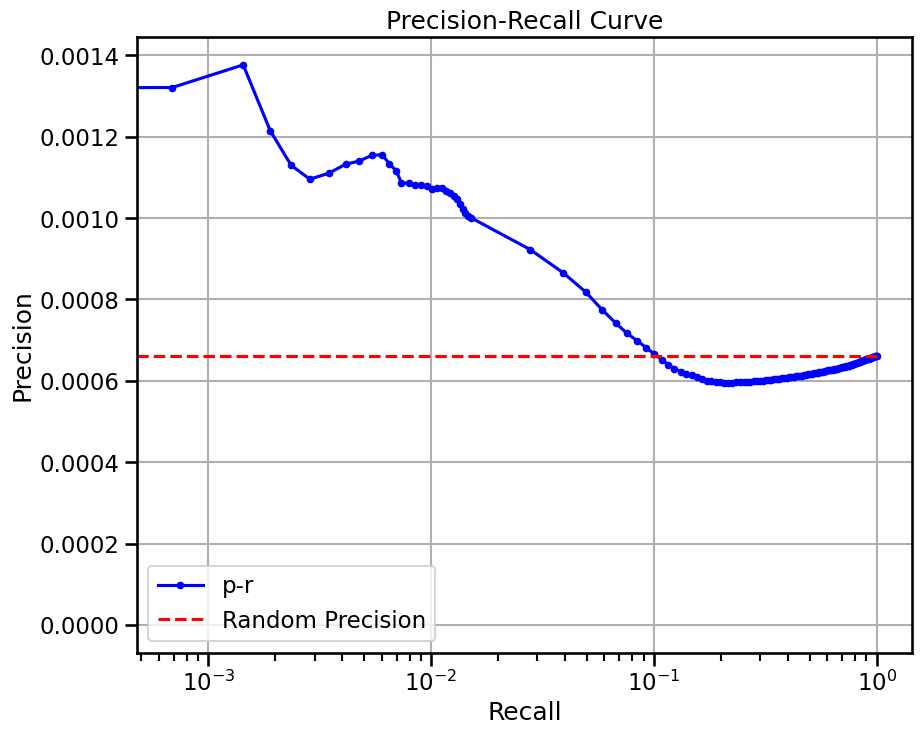

Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:165: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

base enrichment

Top central genes:

[]

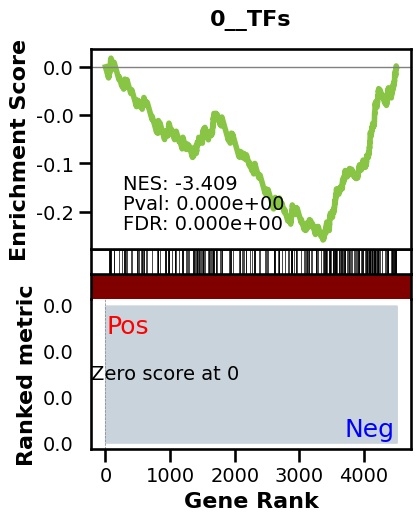

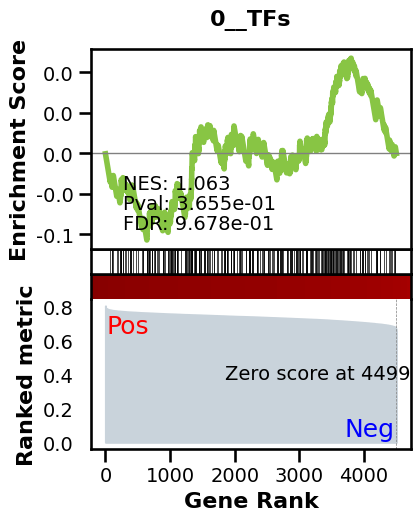

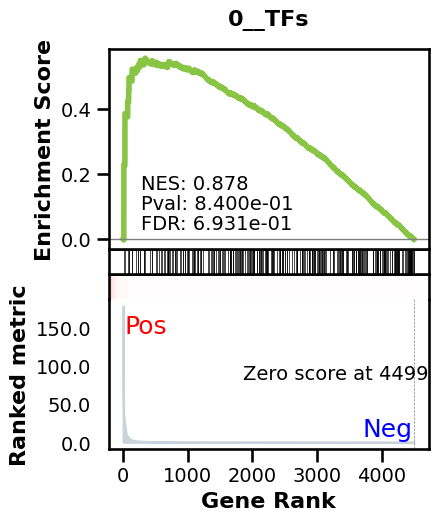

_________________________________________

TF specific enrichment

found some significant results for 

19.23076923076923

% TFs


_________________________________________

loading GT, 

omnipath

intersection of 3248 genes

intersection pct:

0.7217777777777777

precision: 

0.0008194698063529811


recall: 

1.0


random precision:

0.0008197221838726463


  0%|                                                                      | 0/128 [00:00<?, ?it/s]


  5%|██▉                                                           | 6/128 [00:00<00:02, 58.56it/s]


 10%|██████▏                                                      | 13/128 [00:00<00:01, 60.60it/s]


 16%|█████████▌                                                   | 20/128 [00:00<00:01, 62.14it/s]


 21%|████████████▊                                                | 27/128 [00:00<00:01, 62.95it/s]


 27%|████████████████▏                                            | 34/128 [00:00<00:01, 63.07it/s]


 32%|███████████████████▌                                         | 41/128 [00:00<00:01, 49.54it/s]


 38%|██████████████████████▉                                      | 48/128 [00:00<00:01, 53.39it/s]


 43%|██████████████████████████▏                                  | 55/128 [00:00<00:01, 56.35it/s]


 48%|█████████████████████████████▌                               | 62/128 [00:01<00:01, 58.52it/s]


 54%|████████████████████████████████▉                            | 69/128 [00:01<00:00, 59.91it/s]


 59%|████████████████████████████████████▏                        | 76/128 [00:01<00:00, 60.25it/s]


 65%|███████████████████████████████████████▌                     | 83/128 [00:01<00:00, 60.83it/s]


 70%|██████████████████████████████████████████▉                  | 90/128 [00:01<00:00, 61.79it/s]


 76%|██████████████████████████████████████████████▏              | 97/128 [00:01<00:00, 62.42it/s]


 81%|████████████████████████████████████████████████▊           | 104/128 [00:01<00:00, 62.16it/s]


 87%|████████████████████████████████████████████████████        | 111/128 [00:01<00:00, 62.53it/s]


 92%|███████████████████████████████████████████████████████▎    | 118/128 [00:01<00:00, 62.95it/s]


 98%|██████████████████████████████████████████████████████████▌ | 125/128 [00:02<00:00, 63.19it/s]

/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|████████████████████████████████████████████████████████████| 128/128 [00:02<00:00, 59.38it/s]

Area Under Precision-Recall Curve (AUPRC): 

0.000894438954077645

EPR:

1.4120869906042826

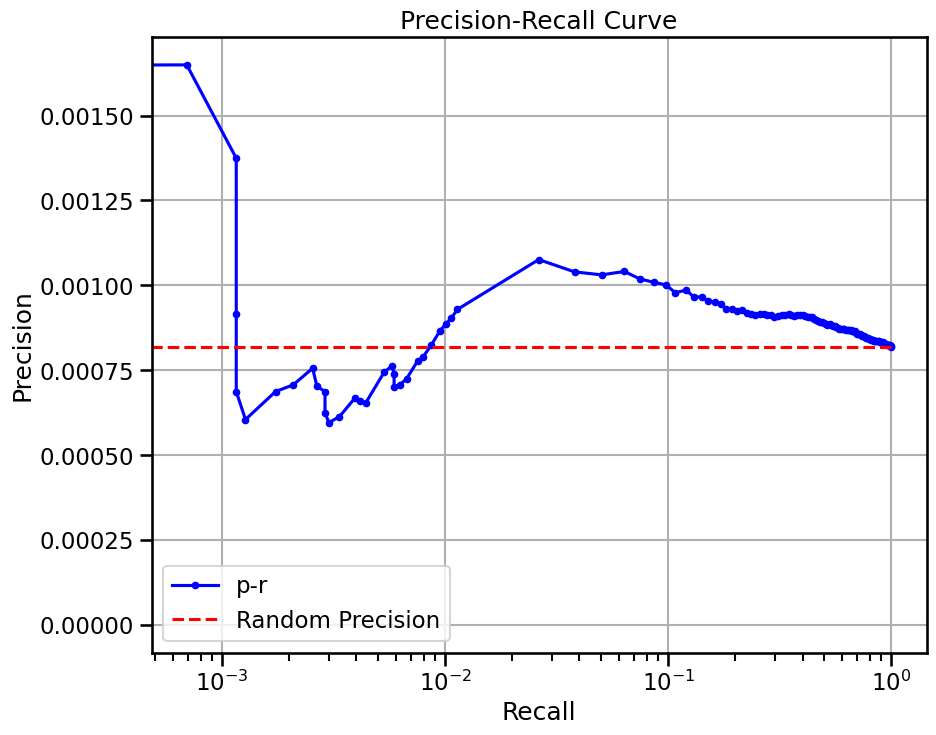

base enrichment

Top central genes:

[]

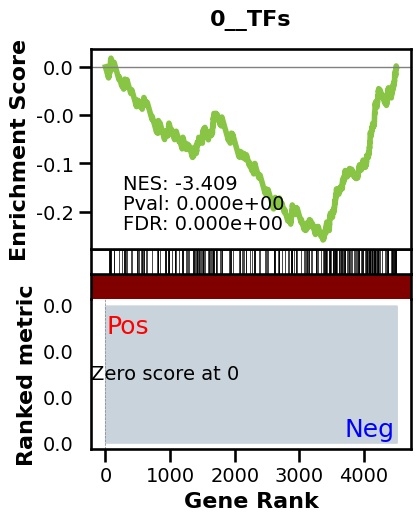

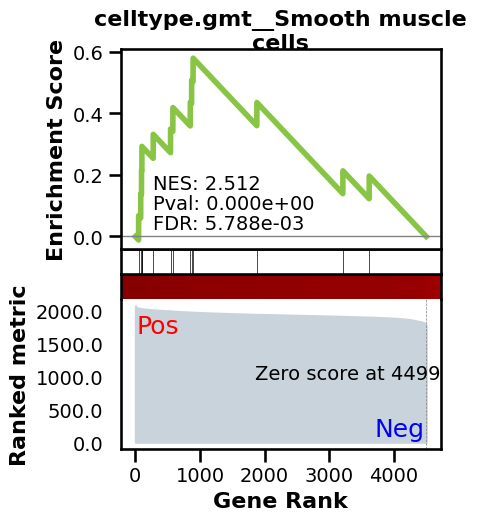

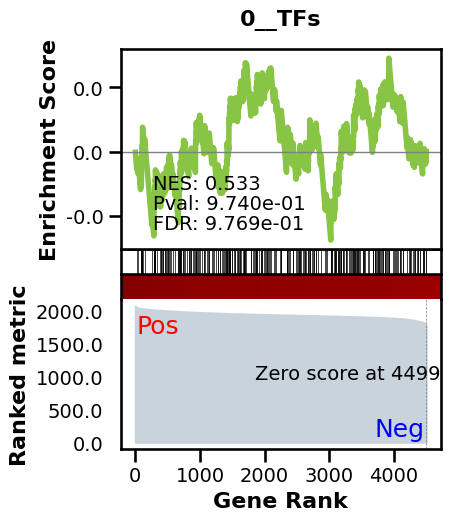

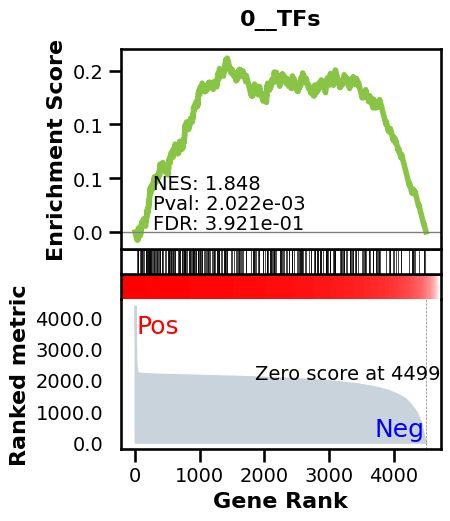

_________________________________________

TF specific enrichment

found some significant results for 

11.538461538461538

% TFs


_________________________________________

loading GT, 

omnipath

intersection of 3248 genes

intersection pct:

0.7217777777777777

precision: 

0.0008194698063529811


recall: 

1.0


random precision:

0.0008197221838726463


  0%|                                                                      | 0/128 [00:00<?, ?it/s]


  2%|█▍                                                            | 3/128 [00:00<00:05, 23.54it/s]


  5%|██▉                                                           | 6/128 [00:00<00:05, 23.67it/s]


  9%|█████▏                                                       | 11/128 [00:00<00:03, 33.74it/s]


 13%|████████                                                     | 17/128 [00:00<00:02, 41.57it/s]


 17%|██████████▍                                                  | 22/128 [00:00<00:02, 36.04it/s]


 22%|█████████████▎                                               | 28/128 [00:00<00:02, 41.37it/s]


 27%|████████████████▏                                            | 34/128 [00:00<00:02, 45.23it/s]


 30%|██████████████████▌                                          | 39/128 [00:01<00:02, 38.70it/s]


 35%|█████████████████████▍                                       | 45/128 [00:01<00:01, 42.92it/s]


 40%|████████████████████████▎                                    | 51/128 [00:01<00:01, 46.22it/s]


 45%|███████████████████████████▏                                 | 57/128 [00:01<00:01, 48.34it/s]


 49%|██████████████████████████████                               | 63/128 [00:01<00:01, 50.19it/s]


 54%|████████████████████████████████▉                            | 69/128 [00:01<00:01, 51.42it/s]


 59%|███████████████████████████████████▋                         | 75/128 [00:01<00:01, 52.32it/s]


 63%|██████████████████████████████████████▌                      | 81/128 [00:01<00:00, 52.91it/s]


 68%|█████████████████████████████████████████▍                   | 87/128 [00:01<00:00, 53.28it/s]


 73%|████████████████████████████████████████████▎                | 93/128 [00:02<00:00, 53.70it/s]


 77%|███████████████████████████████████████████████▏             | 99/128 [00:02<00:00, 53.81it/s]


 82%|█████████████████████████████████████████████████▏          | 105/128 [00:02<00:00, 53.98it/s]


 87%|████████████████████████████████████████████████████        | 111/128 [00:02<00:00, 44.70it/s]


 91%|██████████████████████████████████████████████████████▊     | 117/128 [00:02<00:00, 47.23it/s]


 96%|█████████████████████████████████████████████████████████▋  | 123/128 [00:02<00:00, 49.37it/s]

/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|████████████████████████████████████████████████████████████| 128/128 [00:02<00:00, 46.06it/s]

Area Under Precision-Recall Curve (AUPRC): 

0.0008620992503793096

EPR:

1.5536556671162685

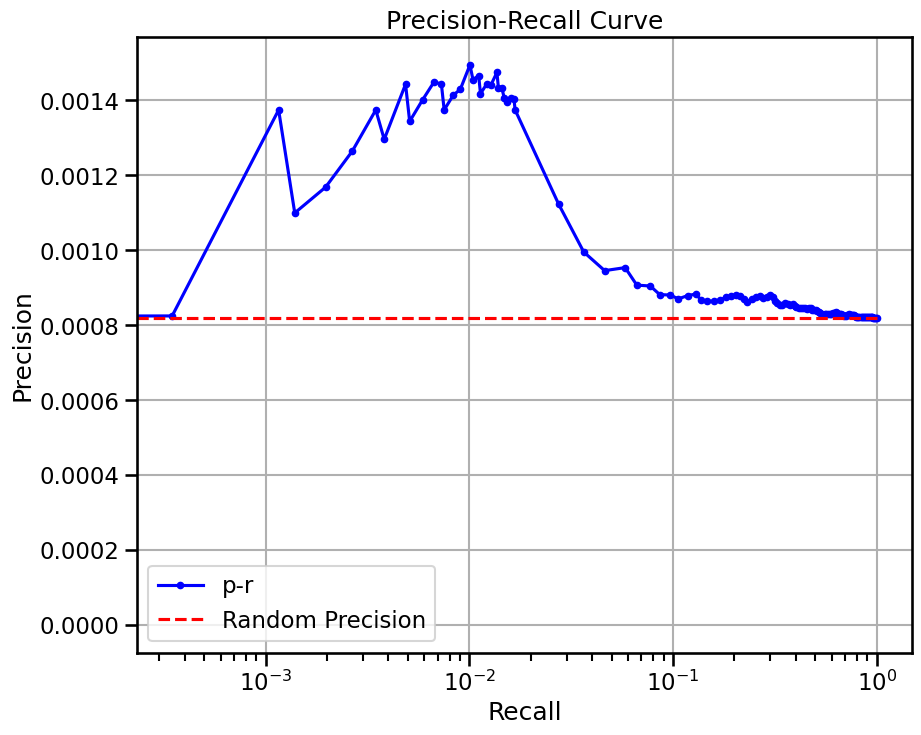

Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:165: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

avg link count: 536246649, sparsity: 1.0

base enrichment

too many genes for central computation

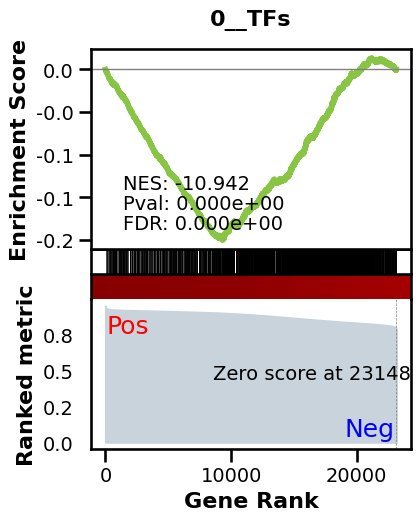

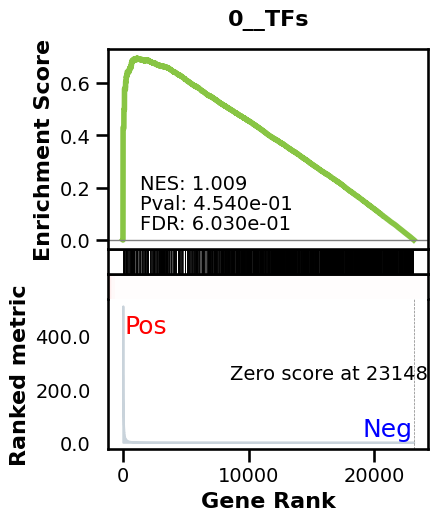

_________________________________________

TF specific enrichment

found some significant results for 

43.75

% TFs


_________________________________________

loading GT, 

omnipath

intersection of 12463 genes

intersection pct:

0.5383817875502181

precision: 

0.0006618214377693767


recall: 

1.0


random precision:

0.0006618672671051408


  0%|                                                                      | 0/128 [00:00<?, ?it/s]


  1%|▍                                                             | 1/128 [00:00<00:42,  2.96it/s]


  2%|▉                                                             | 2/128 [00:00<00:42,  2.97it/s]


  2%|█▍                                                            | 3/128 [00:01<00:42,  2.98it/s]


  3%|█▉                                                            | 4/128 [00:01<00:42,  2.92it/s]


  4%|██▍                                                           | 5/128 [00:01<00:41,  2.94it/s]


  5%|██▉                                                           | 6/128 [00:02<00:41,  2.96it/s]


  5%|███▍                                                          | 7/128 [00:02<00:40,  2.97it/s]


  6%|███▉                                                          | 8/128 [00:02<00:40,  2.97it/s]


  7%|████▎                                                         | 9/128 [00:03<00:39,  2.98it/s]


  8%|████▊                                                        | 10/128 [00:03<00:39,  2.97it/s]


  9%|█████▏                                                       | 11/128 [00:03<00:39,  2.98it/s]


  9%|█████▋                                                       | 12/128 [00:04<00:38,  2.98it/s]


 10%|██████▏                                                      | 13/128 [00:04<00:38,  2.98it/s]


 11%|██████▋                                                      | 14/128 [00:04<00:38,  2.97it/s]


 12%|███████▏                                                     | 15/128 [00:05<00:38,  2.97it/s]


 12%|███████▋                                                     | 16/128 [00:05<00:37,  2.98it/s]


 13%|████████                                                     | 17/128 [00:05<00:37,  2.98it/s]


 14%|████████▌                                                    | 18/128 [00:06<00:36,  2.98it/s]


 15%|█████████                                                    | 19/128 [00:06<00:36,  2.98it/s]


 16%|█████████▌                                                   | 20/128 [00:06<00:36,  2.98it/s]


 16%|██████████                                                   | 21/128 [00:07<00:36,  2.97it/s]


 17%|██████████▍                                                  | 22/128 [00:07<00:35,  2.96it/s]


 18%|██████████▉                                                  | 23/128 [00:07<00:35,  2.97it/s]


 19%|███████████▍                                                 | 24/128 [00:08<00:35,  2.97it/s]


 20%|███████████▉                                                 | 25/128 [00:08<00:34,  2.97it/s]


 20%|████████████▍                                                | 26/128 [00:08<00:34,  2.97it/s]


 21%|████████████▊                                                | 27/128 [00:09<00:33,  2.98it/s]


 22%|█████████████▎                                               | 28/128 [00:09<00:33,  2.98it/s]


 23%|█████████████▊                                               | 29/128 [00:09<00:33,  2.98it/s]


 23%|██████████████▎                                              | 30/128 [00:10<00:32,  2.98it/s]


 24%|██████████████▊                                              | 31/128 [00:10<00:32,  2.98it/s]


 25%|███████████████▎                                             | 32/128 [00:10<00:32,  2.98it/s]


 26%|███████████████▋                                             | 33/128 [00:11<00:32,  2.97it/s]


 27%|████████████████▏                                            | 34/128 [00:11<00:31,  2.97it/s]


 27%|████████████████▋                                            | 35/128 [00:11<00:31,  2.97it/s]


 28%|█████████████████▏                                           | 36/128 [00:12<00:30,  2.98it/s]


 29%|█████████████████▋                                           | 37/128 [00:12<00:30,  2.97it/s]


 30%|██████████████████                                           | 38/128 [00:12<00:30,  2.98it/s]


 30%|██████████████████▌                                          | 39/128 [00:13<00:29,  2.98it/s]


 31%|███████████████████                                          | 40/128 [00:13<00:29,  2.98it/s]


 32%|███████████████████▌                                         | 41/128 [00:13<00:29,  2.98it/s]


 33%|████████████████████                                         | 42/128 [00:14<00:28,  2.98it/s]


 34%|████████████████████▍                                        | 43/128 [00:14<00:28,  2.98it/s]


 34%|████████████████████▉                                        | 44/128 [00:14<00:28,  2.98it/s]


 35%|█████████████████████▍                                       | 45/128 [00:15<00:27,  2.98it/s]


 36%|█████████████████████▉                                       | 46/128 [00:15<00:27,  2.98it/s]


 37%|██████████████████████▍                                      | 47/128 [00:15<00:27,  2.98it/s]


 38%|██████████████████████▉                                      | 48/128 [00:16<00:26,  2.98it/s]


 38%|███████████████████████▎                                     | 49/128 [00:16<00:26,  2.98it/s]


 39%|███████████████████████▊                                     | 50/128 [00:16<00:26,  2.98it/s]


 40%|████████████████████████▎                                    | 51/128 [00:17<00:25,  2.98it/s]


 41%|████████████████████████▊                                    | 52/128 [00:17<00:25,  2.98it/s]


 41%|█████████████████████████▎                                   | 53/128 [00:17<00:25,  2.98it/s]


 42%|█████████████████████████▋                                   | 54/128 [00:18<00:24,  2.98it/s]


 43%|██████████████████████████▏                                  | 55/128 [00:18<00:24,  2.98it/s]


 44%|██████████████████████████▋                                  | 56/128 [00:18<00:24,  2.98it/s]


 45%|███████████████████████████▏                                 | 57/128 [00:19<00:23,  2.97it/s]


 45%|███████████████████████████▋                                 | 58/128 [00:19<00:23,  2.97it/s]


 46%|████████████████████████████                                 | 59/128 [00:19<00:23,  2.97it/s]


 47%|████████████████████████████▌                                | 60/128 [00:20<00:22,  2.97it/s]


 48%|█████████████████████████████                                | 61/128 [00:20<00:22,  2.98it/s]


 48%|█████████████████████████████▌                               | 62/128 [00:20<00:22,  2.98it/s]


 49%|██████████████████████████████                               | 63/128 [00:21<00:21,  2.98it/s]


 50%|██████████████████████████████▌                              | 64/128 [00:21<00:21,  2.98it/s]


 51%|██████████████████████████████▉                              | 65/128 [00:21<00:21,  2.98it/s]


 52%|███████████████████████████████▍                             | 66/128 [00:22<00:20,  2.97it/s]


 52%|███████████████████████████████▉                             | 67/128 [00:22<00:20,  2.97it/s]


 53%|████████████████████████████████▍                            | 68/128 [00:22<00:20,  2.97it/s]


 54%|████████████████████████████████▉                            | 69/128 [00:23<00:19,  2.97it/s]


 55%|█████████████████████████████████▎                           | 70/128 [00:23<00:19,  2.98it/s]


 55%|█████████████████████████████████▊                           | 71/128 [00:23<00:19,  2.96it/s]


 56%|██████████████████████████████████▎                          | 72/128 [00:24<00:18,  2.96it/s]


 57%|██████████████████████████████████▊                          | 73/128 [00:24<00:18,  2.97it/s]


 58%|███████████████████████████████████▎                         | 74/128 [00:24<00:18,  2.96it/s]


 59%|███████████████████████████████████▋                         | 75/128 [00:25<00:17,  2.95it/s]


 59%|████████████████████████████████████▏                        | 76/128 [00:25<00:17,  2.96it/s]


 60%|████████████████████████████████████▋                        | 77/128 [00:25<00:17,  2.97it/s]


 61%|█████████████████████████████████████▏                       | 78/128 [00:26<00:16,  2.97it/s]


 62%|█████████████████████████████████████▋                       | 79/128 [00:26<00:16,  2.97it/s]


 62%|██████████████████████████████████████▏                      | 80/128 [00:26<00:16,  2.98it/s]


 63%|██████████████████████████████████████▌                      | 81/128 [00:27<00:15,  2.98it/s]


 64%|███████████████████████████████████████                      | 82/128 [00:27<00:15,  2.98it/s]


 65%|███████████████████████████████████████▌                     | 83/128 [00:27<00:15,  2.98it/s]


 66%|████████████████████████████████████████                     | 84/128 [00:28<00:14,  2.98it/s]


 66%|████████████████████████████████████████▌                    | 85/128 [00:28<00:14,  2.98it/s]


 67%|████████████████████████████████████████▉                    | 86/128 [00:28<00:14,  2.97it/s]


 68%|█████████████████████████████████████████▍                   | 87/128 [00:29<00:13,  2.98it/s]


 69%|█████████████████████████████████████████▉                   | 88/128 [00:29<00:13,  2.98it/s]


 70%|██████████████████████████████████████████▍                  | 89/128 [00:29<00:13,  2.98it/s]


 70%|██████████████████████████████████████████▉                  | 90/128 [00:30<00:12,  2.98it/s]


 71%|███████████████████████████████████████████▎                 | 91/128 [00:30<00:12,  2.98it/s]


 72%|███████████████████████████████████████████▊                 | 92/128 [00:30<00:12,  2.98it/s]


 73%|████████████████████████████████████████████▎                | 93/128 [00:31<00:11,  2.98it/s]


 73%|████████████████████████████████████████████▊                | 94/128 [00:31<00:11,  2.98it/s]


 74%|█████████████████████████████████████████████▎               | 95/128 [00:31<00:11,  2.98it/s]


 75%|█████████████████████████████████████████████▊               | 96/128 [00:32<00:10,  2.98it/s]


 76%|██████████████████████████████████████████████▏              | 97/128 [00:32<00:10,  2.97it/s]


 77%|██████████████████████████████████████████████▋              | 98/128 [00:32<00:10,  2.97it/s]


 77%|███████████████████████████████████████████████▏             | 99/128 [00:33<00:09,  2.98it/s]


 78%|██████████████████████████████████████████████▉             | 100/128 [00:33<00:09,  2.98it/s]


 79%|███████████████████████████████████████████████▎            | 101/128 [00:33<00:09,  2.98it/s]


 80%|███████████████████████████████████████████████▊            | 102/128 [00:34<00:08,  2.98it/s]


 80%|████████████████████████████████████████████████▎           | 103/128 [00:34<00:08,  2.98it/s]


 81%|████████████████████████████████████████████████▊           | 104/128 [00:34<00:08,  2.98it/s]


 82%|█████████████████████████████████████████████████▏          | 105/128 [00:35<00:07,  2.98it/s]


 83%|█████████████████████████████████████████████████▋          | 106/128 [00:35<00:07,  2.98it/s]


 84%|██████████████████████████████████████████████████▏         | 107/128 [00:35<00:07,  2.98it/s]


 84%|██████████████████████████████████████████████████▋         | 108/128 [00:36<00:06,  2.98it/s]


 85%|███████████████████████████████████████████████████         | 109/128 [00:36<00:06,  2.98it/s]


 86%|███████████████████████████████████████████████████▌        | 110/128 [00:36<00:06,  2.98it/s]


 87%|████████████████████████████████████████████████████        | 111/128 [00:37<00:05,  2.98it/s]


 88%|████████████████████████████████████████████████████▌       | 112/128 [00:37<00:05,  2.98it/s]


 88%|████████████████████████████████████████████████████▉       | 113/128 [00:37<00:05,  2.98it/s]


 89%|█████████████████████████████████████████████████████▍      | 114/128 [00:38<00:04,  2.98it/s]


 90%|█████████████████████████████████████████████████████▉      | 115/128 [00:38<00:04,  2.98it/s]


 91%|██████████████████████████████████████████████████████▍     | 116/128 [00:38<00:04,  2.98it/s]


 91%|██████████████████████████████████████████████████████▊     | 117/128 [00:39<00:03,  2.98it/s]


 92%|███████████████████████████████████████████████████████▎    | 118/128 [00:39<00:03,  2.98it/s]


 93%|███████████████████████████████████████████████████████▊    | 119/128 [00:39<00:03,  2.98it/s]


 94%|████████████████████████████████████████████████████████▎   | 120/128 [00:40<00:02,  2.98it/s]


 95%|████████████████████████████████████████████████████████▋   | 121/128 [00:40<00:02,  2.98it/s]


 95%|█████████████████████████████████████████████████████████▏  | 122/128 [00:41<00:02,  2.98it/s]


 96%|█████████████████████████████████████████████████████████▋  | 123/128 [00:41<00:01,  2.98it/s]


 97%|██████████████████████████████████████████████████████████▏ | 124/128 [00:41<00:01,  2.98it/s]


 98%|██████████████████████████████████████████████████████████▌ | 125/128 [00:42<00:01,  2.98it/s]


 98%|███████████████████████████████████████████████████████████ | 126/128 [00:42<00:00,  2.98it/s]


 99%|███████████████████████████████████████████████████████████▌| 127/128 [00:42<00:00,  2.98it/s]

/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|████████████████████████████████████████████████████████████| 128/128 [00:43<00:00,  2.98it/s]


100%|████████████████████████████████████████████████████████████| 128/128 [00:43<00:00,  2.98it/s]

Area Under Precision-Recall Curve (AUPRC): 

0.0006509645251462378

EPR:

2.6545951066885674

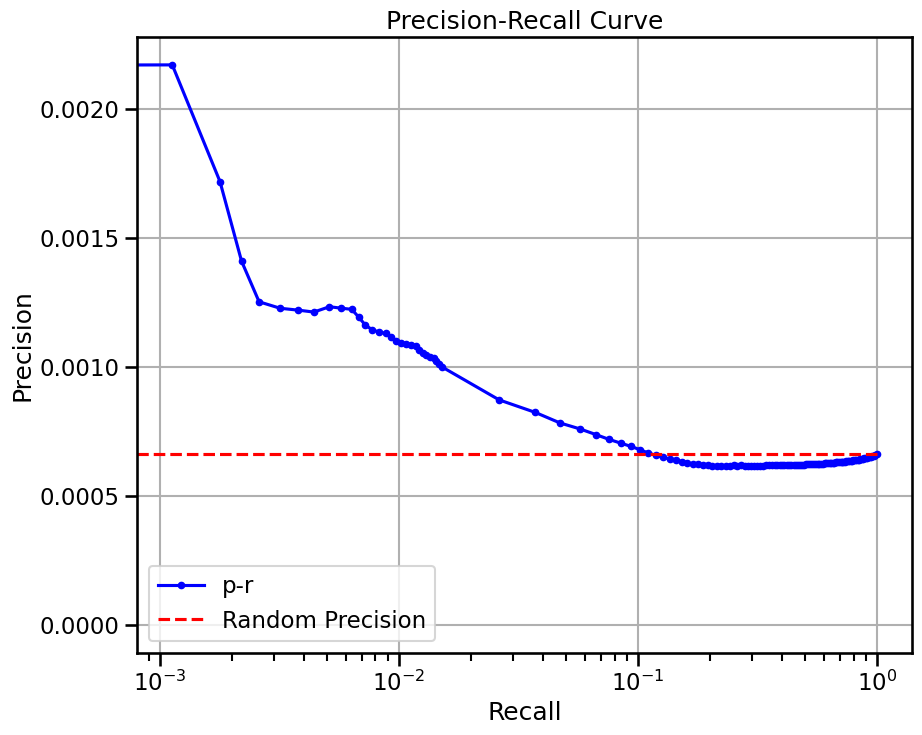

Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:165: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

base enrichment

Top central genes:

[]

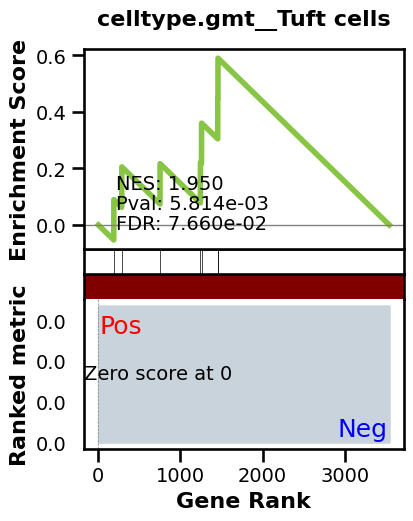

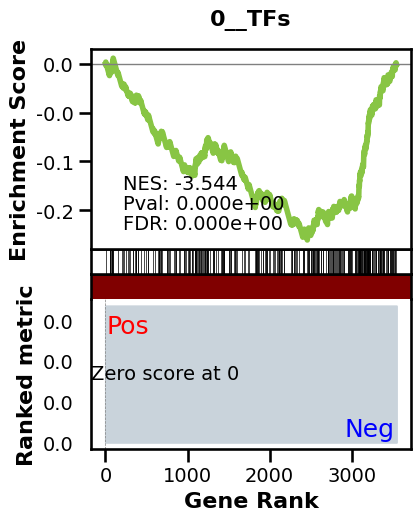

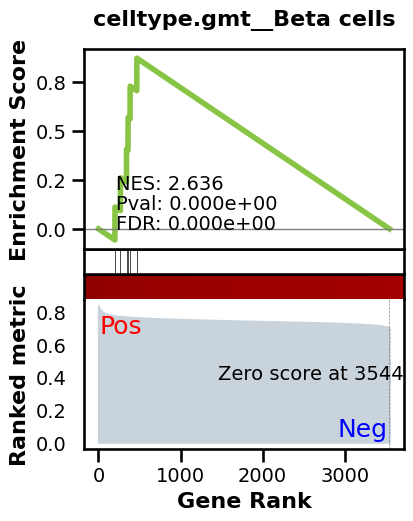

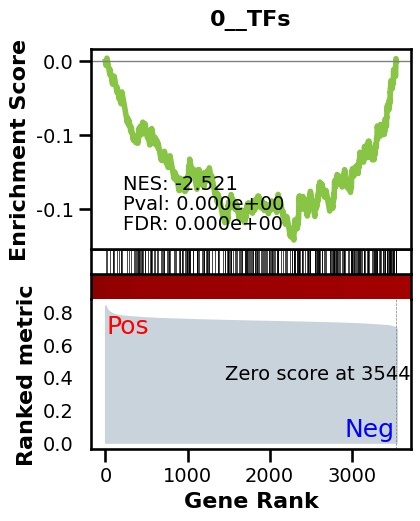

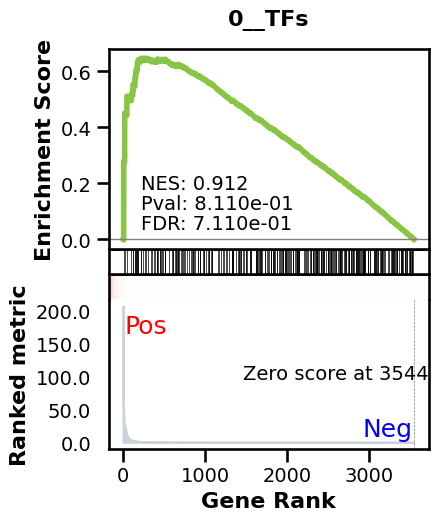

_________________________________________

TF specific enrichment

found some significant results for 

6.25

% TFs


_________________________________________

loading GT, 

omnipath

intersection of 2459 genes

intersection pct:

0.6936530324400564

precision: 

0.0007751359795563881


recall: 

1.0


random precision:

0.0007754513318670293


  0%|                                                                      | 0/128 [00:00<?, ?it/s]


  9%|█████▋                                                      | 12/128 [00:00<00:00, 116.39it/s]


 19%|███████████▎                                                | 24/128 [00:00<00:00, 116.48it/s]


 28%|████████████████▉                                           | 36/128 [00:00<00:00, 117.08it/s]


 38%|██████████████████████▌                                     | 48/128 [00:00<00:00, 116.74it/s]


 47%|████████████████████████████▏                               | 60/128 [00:00<00:00, 117.35it/s]


 56%|█████████████████████████████████▊                          | 72/128 [00:00<00:00, 117.40it/s]


 66%|███████████████████████████████████████▍                    | 84/128 [00:00<00:00, 117.40it/s]


 75%|█████████████████████████████████████████████               | 96/128 [00:00<00:00, 117.42it/s]


 84%|█████████████████████████████████████████████████▊         | 108/128 [00:00<00:00, 117.53it/s]


 94%|███████████████████████████████████████████████████████▎   | 120/128 [00:01<00:00, 117.11it/s]

/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|███████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 116.86it/s]

Area Under Precision-Recall Curve (AUPRC): 

0.0008784680481830334

EPR:

1.3764926013830312

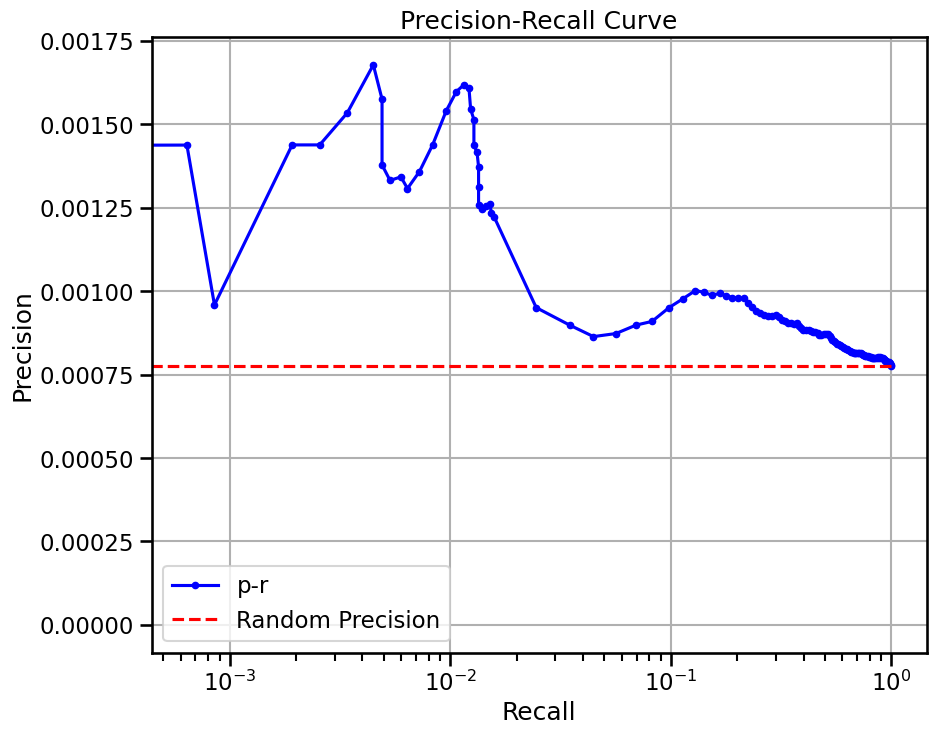

base enrichment

Top central genes:

[]

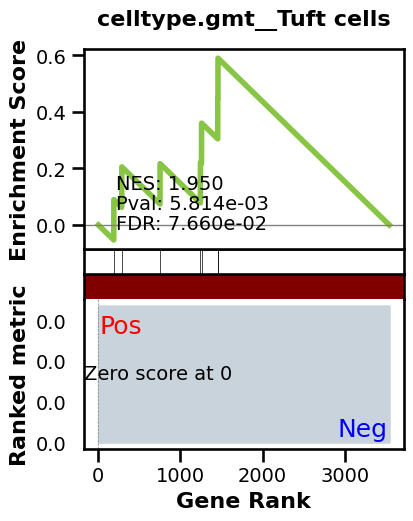

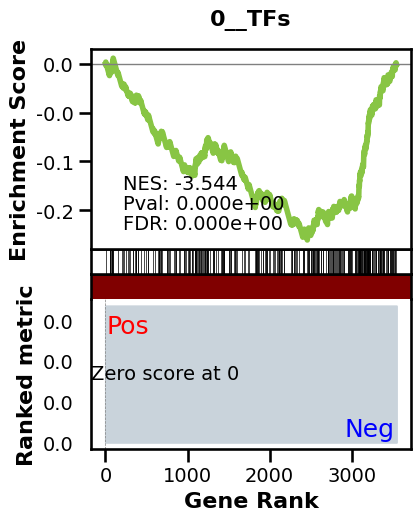

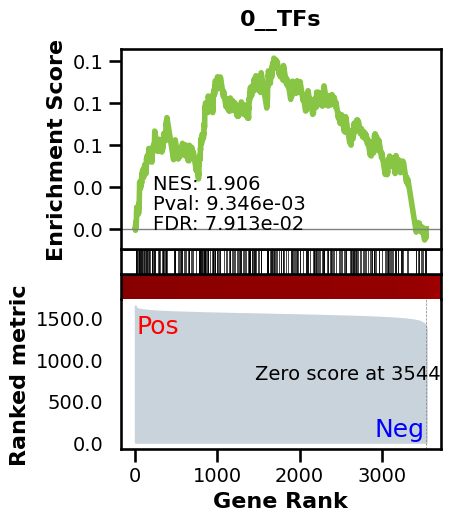

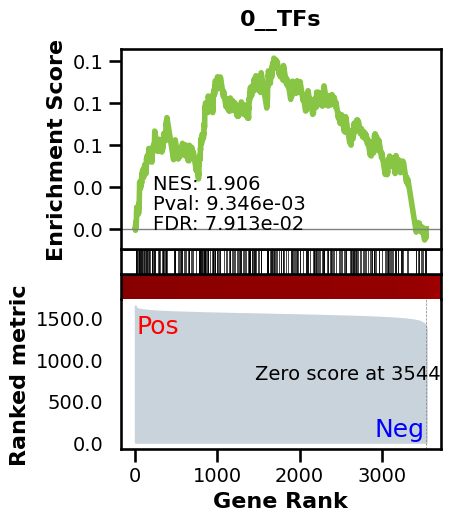

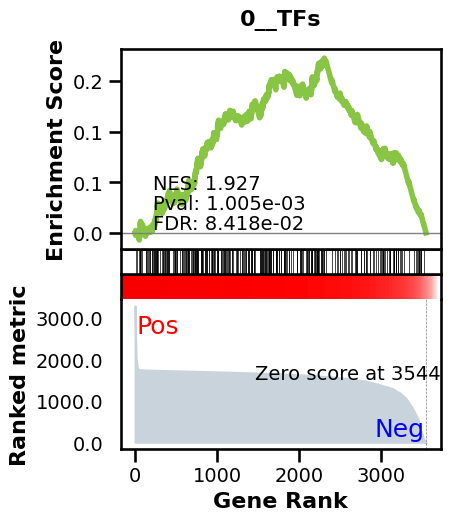

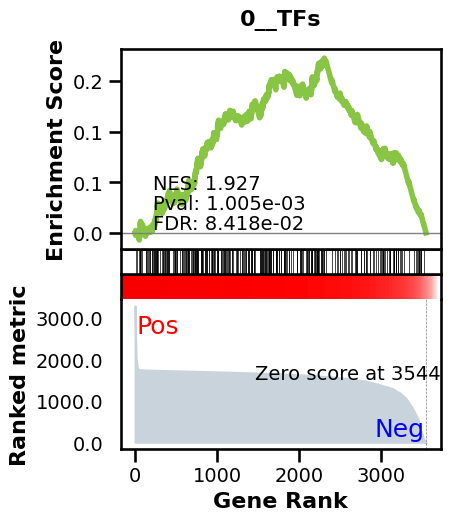

_________________________________________

TF specific enrichment

found some significant results for 

0.0

% TFs


_________________________________________

loading GT, 

omnipath

intersection of 2459 genes

intersection pct:

0.6936530324400564

precision: 

0.0007751359795563881


recall: 

1.0


random precision:

0.0007754513318670293


  0%|                                                                      | 0/128 [00:00<?, ?it/s]


  7%|████▎                                                         | 9/128 [00:00<00:01, 84.40it/s]


 15%|█████████                                                    | 19/128 [00:00<00:01, 91.26it/s]


 23%|█████████████▊                                               | 29/128 [00:00<00:01, 93.69it/s]


 30%|██████████████████▌                                          | 39/128 [00:00<00:00, 94.71it/s]


 38%|███████████████████████▎                                     | 49/128 [00:00<00:00, 95.09it/s]


 46%|████████████████████████████                                 | 59/128 [00:00<00:00, 95.72it/s]


 54%|████████████████████████████████▉                            | 69/128 [00:00<00:00, 95.76it/s]


 62%|█████████████████████████████████████▋                       | 79/128 [00:00<00:00, 96.32it/s]


 70%|██████████████████████████████████████████▍                  | 89/128 [00:00<00:00, 96.69it/s]


 77%|███████████████████████████████████████████████▏             | 99/128 [00:01<00:00, 96.17it/s]


 85%|███████████████████████████████████████████████████         | 109/128 [00:01<00:00, 96.69it/s]


 93%|███████████████████████████████████████████████████████▊    | 119/128 [00:01<00:00, 97.03it/s]

/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 95.04it/s]

Area Under Precision-Recall Curve (AUPRC): 

0.0007368477386482037

EPR:

1.1007236546344223

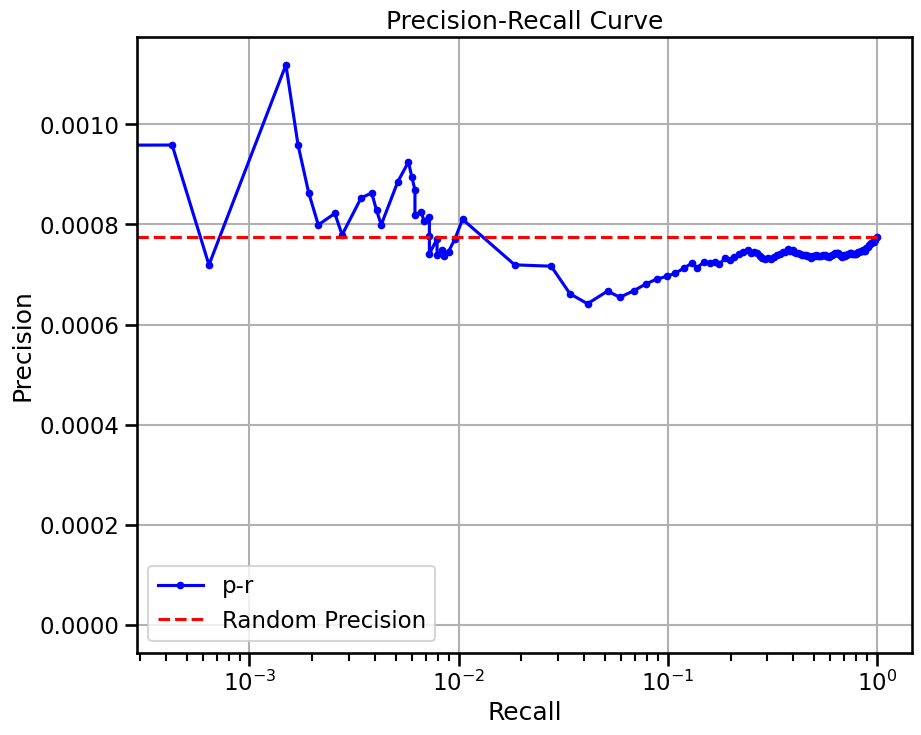

Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:165: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

avg link count: 536246649, sparsity: 1.0

base enrichment

too many genes for central computation

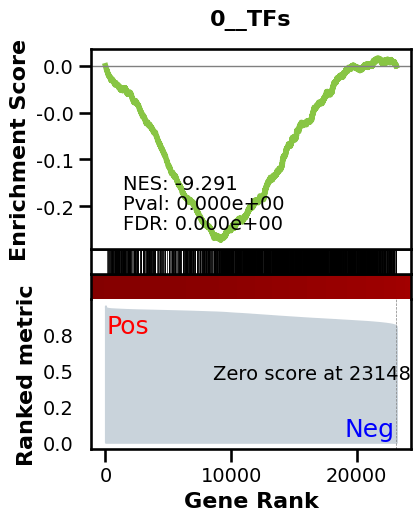

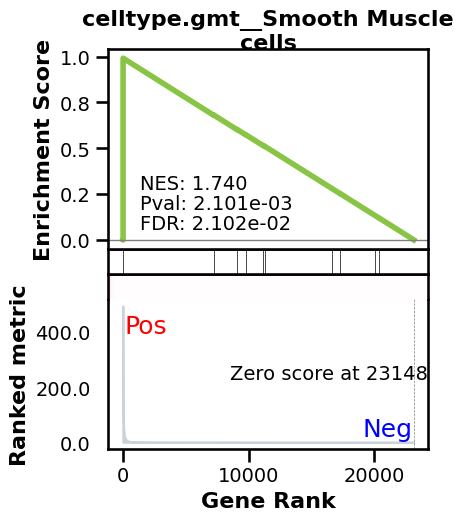

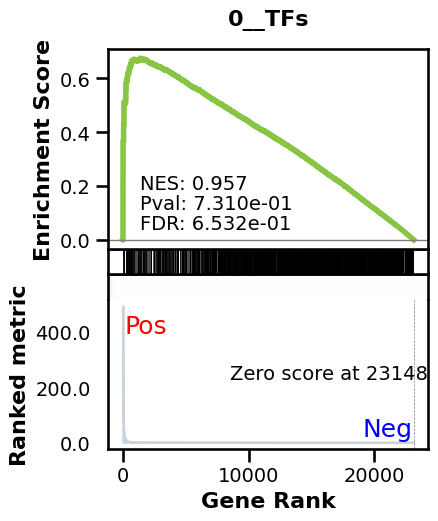

_________________________________________

TF specific enrichment

found some significant results for 

45.535714285714285

% TFs


_________________________________________

loading GT, 

omnipath

intersection of 12463 genes

intersection pct:

0.5383817875502181

precision: 

0.0006618214377693767


recall: 

1.0


random precision:

0.0006618672671051408


  0%|                                                                      | 0/128 [00:00<?, ?it/s]


  1%|▍                                                             | 1/128 [00:00<00:42,  2.97it/s]


  2%|▉                                                             | 2/128 [00:00<00:42,  2.98it/s]


  2%|█▍                                                            | 3/128 [00:01<00:41,  2.98it/s]


  3%|█▉                                                            | 4/128 [00:01<00:41,  2.98it/s]


  4%|██▍                                                           | 5/128 [00:01<00:41,  2.98it/s]


  5%|██▉                                                           | 6/128 [00:02<00:40,  2.98it/s]


  5%|███▍                                                          | 7/128 [00:02<00:40,  2.97it/s]


  6%|███▉                                                          | 8/128 [00:02<00:40,  2.98it/s]


  7%|████▎                                                         | 9/128 [00:03<00:39,  2.98it/s]


  8%|████▊                                                        | 10/128 [00:03<00:39,  2.98it/s]


  9%|█████▏                                                       | 11/128 [00:03<00:39,  2.98it/s]


  9%|█████▋                                                       | 12/128 [00:04<00:38,  2.98it/s]


 10%|██████▏                                                      | 13/128 [00:04<00:38,  2.98it/s]


 11%|██████▋                                                      | 14/128 [00:04<00:38,  2.97it/s]


 12%|███████▏                                                     | 15/128 [00:05<00:38,  2.96it/s]


 12%|███████▋                                                     | 16/128 [00:05<00:37,  2.97it/s]


 13%|████████                                                     | 17/128 [00:05<00:37,  2.97it/s]


 14%|████████▌                                                    | 18/128 [00:06<00:37,  2.97it/s]


 15%|█████████                                                    | 19/128 [00:06<00:36,  2.97it/s]


 16%|█████████▌                                                   | 20/128 [00:06<00:36,  2.97it/s]


 16%|██████████                                                   | 21/128 [00:07<00:36,  2.96it/s]


 17%|██████████▍                                                  | 22/128 [00:07<00:35,  2.96it/s]


 18%|██████████▉                                                  | 23/128 [00:07<00:35,  2.96it/s]


 19%|███████████▍                                                 | 24/128 [00:08<00:35,  2.96it/s]


 20%|███████████▉                                                 | 25/128 [00:08<00:34,  2.96it/s]


 20%|████████████▍                                                | 26/128 [00:08<00:34,  2.97it/s]


 21%|████████████▊                                                | 27/128 [00:09<00:34,  2.97it/s]


 22%|█████████████▎                                               | 28/128 [00:09<00:33,  2.97it/s]


 23%|█████████████▊                                               | 29/128 [00:09<00:33,  2.97it/s]


 23%|██████████████▎                                              | 30/128 [00:10<00:32,  2.97it/s]


 24%|██████████████▊                                              | 31/128 [00:10<00:32,  2.98it/s]


 25%|███████████████▎                                             | 32/128 [00:10<00:34,  2.77it/s]


 26%|███████████████▋                                             | 33/128 [00:11<00:33,  2.83it/s]


 27%|████████████████▏                                            | 34/128 [00:11<00:32,  2.87it/s]


 27%|████████████████▋                                            | 35/128 [00:11<00:32,  2.90it/s]


 28%|█████████████████▏                                           | 36/128 [00:12<00:31,  2.92it/s]


 29%|█████████████████▋                                           | 37/128 [00:12<00:30,  2.94it/s]


 30%|██████████████████                                           | 38/128 [00:12<00:30,  2.94it/s]


 30%|██████████████████▌                                          | 39/128 [00:13<00:30,  2.95it/s]


 31%|███████████████████                                          | 40/128 [00:13<00:29,  2.96it/s]


 32%|███████████████████▌                                         | 41/128 [00:13<00:29,  2.97it/s]


 33%|████████████████████                                         | 42/128 [00:14<00:28,  2.97it/s]


 34%|████████████████████▍                                        | 43/128 [00:14<00:28,  2.98it/s]


 34%|████████████████████▉                                        | 44/128 [00:14<00:28,  2.98it/s]


 35%|█████████████████████▍                                       | 45/128 [00:15<00:27,  2.98it/s]


 36%|█████████████████████▉                                       | 46/128 [00:15<00:27,  2.97it/s]


 37%|██████████████████████▍                                      | 47/128 [00:15<00:27,  2.97it/s]


 38%|██████████████████████▉                                      | 48/128 [00:16<00:26,  2.98it/s]


 38%|███████████████████████▎                                     | 49/128 [00:16<00:26,  2.98it/s]


 39%|███████████████████████▊                                     | 50/128 [00:16<00:26,  2.97it/s]


 40%|████████████████████████▎                                    | 51/128 [00:17<00:25,  2.98it/s]


 41%|████████████████████████▊                                    | 52/128 [00:17<00:25,  2.97it/s]


 41%|█████████████████████████▎                                   | 53/128 [00:17<00:25,  2.97it/s]


 42%|█████████████████████████▋                                   | 54/128 [00:18<00:24,  2.97it/s]


 43%|██████████████████████████▏                                  | 55/128 [00:18<00:24,  2.97it/s]


 44%|██████████████████████████▋                                  | 56/128 [00:18<00:24,  2.97it/s]


 45%|███████████████████████████▏                                 | 57/128 [00:19<00:23,  2.97it/s]


 45%|███████████████████████████▋                                 | 58/128 [00:19<00:23,  2.96it/s]


 46%|████████████████████████████                                 | 59/128 [00:19<00:23,  2.96it/s]


 47%|████████████████████████████▌                                | 60/128 [00:20<00:22,  2.97it/s]


 48%|█████████████████████████████                                | 61/128 [00:20<00:22,  2.97it/s]


 48%|█████████████████████████████▌                               | 62/128 [00:20<00:22,  2.97it/s]


 49%|██████████████████████████████                               | 63/128 [00:21<00:21,  2.96it/s]


 50%|██████████████████████████████▌                              | 64/128 [00:21<00:21,  2.97it/s]


 51%|██████████████████████████████▉                              | 65/128 [00:21<00:21,  2.97it/s]


 52%|███████████████████████████████▍                             | 66/128 [00:22<00:20,  2.97it/s]


 52%|███████████████████████████████▉                             | 67/128 [00:22<00:20,  2.97it/s]


 53%|████████████████████████████████▍                            | 68/128 [00:22<00:20,  2.97it/s]


 54%|████████████████████████████████▉                            | 69/128 [00:23<00:19,  2.97it/s]


 55%|█████████████████████████████████▎                           | 70/128 [00:23<00:19,  2.97it/s]


 55%|█████████████████████████████████▊                           | 71/128 [00:23<00:19,  2.97it/s]


 56%|██████████████████████████████████▎                          | 72/128 [00:24<00:18,  2.97it/s]


 57%|██████████████████████████████████▊                          | 73/128 [00:24<00:18,  2.98it/s]


 58%|███████████████████████████████████▎                         | 74/128 [00:24<00:18,  2.97it/s]


 59%|███████████████████████████████████▋                         | 75/128 [00:25<00:17,  2.97it/s]


 59%|████████████████████████████████████▏                        | 76/128 [00:25<00:17,  2.97it/s]


 60%|████████████████████████████████████▋                        | 77/128 [00:25<00:17,  2.97it/s]


 61%|█████████████████████████████████████▏                       | 78/128 [00:26<00:16,  2.98it/s]


 62%|█████████████████████████████████████▋                       | 79/128 [00:26<00:16,  2.98it/s]


 62%|██████████████████████████████████████▏                      | 80/128 [00:27<00:16,  2.97it/s]


 63%|██████████████████████████████████████▌                      | 81/128 [00:27<00:15,  2.97it/s]


 64%|███████████████████████████████████████                      | 82/128 [00:27<00:15,  2.96it/s]


 65%|███████████████████████████████████████▌                     | 83/128 [00:28<00:15,  2.96it/s]


 66%|████████████████████████████████████████                     | 84/128 [00:28<00:14,  2.97it/s]


 66%|████████████████████████████████████████▌                    | 85/128 [00:28<00:14,  2.97it/s]


 67%|████████████████████████████████████████▉                    | 86/128 [00:29<00:14,  2.97it/s]


 68%|█████████████████████████████████████████▍                   | 87/128 [00:29<00:13,  2.97it/s]


 69%|█████████████████████████████████████████▉                   | 88/128 [00:29<00:13,  2.97it/s]


 70%|██████████████████████████████████████████▍                  | 89/128 [00:30<00:13,  2.97it/s]


 70%|██████████████████████████████████████████▉                  | 90/128 [00:30<00:12,  2.97it/s]


 71%|███████████████████████████████████████████▎                 | 91/128 [00:30<00:12,  2.97it/s]


 72%|███████████████████████████████████████████▊                 | 92/128 [00:31<00:12,  2.97it/s]


 73%|████████████████████████████████████████████▎                | 93/128 [00:31<00:11,  2.97it/s]


 73%|████████████████████████████████████████████▊                | 94/128 [00:31<00:11,  2.97it/s]


 74%|█████████████████████████████████████████████▎               | 95/128 [00:32<00:11,  2.97it/s]


 75%|█████████████████████████████████████████████▊               | 96/128 [00:32<00:10,  2.97it/s]


 76%|██████████████████████████████████████████████▏              | 97/128 [00:32<00:10,  2.98it/s]


 77%|██████████████████████████████████████████████▋              | 98/128 [00:33<00:10,  2.98it/s]


 77%|███████████████████████████████████████████████▏             | 99/128 [00:33<00:09,  2.98it/s]


 78%|██████████████████████████████████████████████▉             | 100/128 [00:33<00:09,  2.98it/s]


 79%|███████████████████████████████████████████████▎            | 101/128 [00:34<00:09,  2.98it/s]


 80%|███████████████████████████████████████████████▊            | 102/128 [00:34<00:08,  2.98it/s]


 80%|████████████████████████████████████████████████▎           | 103/128 [00:34<00:08,  2.98it/s]


 81%|████████████████████████████████████████████████▊           | 104/128 [00:35<00:08,  2.98it/s]


 82%|█████████████████████████████████████████████████▏          | 105/128 [00:35<00:07,  2.98it/s]


 83%|█████████████████████████████████████████████████▋          | 106/128 [00:35<00:07,  2.98it/s]


 84%|██████████████████████████████████████████████████▏         | 107/128 [00:36<00:07,  2.98it/s]


 84%|██████████████████████████████████████████████████▋         | 108/128 [00:36<00:06,  2.98it/s]


 85%|███████████████████████████████████████████████████         | 109/128 [00:36<00:06,  2.98it/s]


 86%|███████████████████████████████████████████████████▌        | 110/128 [00:37<00:06,  2.98it/s]


 87%|████████████████████████████████████████████████████        | 111/128 [00:37<00:05,  2.98it/s]


 88%|████████████████████████████████████████████████████▌       | 112/128 [00:37<00:05,  2.97it/s]


 88%|████████████████████████████████████████████████████▉       | 113/128 [00:38<00:05,  2.97it/s]


 89%|█████████████████████████████████████████████████████▍      | 114/128 [00:38<00:04,  2.97it/s]


 90%|█████████████████████████████████████████████████████▉      | 115/128 [00:38<00:04,  2.97it/s]


 91%|██████████████████████████████████████████████████████▍     | 116/128 [00:39<00:04,  2.97it/s]


 91%|██████████████████████████████████████████████████████▊     | 117/128 [00:39<00:03,  2.97it/s]


 92%|███████████████████████████████████████████████████████▎    | 118/128 [00:39<00:03,  2.97it/s]


 93%|███████████████████████████████████████████████████████▊    | 119/128 [00:40<00:03,  2.97it/s]


 94%|████████████████████████████████████████████████████████▎   | 120/128 [00:40<00:02,  2.97it/s]


 95%|████████████████████████████████████████████████████████▋   | 121/128 [00:40<00:02,  2.97it/s]


 95%|█████████████████████████████████████████████████████████▏  | 122/128 [00:41<00:02,  2.98it/s]


 96%|█████████████████████████████████████████████████████████▋  | 123/128 [00:41<00:01,  2.98it/s]


 97%|██████████████████████████████████████████████████████████▏ | 124/128 [00:41<00:01,  2.98it/s]


 98%|██████████████████████████████████████████████████████████▌ | 125/128 [00:42<00:01,  2.98it/s]


 98%|███████████████████████████████████████████████████████████ | 126/128 [00:42<00:00,  2.98it/s]


 99%|███████████████████████████████████████████████████████████▌| 127/128 [00:42<00:00,  2.98it/s]

/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|████████████████████████████████████████████████████████████| 128/128 [00:43<00:00,  2.98it/s]


100%|████████████████████████████████████████████████████████████| 128/128 [00:43<00:00,  2.97it/s]

Area Under Precision-Recall Curve (AUPRC): 

0.0006405677370454236

EPR:

2.3354989943147966

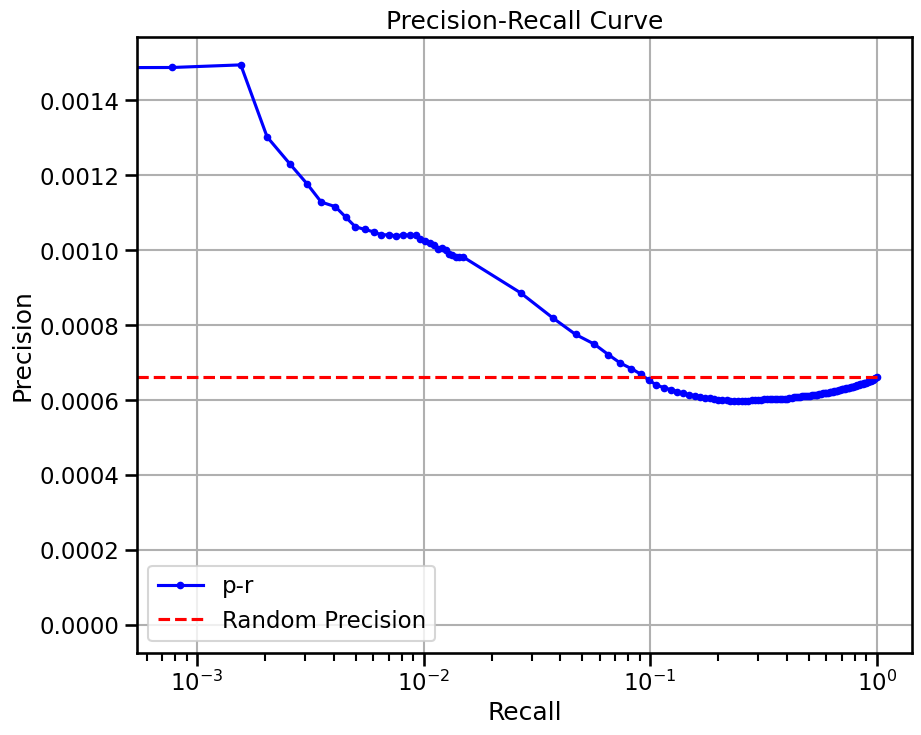

Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:165: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

base enrichment

Top central genes:

[]

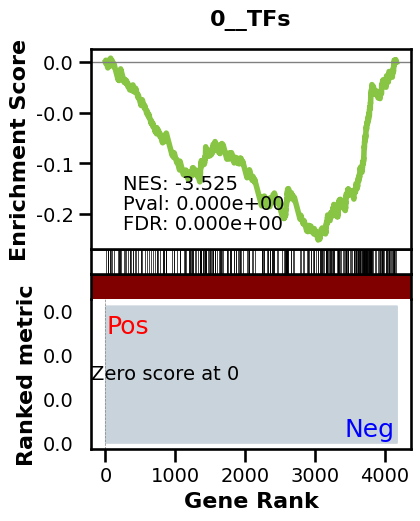

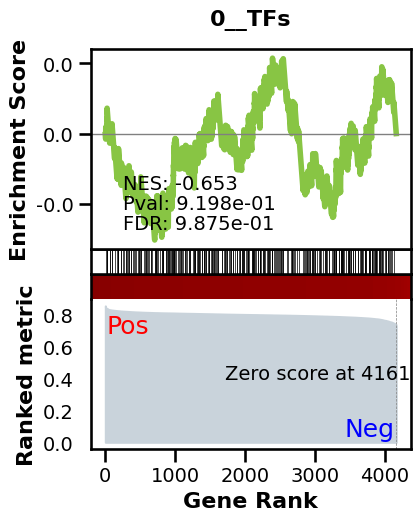

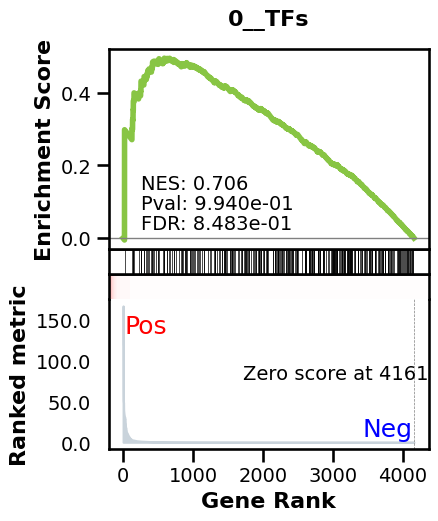

_________________________________________

TF specific enrichment

found some significant results for 

12.0

% TFs


_________________________________________

loading GT, 

omnipath

intersection of 2955 genes

intersection pct:

0.7099951946179721

precision: 

0.0006751011363343555


recall: 

1.0


random precision:

0.0006753296742951999


  0%|                                                                      | 0/128 [00:00<?, ?it/s]


  6%|███▉                                                          | 8/128 [00:00<00:01, 77.28it/s]


 12%|███████▋                                                     | 16/128 [00:00<00:01, 77.94it/s]


 19%|███████████▍                                                 | 24/128 [00:00<00:01, 78.26it/s]


 25%|███████████████▎                                             | 32/128 [00:00<00:01, 78.78it/s]


 31%|███████████████████                                          | 40/128 [00:00<00:01, 78.75it/s]


 38%|██████████████████████▉                                      | 48/128 [00:00<00:01, 79.06it/s]


 44%|██████████████████████████▋                                  | 56/128 [00:00<00:00, 79.17it/s]


 50%|██████████████████████████████▌                              | 64/128 [00:00<00:00, 79.31it/s]


 56%|██████████████████████████████████▎                          | 72/128 [00:00<00:00, 79.31it/s]


 62%|██████████████████████████████████████▏                      | 80/128 [00:01<00:00, 79.24it/s]


 69%|█████████████████████████████████████████▉                   | 88/128 [00:01<00:00, 79.26it/s]


 76%|██████████████████████████████████████████████▏              | 97/128 [00:01<00:00, 79.57it/s]


 82%|█████████████████████████████████████████████████▏          | 105/128 [00:01<00:00, 79.49it/s]


 88%|████████████████████████████████████████████████████▉       | 113/128 [00:01<00:00, 79.63it/s]


 95%|████████████████████████████████████████████████████████▋   | 121/128 [00:01<00:00, 79.30it/s]

/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 79.05it/s]

Area Under Precision-Recall Curve (AUPRC): 

0.00072780183215527

EPR:

0.2509347355825557

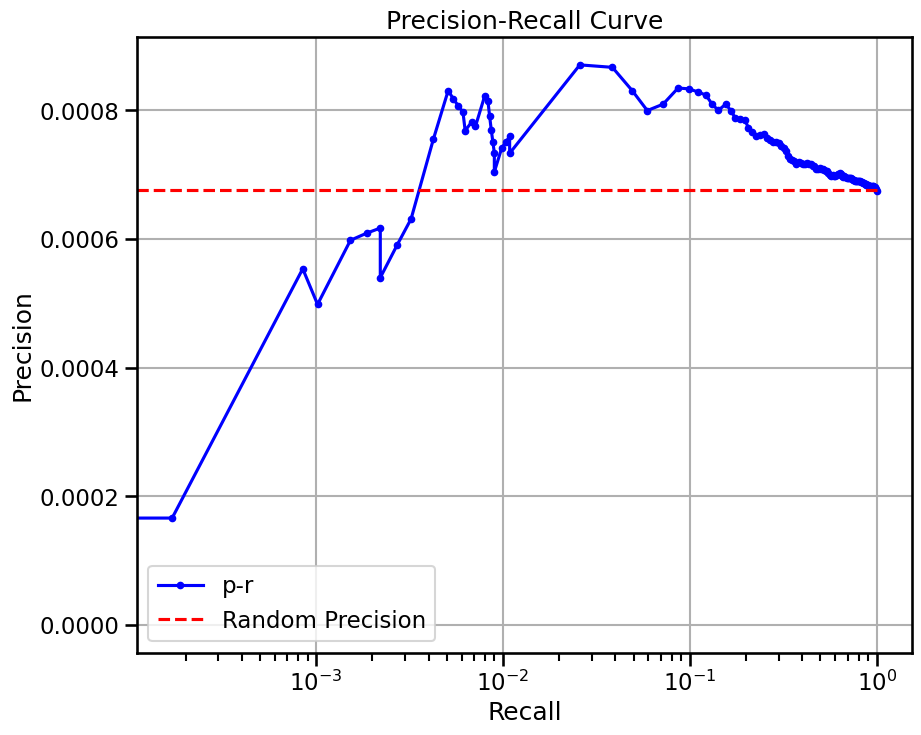

base enrichment

Top central genes:

[]

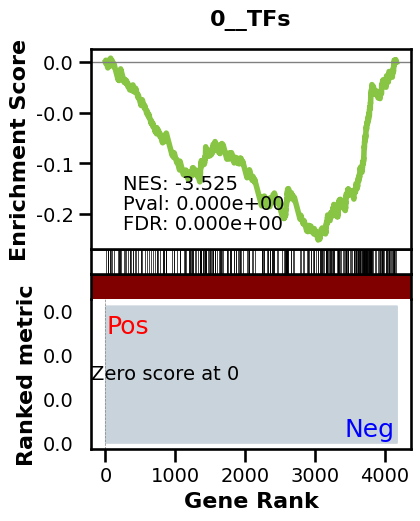

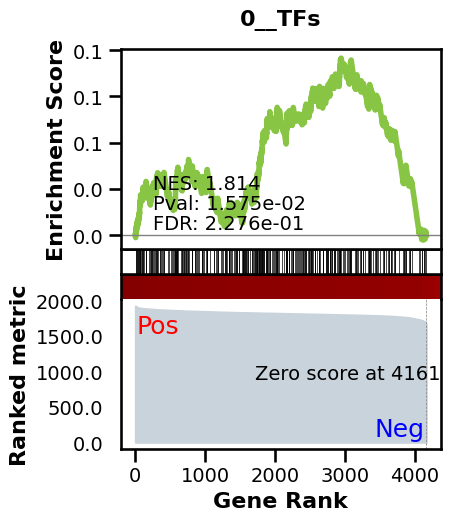

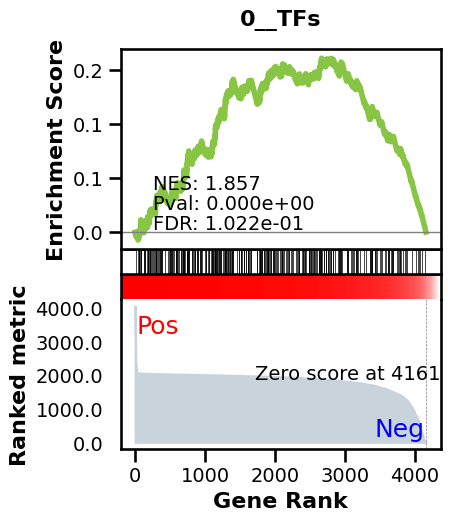

_________________________________________

TF specific enrichment

found some significant results for 

0.0

% TFs


_________________________________________

loading GT, 

omnipath

intersection of 2955 genes

intersection pct:

0.7099951946179721

precision: 

0.0006751011363343555


recall: 

1.0


random precision:

0.0006753296742951999


  0%|                                                                      | 0/128 [00:00<?, ?it/s]


  5%|███▍                                                          | 7/128 [00:00<00:01, 61.30it/s]


 11%|██████▋                                                      | 14/128 [00:00<00:01, 62.75it/s]


 16%|██████████                                                   | 21/128 [00:00<00:01, 63.61it/s]


 22%|█████████████▎                                               | 28/128 [00:00<00:01, 64.15it/s]


 27%|████████████████▋                                            | 35/128 [00:00<00:01, 64.35it/s]


 33%|████████████████████                                         | 42/128 [00:00<00:01, 64.48it/s]


 38%|███████████████████████▎                                     | 49/128 [00:00<00:01, 64.66it/s]


 44%|██████████████████████████▋                                  | 56/128 [00:00<00:01, 64.44it/s]


 49%|██████████████████████████████                               | 63/128 [00:00<00:01, 64.73it/s]


 55%|█████████████████████████████████▎                           | 70/128 [00:01<00:00, 64.52it/s]


 60%|████████████████████████████████████▋                        | 77/128 [00:01<00:00, 64.59it/s]


 66%|████████████████████████████████████████                     | 84/128 [00:01<00:00, 64.73it/s]


 71%|███████████████████████████████████████████▎                 | 91/128 [00:01<00:00, 65.04it/s]


 77%|██████████████████████████████████████████████▋              | 98/128 [00:01<00:00, 65.20it/s]


 82%|█████████████████████████████████████████████████▏          | 105/128 [00:01<00:00, 65.13it/s]


 88%|████████████████████████████████████████████████████▌       | 112/128 [00:01<00:00, 65.24it/s]


 93%|███████████████████████████████████████████████████████▊    | 119/128 [00:01<00:00, 65.12it/s]


 98%|███████████████████████████████████████████████████████████ | 126/128 [00:01<00:00, 64.66it/s]

/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 64.43it/s]

Area Under Precision-Recall Curve (AUPRC): 

0.0006988004376170396

EPR:

1.0047618593436278

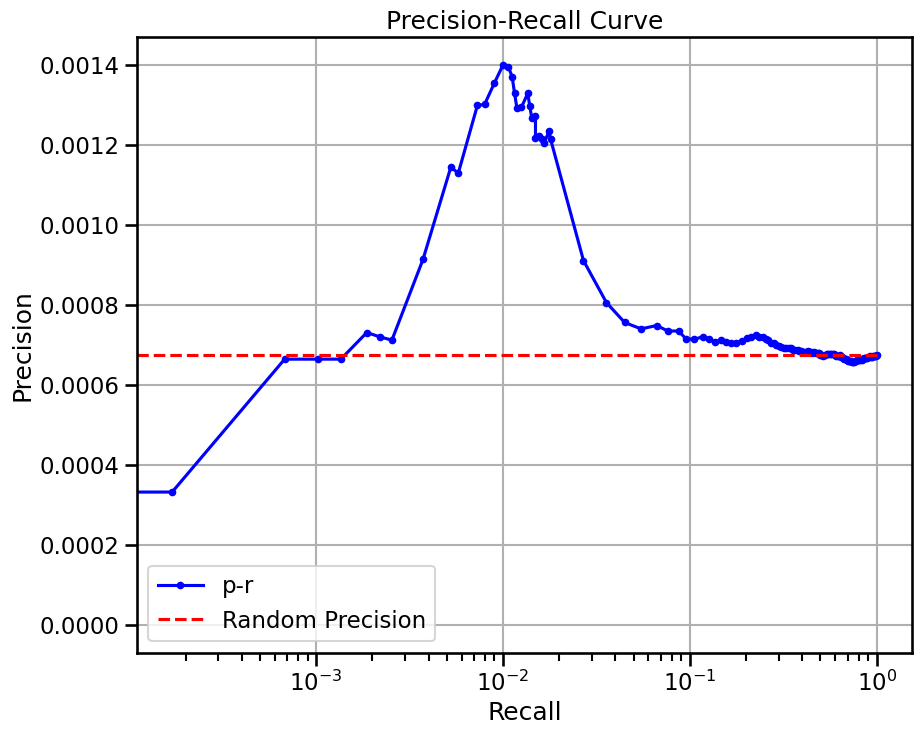

Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:165: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

avg link count: 534858129, sparsity: 1.0

base enrichment

too many genes for central computation

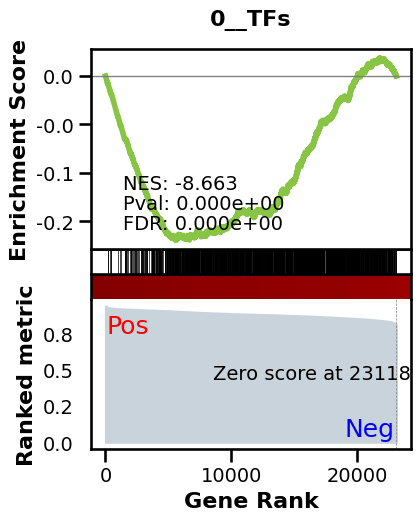

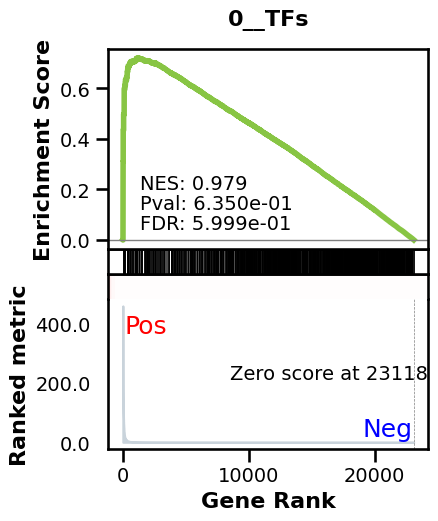

_________________________________________

TF specific enrichment

found some significant results for 

29.464285714285715

% TFs


_________________________________________

loading GT, 

omnipath

intersection of 12454 genes

intersection pct:

0.5386911198581253

precision: 

0.0006626421849703691


recall: 

1.0


random precision:

0.0006626881252216843


  0%|                                                                      | 0/128 [00:00<?, ?it/s]


  1%|▍                                                             | 1/128 [00:00<00:42,  2.95it/s]


  2%|▉                                                             | 2/128 [00:00<00:42,  2.95it/s]


  2%|█▍                                                            | 3/128 [00:01<00:42,  2.95it/s]


  3%|█▉                                                            | 4/128 [00:01<00:42,  2.94it/s]


  4%|██▍                                                           | 5/128 [00:01<00:41,  2.94it/s]


  5%|██▉                                                           | 6/128 [00:02<00:41,  2.94it/s]


  5%|███▍                                                          | 7/128 [00:02<00:41,  2.94it/s]


  6%|███▉                                                          | 8/128 [00:02<00:40,  2.94it/s]


  7%|████▎                                                         | 9/128 [00:03<00:40,  2.94it/s]


  8%|████▊                                                        | 10/128 [00:03<00:39,  2.96it/s]


  9%|█████▏                                                       | 11/128 [00:03<00:39,  2.98it/s]


  9%|█████▋                                                       | 12/128 [00:04<00:38,  2.98it/s]


 10%|██████▏                                                      | 13/128 [00:04<00:38,  2.99it/s]


 11%|██████▋                                                      | 14/128 [00:04<00:38,  3.00it/s]


 12%|███████▏                                                     | 15/128 [00:05<00:37,  3.00it/s]


 12%|███████▋                                                     | 16/128 [00:05<00:37,  3.00it/s]


 13%|████████                                                     | 17/128 [00:05<00:36,  3.01it/s]


 14%|████████▌                                                    | 18/128 [00:06<00:36,  3.01it/s]


 15%|█████████                                                    | 19/128 [00:06<00:36,  3.00it/s]


 16%|█████████▌                                                   | 20/128 [00:06<00:35,  3.00it/s]


 16%|██████████                                                   | 21/128 [00:07<00:35,  3.00it/s]


 17%|██████████▍                                                  | 22/128 [00:07<00:35,  3.00it/s]


 18%|██████████▉                                                  | 23/128 [00:07<00:34,  3.01it/s]


 19%|███████████▍                                                 | 24/128 [00:08<00:34,  3.00it/s]


 20%|███████████▉                                                 | 25/128 [00:08<00:34,  3.00it/s]


 20%|████████████▍                                                | 26/128 [00:08<00:33,  3.01it/s]


 21%|████████████▊                                                | 27/128 [00:09<00:33,  3.00it/s]


 22%|█████████████▎                                               | 28/128 [00:09<00:33,  3.01it/s]


 23%|█████████████▊                                               | 29/128 [00:09<00:32,  3.01it/s]


 23%|██████████████▎                                              | 30/128 [00:10<00:32,  3.00it/s]


 24%|██████████████▊                                              | 31/128 [00:10<00:32,  3.00it/s]


 25%|███████████████▎                                             | 32/128 [00:10<00:31,  3.01it/s]


 26%|███████████████▋                                             | 33/128 [00:11<00:31,  3.01it/s]


 27%|████████████████▏                                            | 34/128 [00:11<00:31,  3.00it/s]


 27%|████████████████▋                                            | 35/128 [00:11<00:30,  3.00it/s]


 28%|█████████████████▏                                           | 36/128 [00:12<00:30,  3.00it/s]


 29%|█████████████████▋                                           | 37/128 [00:12<00:30,  3.00it/s]


 30%|██████████████████                                           | 38/128 [00:12<00:29,  3.01it/s]


 30%|██████████████████▌                                          | 39/128 [00:13<00:29,  3.01it/s]


 31%|███████████████████                                          | 40/128 [00:13<00:29,  3.01it/s]


 32%|███████████████████▌                                         | 41/128 [00:13<00:28,  3.01it/s]


 33%|████████████████████                                         | 42/128 [00:14<00:28,  3.00it/s]


 34%|████████████████████▍                                        | 43/128 [00:14<00:28,  3.00it/s]


 34%|████████████████████▉                                        | 44/128 [00:14<00:27,  3.00it/s]


 35%|█████████████████████▍                                       | 45/128 [00:15<00:27,  3.00it/s]


 36%|█████████████████████▉                                       | 46/128 [00:15<00:27,  3.00it/s]


 37%|██████████████████████▍                                      | 47/128 [00:15<00:26,  3.00it/s]


 38%|██████████████████████▉                                      | 48/128 [00:16<00:26,  3.00it/s]


 38%|███████████████████████▎                                     | 49/128 [00:16<00:26,  3.01it/s]


 39%|███████████████████████▊                                     | 50/128 [00:16<00:25,  3.00it/s]


 40%|████████████████████████▎                                    | 51/128 [00:17<00:25,  3.01it/s]


 41%|████████████████████████▊                                    | 52/128 [00:17<00:25,  3.01it/s]


 41%|█████████████████████████▎                                   | 53/128 [00:17<00:24,  3.01it/s]


 42%|█████████████████████████▋                                   | 54/128 [00:18<00:24,  3.00it/s]


 43%|██████████████████████████▏                                  | 55/128 [00:18<00:24,  3.01it/s]


 44%|██████████████████████████▋                                  | 56/128 [00:18<00:23,  3.01it/s]


 45%|███████████████████████████▏                                 | 57/128 [00:19<00:23,  3.01it/s]


 45%|███████████████████████████▋                                 | 58/128 [00:19<00:23,  3.01it/s]


 46%|████████████████████████████                                 | 59/128 [00:19<00:22,  3.01it/s]


 47%|████████████████████████████▌                                | 60/128 [00:20<00:22,  3.01it/s]


 48%|█████████████████████████████                                | 61/128 [00:20<00:22,  3.00it/s]


 48%|█████████████████████████████▌                               | 62/128 [00:20<00:21,  3.01it/s]


 49%|██████████████████████████████                               | 63/128 [00:21<00:21,  3.01it/s]


 50%|██████████████████████████████▌                              | 64/128 [00:21<00:21,  3.01it/s]


 51%|██████████████████████████████▉                              | 65/128 [00:21<00:20,  3.01it/s]


 52%|███████████████████████████████▍                             | 66/128 [00:22<00:20,  3.01it/s]


 52%|███████████████████████████████▉                             | 67/128 [00:22<00:20,  3.01it/s]


 53%|████████████████████████████████▍                            | 68/128 [00:22<00:19,  3.01it/s]


 54%|████████████████████████████████▉                            | 69/128 [00:23<00:19,  3.01it/s]


 55%|█████████████████████████████████▎                           | 70/128 [00:23<00:19,  2.99it/s]


 55%|█████████████████████████████████▊                           | 71/128 [00:23<00:19,  3.00it/s]


 56%|██████████████████████████████████▎                          | 72/128 [00:24<00:18,  3.00it/s]


 57%|██████████████████████████████████▊                          | 73/128 [00:24<00:18,  3.00it/s]


 58%|███████████████████████████████████▎                         | 74/128 [00:24<00:17,  3.00it/s]


 59%|███████████████████████████████████▋                         | 75/128 [00:25<00:17,  3.00it/s]


 59%|████████████████████████████████████▏                        | 76/128 [00:25<00:17,  3.00it/s]


 60%|████████████████████████████████████▋                        | 77/128 [00:25<00:16,  3.00it/s]


 61%|█████████████████████████████████████▏                       | 78/128 [00:26<00:16,  3.00it/s]


 62%|█████████████████████████████████████▋                       | 79/128 [00:26<00:16,  3.00it/s]


 62%|██████████████████████████████████████▏                      | 80/128 [00:26<00:15,  3.01it/s]


 63%|██████████████████████████████████████▌                      | 81/128 [00:27<00:15,  2.99it/s]


 64%|███████████████████████████████████████                      | 82/128 [00:27<00:15,  2.99it/s]


 65%|███████████████████████████████████████▌                     | 83/128 [00:27<00:15,  3.00it/s]


 66%|████████████████████████████████████████                     | 84/128 [00:28<00:14,  3.00it/s]


 66%|████████████████████████████████████████▌                    | 85/128 [00:28<00:14,  3.00it/s]


 67%|████████████████████████████████████████▉                    | 86/128 [00:28<00:13,  3.00it/s]


 68%|█████████████████████████████████████████▍                   | 87/128 [00:29<00:13,  3.01it/s]


 69%|█████████████████████████████████████████▉                   | 88/128 [00:29<00:13,  3.01it/s]


 70%|██████████████████████████████████████████▍                  | 89/128 [00:29<00:12,  3.01it/s]


 70%|██████████████████████████████████████████▉                  | 90/128 [00:30<00:12,  3.01it/s]


 71%|███████████████████████████████████████████▎                 | 91/128 [00:30<00:12,  3.01it/s]


 72%|███████████████████████████████████████████▊                 | 92/128 [00:30<00:11,  3.01it/s]


 73%|████████████████████████████████████████████▎                | 93/128 [00:31<00:11,  3.01it/s]


 73%|████████████████████████████████████████████▊                | 94/128 [00:31<00:11,  3.01it/s]


 74%|█████████████████████████████████████████████▎               | 95/128 [00:31<00:11,  3.00it/s]


 75%|█████████████████████████████████████████████▊               | 96/128 [00:32<00:10,  3.00it/s]


 76%|██████████████████████████████████████████████▏              | 97/128 [00:32<00:10,  3.00it/s]


 77%|██████████████████████████████████████████████▋              | 98/128 [00:32<00:09,  3.00it/s]


 77%|███████████████████████████████████████████████▏             | 99/128 [00:33<00:09,  3.01it/s]


 78%|██████████████████████████████████████████████▉             | 100/128 [00:33<00:09,  3.01it/s]


 79%|███████████████████████████████████████████████▎            | 101/128 [00:33<00:08,  3.01it/s]


 80%|███████████████████████████████████████████████▊            | 102/128 [00:34<00:08,  3.01it/s]


 80%|████████████████████████████████████████████████▎           | 103/128 [00:34<00:08,  3.01it/s]


 81%|████████████████████████████████████████████████▊           | 104/128 [00:34<00:07,  3.01it/s]


 82%|█████████████████████████████████████████████████▏          | 105/128 [00:35<00:07,  3.01it/s]


 83%|█████████████████████████████████████████████████▋          | 106/128 [00:35<00:07,  3.00it/s]


 84%|██████████████████████████████████████████████████▏         | 107/128 [00:35<00:07,  2.99it/s]


 84%|██████████████████████████████████████████████████▋         | 108/128 [00:36<00:06,  2.99it/s]


 85%|███████████████████████████████████████████████████         | 109/128 [00:36<00:06,  3.00it/s]


 86%|███████████████████████████████████████████████████▌        | 110/128 [00:36<00:05,  3.00it/s]


 87%|████████████████████████████████████████████████████        | 111/128 [00:37<00:05,  3.00it/s]


 88%|████████████████████████████████████████████████████▌       | 112/128 [00:37<00:05,  3.00it/s]


 88%|████████████████████████████████████████████████████▉       | 113/128 [00:37<00:05,  2.99it/s]


 89%|█████████████████████████████████████████████████████▍      | 114/128 [00:38<00:04,  2.90it/s]


 90%|█████████████████████████████████████████████████████▉      | 115/128 [00:38<00:04,  2.86it/s]


 91%|██████████████████████████████████████████████████████▍     | 116/128 [00:38<00:04,  2.83it/s]


 91%|██████████████████████████████████████████████████████▊     | 117/128 [00:39<00:03,  2.84it/s]


 92%|███████████████████████████████████████████████████████▎    | 118/128 [00:39<00:03,  2.87it/s]


 93%|███████████████████████████████████████████████████████▊    | 119/128 [00:39<00:03,  2.89it/s]


 94%|████████████████████████████████████████████████████████▎   | 120/128 [00:40<00:02,  2.90it/s]


 95%|████████████████████████████████████████████████████████▋   | 121/128 [00:40<00:02,  2.90it/s]


 95%|█████████████████████████████████████████████████████████▏  | 122/128 [00:40<00:02,  2.91it/s]


 96%|█████████████████████████████████████████████████████████▋  | 123/128 [00:41<00:01,  2.92it/s]


 97%|██████████████████████████████████████████████████████████▏ | 124/128 [00:41<00:01,  2.92it/s]


 98%|██████████████████████████████████████████████████████████▌ | 125/128 [00:41<00:01,  2.93it/s]


 98%|███████████████████████████████████████████████████████████ | 126/128 [00:42<00:00,  2.93it/s]


 99%|███████████████████████████████████████████████████████████▌| 127/128 [00:42<00:00,  2.94it/s]

/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|████████████████████████████████████████████████████████████| 128/128 [00:42<00:00,  2.94it/s]


100%|████████████████████████████████████████████████████████████| 128/128 [00:42<00:00,  2.99it/s]

Area Under Precision-Recall Curve (AUPRC): 

0.0006206098173785863

EPR:

1.9285306771882353

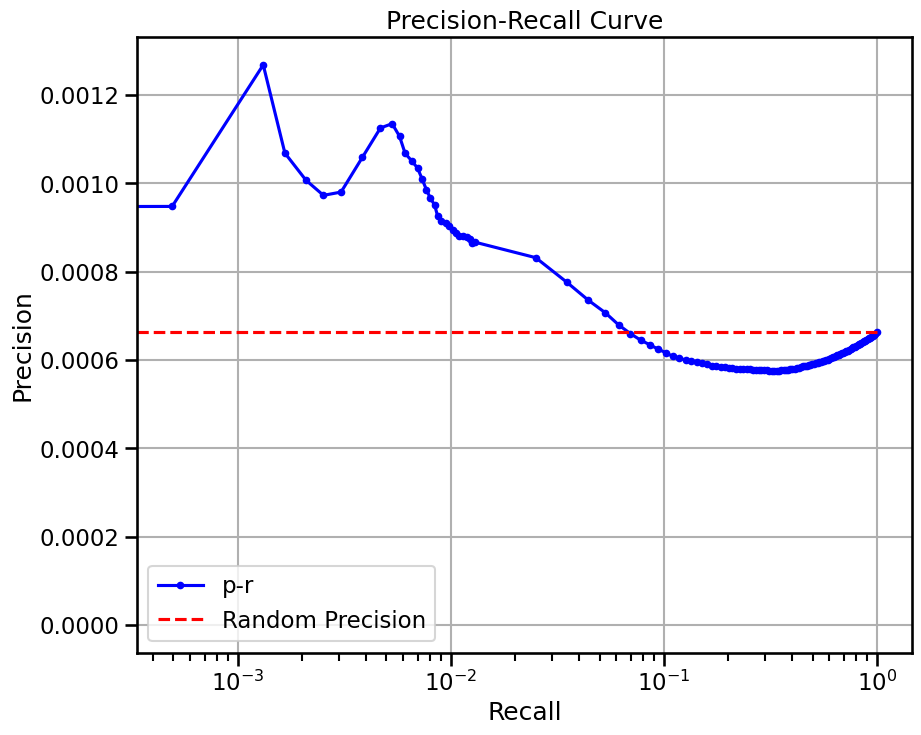

Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:165: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

base enrichment

Top central genes:

[]

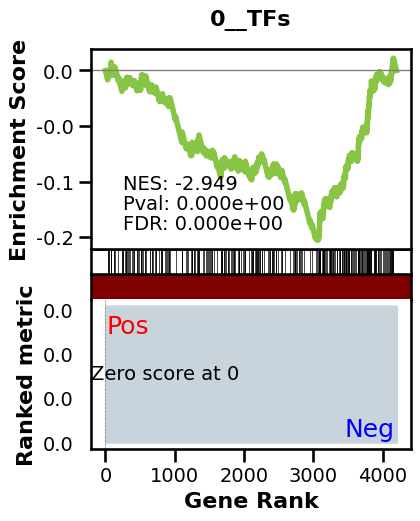

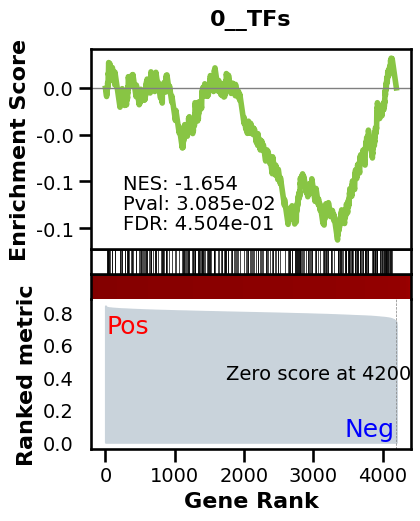

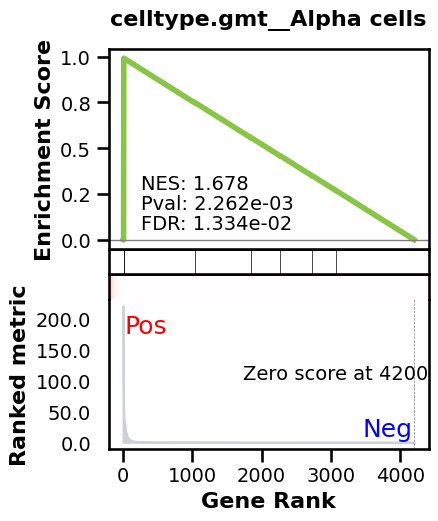

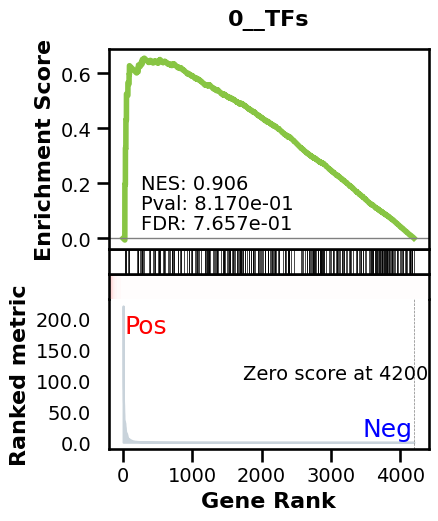

_________________________________________

TF specific enrichment

found some significant results for 

9.67741935483871

% TFs


_________________________________________

loading GT, 

omnipath

intersection of 2973 genes

intersection pct:

0.7076886455605809

precision: 

0.00072453856204891


recall: 

1.0


random precision:

0.000724782350259559


  0%|                                                                      | 0/128 [00:00<?, ?it/s]


  6%|███▉                                                          | 8/128 [00:00<00:01, 77.79it/s]


 12%|███████▋                                                     | 16/128 [00:00<00:01, 78.28it/s]


 19%|███████████▍                                                 | 24/128 [00:00<00:01, 78.61it/s]


 25%|███████████████▎                                             | 32/128 [00:00<00:01, 78.90it/s]


 31%|███████████████████                                          | 40/128 [00:00<00:01, 79.03it/s]


 38%|██████████████████████▉                                      | 48/128 [00:00<00:01, 78.84it/s]


 44%|██████████████████████████▋                                  | 56/128 [00:00<00:00, 78.79it/s]


 50%|██████████████████████████████▌                              | 64/128 [00:00<00:00, 78.96it/s]


 56%|██████████████████████████████████▎                          | 72/128 [00:00<00:00, 79.02it/s]


 62%|██████████████████████████████████████▏                      | 80/128 [00:01<00:00, 79.14it/s]


 69%|█████████████████████████████████████████▉                   | 88/128 [00:01<00:00, 79.25it/s]


 75%|█████████████████████████████████████████████▊               | 96/128 [00:01<00:00, 79.11it/s]


 81%|████████████████████████████████████████████████▊           | 104/128 [00:01<00:00, 79.14it/s]


 88%|████████████████████████████████████████████████████▌       | 112/128 [00:01<00:00, 78.96it/s]


 94%|████████████████████████████████████████████████████████▎   | 120/128 [00:01<00:00, 79.15it/s]

/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 79.00it/s]


100%|████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 78.92it/s]

Area Under Precision-Recall Curve (AUPRC): 

0.0007757774537168491

EPR:

0.86161640625

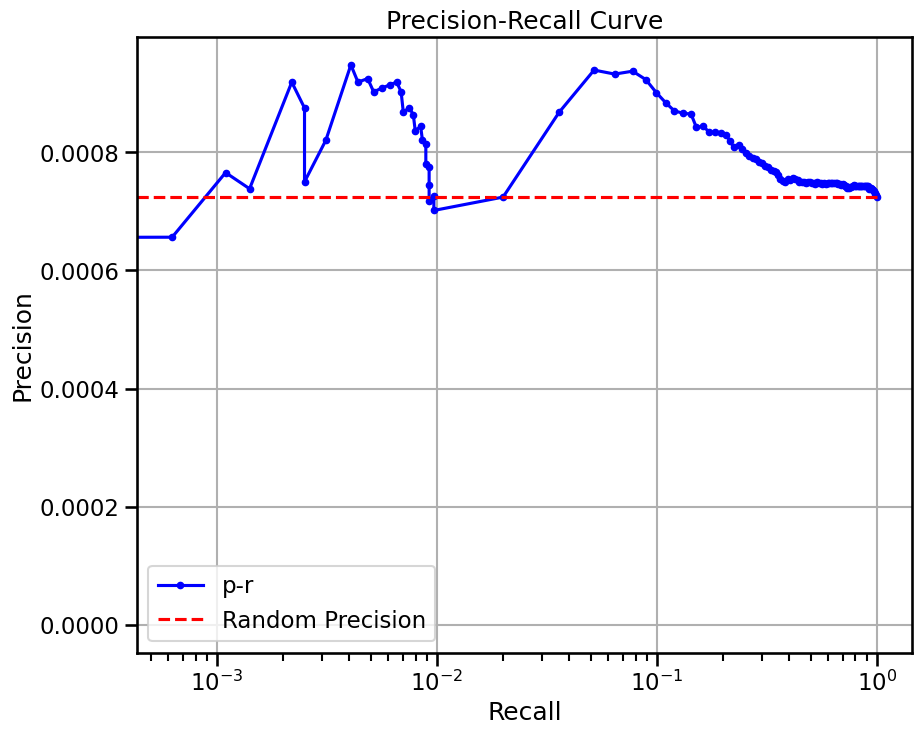

base enrichment

Top central genes:

[]

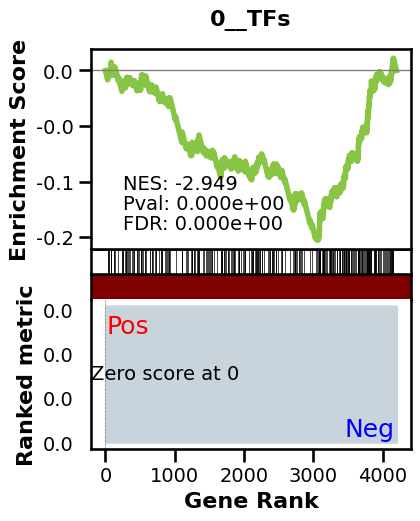

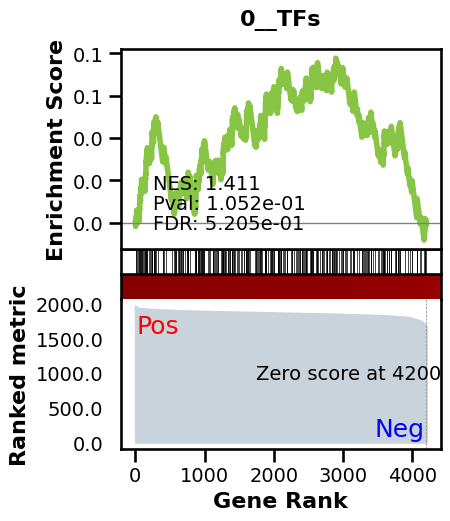

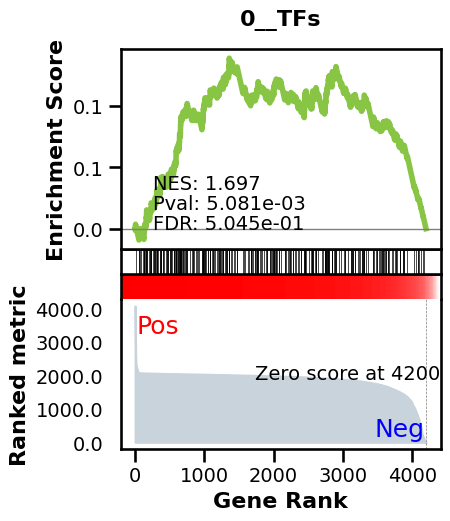

_________________________________________

TF specific enrichment

found some significant results for 

3.225806451612903

% TFs


_________________________________________

loading GT, 

omnipath

intersection of 2973 genes

intersection pct:

0.7076886455605809

precision: 

0.00072453856204891


recall: 

1.0


random precision:

0.000724782350259559


  0%|                                                                      | 0/128 [00:00<?, ?it/s]


  5%|███▍                                                          | 7/128 [00:00<00:01, 62.24it/s]


 11%|██████▋                                                      | 14/128 [00:00<00:01, 63.61it/s]


 16%|██████████                                                   | 21/128 [00:00<00:01, 64.39it/s]


 22%|█████████████▎                                               | 28/128 [00:00<00:01, 64.78it/s]


 27%|████████████████▋                                            | 35/128 [00:00<00:01, 64.96it/s]


 33%|████████████████████                                         | 42/128 [00:00<00:01, 64.86it/s]


 38%|███████████████████████▎                                     | 49/128 [00:00<00:01, 64.92it/s]


 44%|██████████████████████████▋                                  | 56/128 [00:00<00:01, 65.05it/s]


 49%|██████████████████████████████                               | 63/128 [00:00<00:00, 65.27it/s]


 55%|█████████████████████████████████▎                           | 70/128 [00:01<00:00, 65.15it/s]


 60%|████████████████████████████████████▋                        | 77/128 [00:01<00:00, 65.14it/s]


 66%|████████████████████████████████████████                     | 84/128 [00:01<00:00, 64.86it/s]


 71%|███████████████████████████████████████████▎                 | 91/128 [00:01<00:00, 64.88it/s]


 77%|██████████████████████████████████████████████▋              | 98/128 [00:01<00:00, 64.95it/s]


 82%|█████████████████████████████████████████████████▏          | 105/128 [00:01<00:00, 65.17it/s]


 88%|████████████████████████████████████████████████████▌       | 112/128 [00:01<00:00, 65.30it/s]


 93%|███████████████████████████████████████████████████████▊    | 119/128 [00:01<00:00, 65.25it/s]


 98%|███████████████████████████████████████████████████████████ | 126/128 [00:02<00:00, 53.33it/s]

/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|████████████████████████████████████████████████████████████| 128/128 [00:02<00:00, 62.35it/s]

Area Under Precision-Recall Curve (AUPRC): 

0.0007224260408699645

EPR:

1.725389656840716

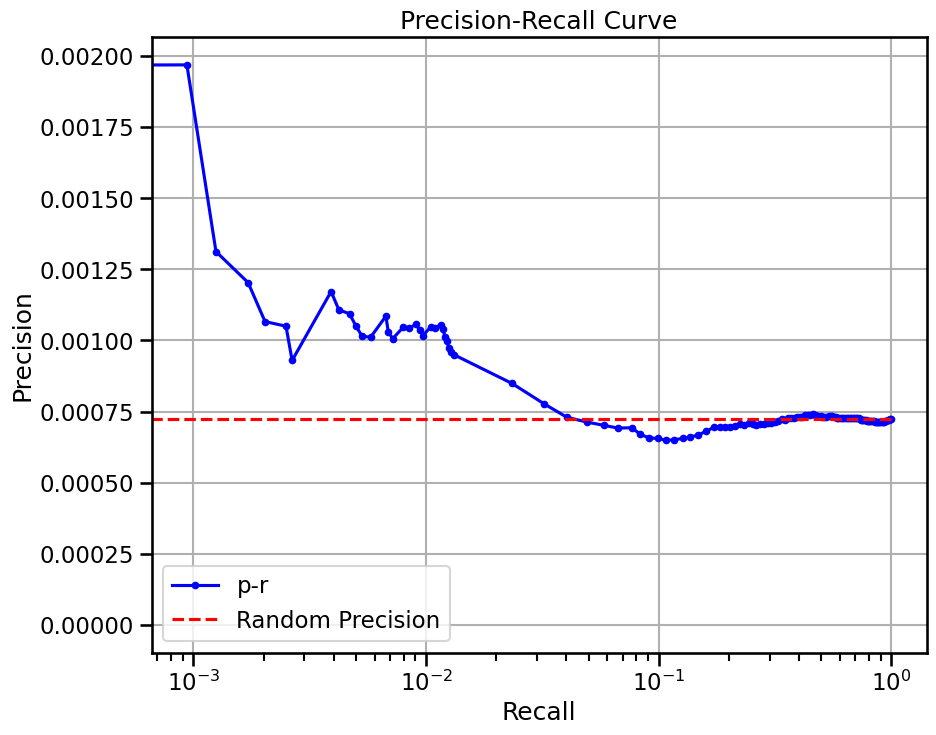

Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:165: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

avg link count: 533240464, sparsity: 1.0

base enrichment

too many genes for central computation

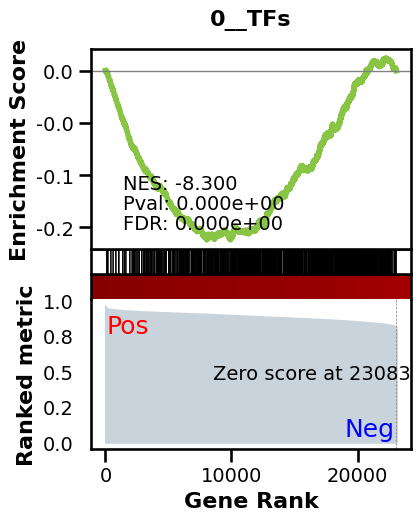

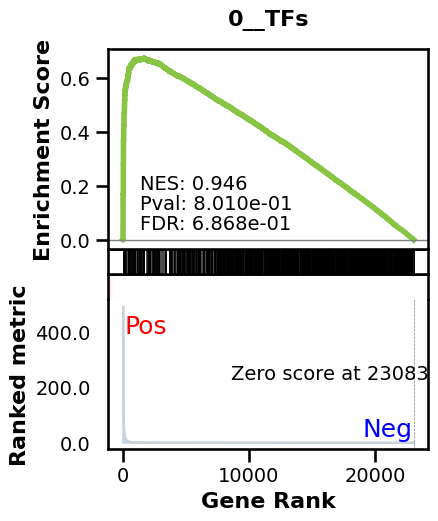

_________________________________________

TF specific enrichment

found some significant results for 

28.571428571428573

% TFs


_________________________________________

loading GT, 

omnipath

intersection of 12450 genes

intersection pct:

0.5393346040547565

precision: 

0.0006638377255573717


recall: 

1.0


random precision:

0.0006638838125974687


  0%|                                                                      | 0/128 [00:00<?, ?it/s]


  1%|▍                                                             | 1/128 [00:00<00:43,  2.90it/s]


  2%|▉                                                             | 2/128 [00:00<00:43,  2.90it/s]


  2%|█▍                                                            | 3/128 [00:01<00:43,  2.90it/s]


  3%|█▉                                                            | 4/128 [00:01<00:42,  2.90it/s]


  4%|██▍                                                           | 5/128 [00:01<00:42,  2.90it/s]


  5%|██▉                                                           | 6/128 [00:02<00:42,  2.89it/s]


  5%|███▍                                                          | 7/128 [00:02<00:41,  2.89it/s]


  6%|███▉                                                          | 8/128 [00:02<00:41,  2.89it/s]


  7%|████▎                                                         | 9/128 [00:03<00:41,  2.90it/s]


  8%|████▊                                                        | 10/128 [00:03<00:40,  2.90it/s]


  9%|█████▏                                                       | 11/128 [00:03<00:40,  2.89it/s]


  9%|█████▋                                                       | 12/128 [00:04<00:40,  2.89it/s]


 10%|██████▏                                                      | 13/128 [00:04<00:39,  2.89it/s]


 11%|██████▋                                                      | 14/128 [00:04<00:39,  2.85it/s]


 12%|███████▏                                                     | 15/128 [00:05<00:39,  2.87it/s]


 12%|███████▋                                                     | 16/128 [00:05<00:38,  2.87it/s]


 13%|████████                                                     | 17/128 [00:05<00:38,  2.87it/s]


 14%|████████▌                                                    | 18/128 [00:06<00:38,  2.88it/s]


 15%|█████████                                                    | 19/128 [00:06<00:37,  2.89it/s]


 16%|█████████▌                                                   | 20/128 [00:06<00:37,  2.88it/s]


 16%|██████████                                                   | 21/128 [00:07<00:37,  2.89it/s]


 17%|██████████▍                                                  | 22/128 [00:07<00:36,  2.88it/s]


 18%|██████████▉                                                  | 23/128 [00:07<00:36,  2.88it/s]


 19%|███████████▍                                                 | 24/128 [00:08<00:36,  2.88it/s]


 20%|███████████▉                                                 | 25/128 [00:08<00:35,  2.88it/s]


 20%|████████████▍                                                | 26/128 [00:09<00:35,  2.89it/s]


 21%|████████████▊                                                | 27/128 [00:09<00:35,  2.89it/s]


 22%|█████████████▎                                               | 28/128 [00:09<00:34,  2.89it/s]


 23%|█████████████▊                                               | 29/128 [00:10<00:34,  2.89it/s]


 23%|██████████████▎                                              | 30/128 [00:10<00:33,  2.90it/s]


 24%|██████████████▊                                              | 31/128 [00:10<00:33,  2.90it/s]


 25%|███████████████▎                                             | 32/128 [00:11<00:33,  2.90it/s]


 26%|███████████████▋                                             | 33/128 [00:11<00:32,  2.90it/s]


 27%|████████████████▏                                            | 34/128 [00:11<00:32,  2.90it/s]


 27%|████████████████▋                                            | 35/128 [00:12<00:32,  2.90it/s]


 28%|█████████████████▏                                           | 36/128 [00:12<00:31,  2.90it/s]


 29%|█████████████████▋                                           | 37/128 [00:12<00:31,  2.90it/s]


 30%|██████████████████                                           | 38/128 [00:13<00:31,  2.90it/s]


 30%|██████████████████▌                                          | 39/128 [00:13<00:30,  2.90it/s]


 31%|███████████████████                                          | 40/128 [00:13<00:30,  2.90it/s]


 32%|███████████████████▌                                         | 41/128 [00:14<00:30,  2.88it/s]


 33%|████████████████████                                         | 42/128 [00:14<00:29,  2.89it/s]


 34%|████████████████████▍                                        | 43/128 [00:14<00:29,  2.88it/s]


 34%|████████████████████▉                                        | 44/128 [00:15<00:29,  2.88it/s]


 35%|█████████████████████▍                                       | 45/128 [00:15<00:28,  2.88it/s]


 36%|█████████████████████▉                                       | 46/128 [00:15<00:28,  2.89it/s]


 37%|██████████████████████▍                                      | 47/128 [00:16<00:27,  2.89it/s]


 38%|██████████████████████▉                                      | 48/128 [00:16<00:27,  2.89it/s]


 38%|███████████████████████▎                                     | 49/128 [00:16<00:27,  2.90it/s]


 39%|███████████████████████▊                                     | 50/128 [00:17<00:26,  2.90it/s]


 40%|████████████████████████▎                                    | 51/128 [00:17<00:26,  2.90it/s]


 41%|████████████████████████▊                                    | 52/128 [00:17<00:26,  2.90it/s]


 41%|█████████████████████████▎                                   | 53/128 [00:18<00:25,  2.90it/s]


 42%|█████████████████████████▋                                   | 54/128 [00:18<00:25,  2.90it/s]


 43%|██████████████████████████▏                                  | 55/128 [00:19<00:25,  2.91it/s]


 44%|██████████████████████████▋                                  | 56/128 [00:19<00:24,  2.90it/s]


 45%|███████████████████████████▏                                 | 57/128 [00:19<00:24,  2.90it/s]


 45%|███████████████████████████▋                                 | 58/128 [00:20<00:24,  2.90it/s]


 46%|████████████████████████████                                 | 59/128 [00:20<00:23,  2.90it/s]


 47%|████████████████████████████▌                                | 60/128 [00:20<00:23,  2.90it/s]


 48%|█████████████████████████████                                | 61/128 [00:21<00:23,  2.90it/s]


 48%|█████████████████████████████▌                               | 62/128 [00:21<00:22,  2.90it/s]


 49%|██████████████████████████████                               | 63/128 [00:21<00:22,  2.90it/s]


 50%|██████████████████████████████▌                              | 64/128 [00:22<00:22,  2.90it/s]


 51%|██████████████████████████████▉                              | 65/128 [00:22<00:21,  2.90it/s]


 52%|███████████████████████████████▍                             | 66/128 [00:22<00:21,  2.90it/s]


 52%|███████████████████████████████▉                             | 67/128 [00:23<00:21,  2.90it/s]


 53%|████████████████████████████████▍                            | 68/128 [00:23<00:20,  2.90it/s]


 54%|████████████████████████████████▉                            | 69/128 [00:23<00:20,  2.90it/s]


 55%|█████████████████████████████████▎                           | 70/128 [00:24<00:20,  2.90it/s]


 55%|█████████████████████████████████▊                           | 71/128 [00:24<00:19,  2.90it/s]


 56%|██████████████████████████████████▎                          | 72/128 [00:24<00:19,  2.90it/s]


 57%|██████████████████████████████████▊                          | 73/128 [00:25<00:19,  2.89it/s]


 58%|███████████████████████████████████▎                         | 74/128 [00:25<00:18,  2.89it/s]


 59%|███████████████████████████████████▋                         | 75/128 [00:25<00:18,  2.89it/s]


 59%|████████████████████████████████████▏                        | 76/128 [00:26<00:17,  2.89it/s]


 60%|████████████████████████████████████▋                        | 77/128 [00:26<00:17,  2.90it/s]


 61%|█████████████████████████████████████▏                       | 78/128 [00:26<00:17,  2.90it/s]


 62%|█████████████████████████████████████▋                       | 79/128 [00:27<00:16,  2.90it/s]


 62%|██████████████████████████████████████▏                      | 80/128 [00:27<00:16,  2.90it/s]


 63%|██████████████████████████████████████▌                      | 81/128 [00:27<00:16,  2.90it/s]


 64%|███████████████████████████████████████                      | 82/128 [00:28<00:15,  2.90it/s]


 65%|███████████████████████████████████████▌                     | 83/128 [00:28<00:15,  2.89it/s]


 66%|████████████████████████████████████████                     | 84/128 [00:29<00:15,  2.89it/s]


 66%|████████████████████████████████████████▌                    | 85/128 [00:29<00:14,  2.90it/s]


 67%|████████████████████████████████████████▉                    | 86/128 [00:29<00:14,  2.90it/s]


 68%|█████████████████████████████████████████▍                   | 87/128 [00:30<00:14,  2.90it/s]


 69%|█████████████████████████████████████████▉                   | 88/128 [00:30<00:13,  2.90it/s]


 70%|██████████████████████████████████████████▍                  | 89/128 [00:30<00:13,  2.90it/s]


 70%|██████████████████████████████████████████▉                  | 90/128 [00:31<00:13,  2.90it/s]


 71%|███████████████████████████████████████████▎                 | 91/128 [00:31<00:12,  2.90it/s]


 72%|███████████████████████████████████████████▊                 | 92/128 [00:31<00:12,  2.90it/s]


 73%|████████████████████████████████████████████▎                | 93/128 [00:32<00:12,  2.90it/s]


 73%|████████████████████████████████████████████▊                | 94/128 [00:32<00:11,  2.90it/s]


 74%|█████████████████████████████████████████████▎               | 95/128 [00:32<00:11,  2.90it/s]


 75%|█████████████████████████████████████████████▊               | 96/128 [00:33<00:11,  2.90it/s]


 76%|██████████████████████████████████████████████▏              | 97/128 [00:33<00:10,  2.90it/s]


 77%|██████████████████████████████████████████████▋              | 98/128 [00:33<00:10,  2.90it/s]


 77%|███████████████████████████████████████████████▏             | 99/128 [00:34<00:09,  2.90it/s]


 78%|██████████████████████████████████████████████▉             | 100/128 [00:34<00:09,  2.90it/s]


 79%|███████████████████████████████████████████████▎            | 101/128 [00:34<00:09,  2.90it/s]


 80%|███████████████████████████████████████████████▊            | 102/128 [00:35<00:08,  2.90it/s]


 80%|████████████████████████████████████████████████▎           | 103/128 [00:35<00:08,  2.87it/s]


 81%|████████████████████████████████████████████████▊           | 104/128 [00:35<00:08,  2.88it/s]


 82%|█████████████████████████████████████████████████▏          | 105/128 [00:36<00:07,  2.89it/s]


 83%|█████████████████████████████████████████████████▋          | 106/128 [00:36<00:07,  2.89it/s]


 84%|██████████████████████████████████████████████████▏         | 107/128 [00:36<00:07,  2.90it/s]


 84%|██████████████████████████████████████████████████▋         | 108/128 [00:37<00:06,  2.90it/s]


 85%|███████████████████████████████████████████████████         | 109/128 [00:37<00:06,  2.89it/s]


 86%|███████████████████████████████████████████████████▌        | 110/128 [00:38<00:06,  2.90it/s]


 87%|████████████████████████████████████████████████████        | 111/128 [00:38<00:05,  2.90it/s]


 88%|████████████████████████████████████████████████████▌       | 112/128 [00:38<00:05,  2.90it/s]


 88%|████████████████████████████████████████████████████▉       | 113/128 [00:39<00:05,  2.90it/s]


 89%|█████████████████████████████████████████████████████▍      | 114/128 [00:39<00:04,  2.90it/s]


 90%|█████████████████████████████████████████████████████▉      | 115/128 [00:39<00:04,  2.90it/s]


 91%|██████████████████████████████████████████████████████▍     | 116/128 [00:40<00:04,  2.90it/s]


 91%|██████████████████████████████████████████████████████▊     | 117/128 [00:40<00:03,  2.89it/s]


 92%|███████████████████████████████████████████████████████▎    | 118/128 [00:40<00:03,  2.89it/s]


 93%|███████████████████████████████████████████████████████▊    | 119/128 [00:41<00:03,  2.90it/s]


 94%|████████████████████████████████████████████████████████▎   | 120/128 [00:41<00:02,  2.90it/s]


 95%|████████████████████████████████████████████████████████▋   | 121/128 [00:41<00:02,  2.90it/s]


 95%|█████████████████████████████████████████████████████████▏  | 122/128 [00:42<00:02,  2.90it/s]


 96%|█████████████████████████████████████████████████████████▋  | 123/128 [00:42<00:01,  2.90it/s]


 97%|██████████████████████████████████████████████████████████▏ | 124/128 [00:42<00:01,  2.90it/s]


 98%|██████████████████████████████████████████████████████████▌ | 125/128 [00:43<00:01,  2.90it/s]


 98%|███████████████████████████████████████████████████████████ | 126/128 [00:43<00:00,  2.90it/s]


 99%|███████████████████████████████████████████████████████████▌| 127/128 [00:43<00:00,  2.90it/s]

/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|████████████████████████████████████████████████████████████| 128/128 [00:44<00:00,  2.89it/s]


100%|████████████████████████████████████████████████████████████| 128/128 [00:44<00:00,  2.89it/s]

Area Under Precision-Recall Curve (AUPRC): 

0.0006329505400991522

EPR:

2.278341210602784

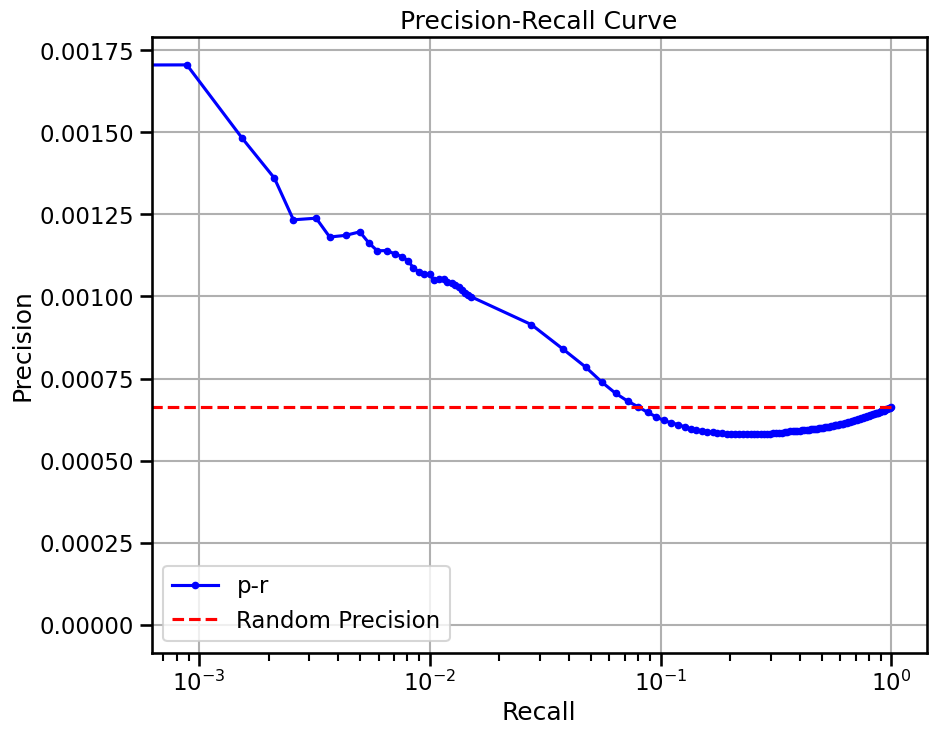

Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:165: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

base enrichment

Top central genes:

[]

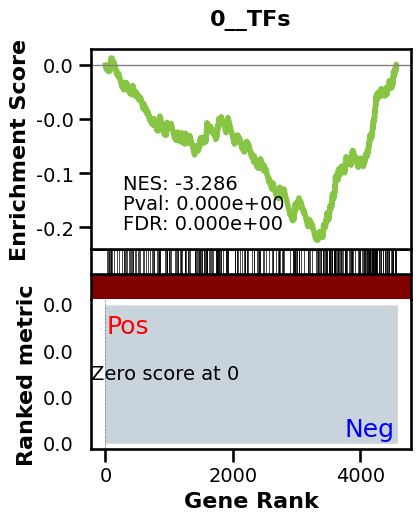

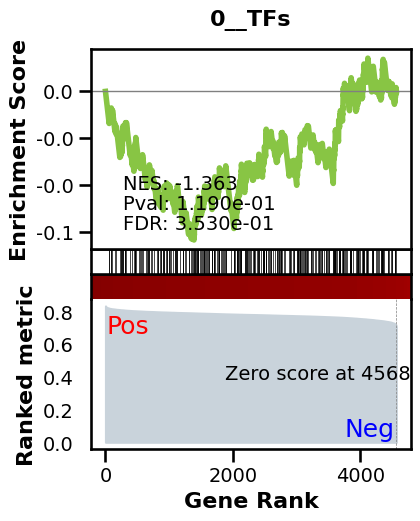

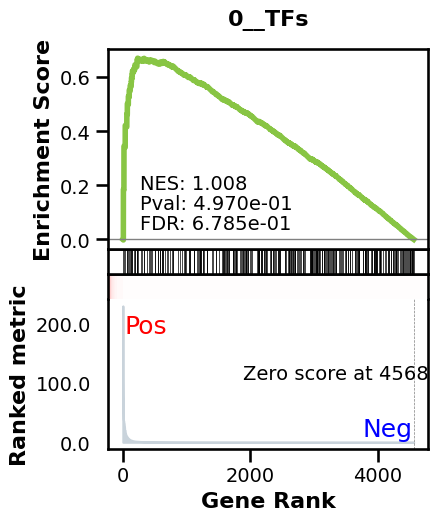

_________________________________________

TF specific enrichment

found some significant results for 

8.333333333333334

% TFs


_________________________________________

loading GT, 

omnipath

intersection of 3262 genes

intersection pct:

0.7139417815714598

precision: 

0.0010004093737183578


recall: 

1.0


random precision:

0.0010007161536551004


  0%|                                                                      | 0/128 [00:00<?, ?it/s]


  2%|█▍                                                            | 3/128 [00:00<00:04, 25.97it/s]


  7%|████▎                                                         | 9/128 [00:00<00:02, 43.02it/s]


 12%|███████▋                                                     | 16/128 [00:00<00:02, 52.08it/s]


 18%|██████████▉                                                  | 23/128 [00:00<00:01, 56.68it/s]


 23%|██████████████▎                                              | 30/128 [00:00<00:01, 58.88it/s]


 29%|█████████████████▋                                           | 37/128 [00:00<00:01, 60.40it/s]


 34%|████████████████████▉                                        | 44/128 [00:00<00:01, 61.62it/s]


 40%|████████████████████████▎                                    | 51/128 [00:00<00:01, 62.24it/s]


 45%|███████████████████████████▋                                 | 58/128 [00:00<00:01, 62.59it/s]


 51%|██████████████████████████████▉                              | 65/128 [00:01<00:00, 63.00it/s]


 56%|██████████████████████████████████▎                          | 72/128 [00:01<00:00, 63.12it/s]


 62%|█████████████████████████████████████▋                       | 79/128 [00:01<00:00, 63.32it/s]


 67%|████████████████████████████████████████▉                    | 86/128 [00:01<00:00, 63.57it/s]


 73%|████████████████████████████████████████████▎                | 93/128 [00:01<00:00, 63.51it/s]


 78%|██████████████████████████████████████████████▉             | 100/128 [00:01<00:00, 63.60it/s]


 84%|██████████████████████████████████████████████████▏         | 107/128 [00:01<00:00, 63.67it/s]


 89%|█████████████████████████████████████████████████████▍      | 114/128 [00:01<00:00, 63.37it/s]


 95%|████████████████████████████████████████████████████████▋   | 121/128 [00:01<00:00, 63.49it/s]

/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|████████████████████████████████████████████████████████████| 128/128 [00:02<00:00, 63.29it/s]


100%|████████████████████████████████████████████████████████████| 128/128 [00:02<00:00, 60.97it/s]

Area Under Precision-Recall Curve (AUPRC): 

0.0010552351086798631

EPR:

1.7864029555225882

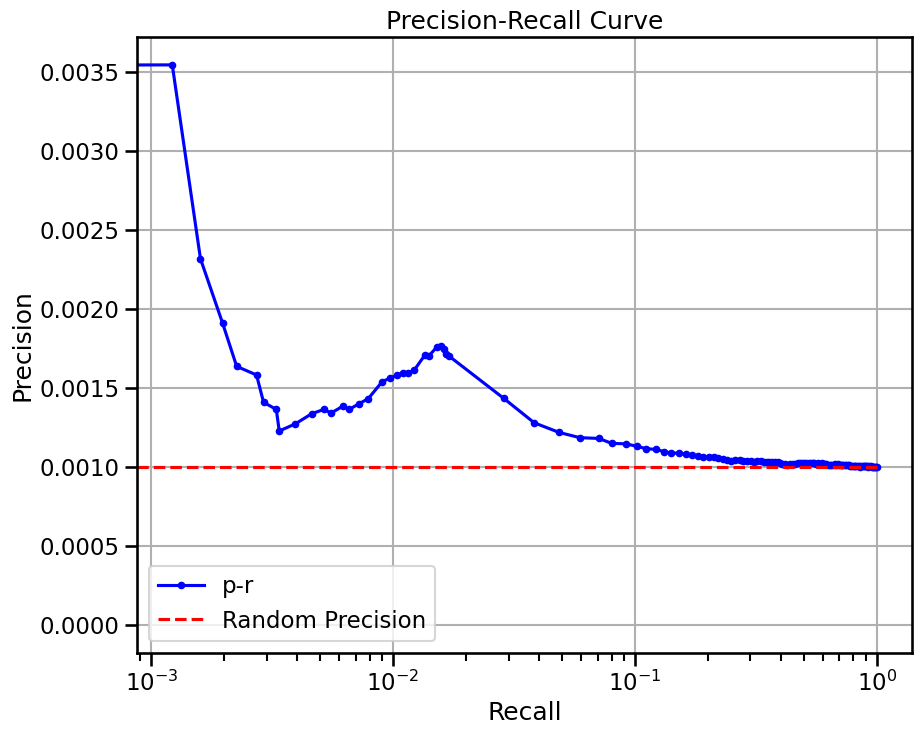

base enrichment

Top central genes:

[]

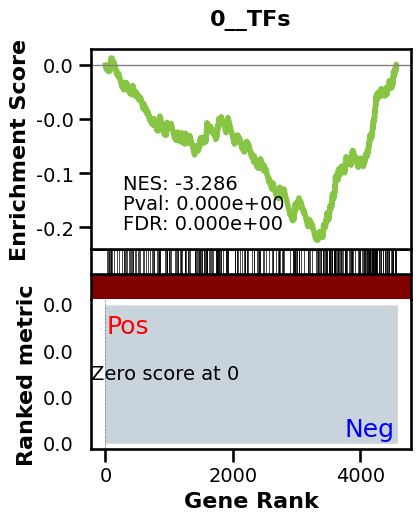

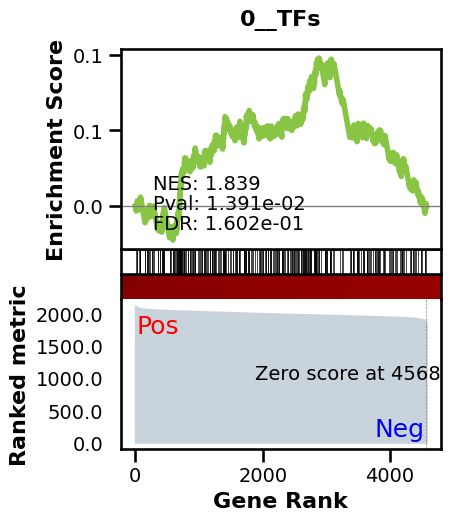

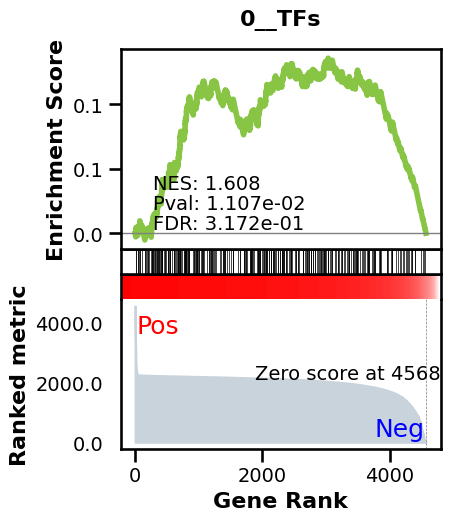

_________________________________________

TF specific enrichment

found some significant results for 

0.0

% TFs


_________________________________________

loading GT, 

omnipath

intersection of 3262 genes

intersection pct:

0.7139417815714598

precision: 

0.0010004093737183578


recall: 

1.0


random precision:

0.0010007161536551004


  0%|                                                                      | 0/128 [00:00<?, ?it/s]


  4%|██▍                                                           | 5/128 [00:00<00:03, 40.50it/s]


  8%|████▊                                                        | 10/128 [00:00<00:03, 33.19it/s]


 12%|███████▋                                                     | 16/128 [00:00<00:02, 40.94it/s]


 17%|██████████▍                                                  | 22/128 [00:00<00:02, 45.34it/s]


 22%|█████████████▎                                               | 28/128 [00:00<00:02, 48.23it/s]


 26%|███████████████▋                                             | 33/128 [00:00<00:01, 47.88it/s]


 30%|██████████████████▌                                          | 39/128 [00:00<00:01, 49.88it/s]


 35%|█████████████████████▍                                       | 45/128 [00:00<00:01, 51.22it/s]


 40%|████████████████████████▎                                    | 51/128 [00:01<00:01, 52.02it/s]


 45%|███████████████████████████▏                                 | 57/128 [00:01<00:01, 52.26it/s]


 49%|██████████████████████████████                               | 63/128 [00:01<00:01, 52.77it/s]


 54%|████████████████████████████████▉                            | 69/128 [00:01<00:01, 53.11it/s]


 59%|███████████████████████████████████▋                         | 75/128 [00:01<00:00, 53.22it/s]


 63%|██████████████████████████████████████▌                      | 81/128 [00:01<00:00, 53.43it/s]


 68%|█████████████████████████████████████████▍                   | 87/128 [00:01<00:00, 53.31it/s]


 73%|████████████████████████████████████████████▎                | 93/128 [00:01<00:00, 53.52it/s]


 77%|███████████████████████████████████████████████▏             | 99/128 [00:01<00:00, 53.62it/s]


 82%|█████████████████████████████████████████████████▏          | 105/128 [00:02<00:00, 53.58it/s]


 87%|████████████████████████████████████████████████████        | 111/128 [00:02<00:00, 53.71it/s]


 91%|██████████████████████████████████████████████████████▊     | 117/128 [00:02<00:00, 53.71it/s]


 96%|█████████████████████████████████████████████████████████▋  | 123/128 [00:02<00:00, 53.84it/s]

/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|████████████████████████████████████████████████████████████| 128/128 [00:02<00:00, 50.46it/s]

Area Under Precision-Recall Curve (AUPRC): 

0.001063918743654735

EPR:

1.1267687215314954

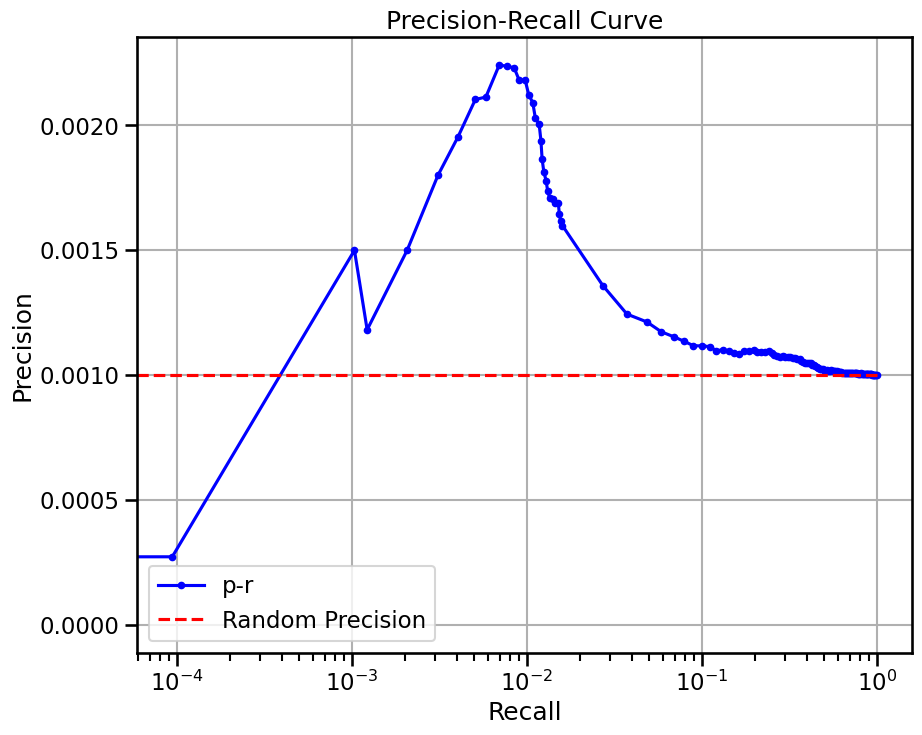

Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:165: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

avg link count: 369446841, sparsity: 1.0

base enrichment

too many genes for central computation

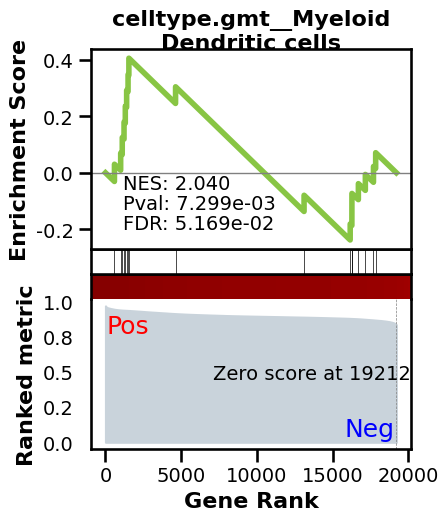

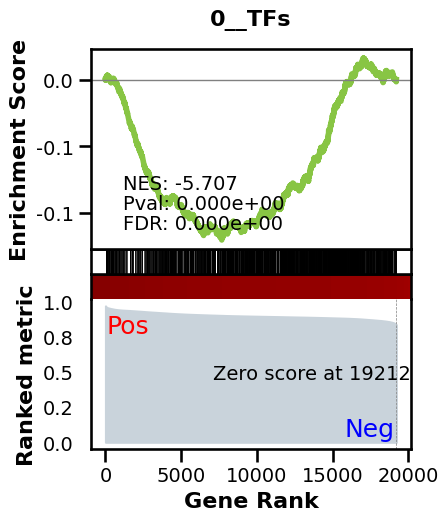

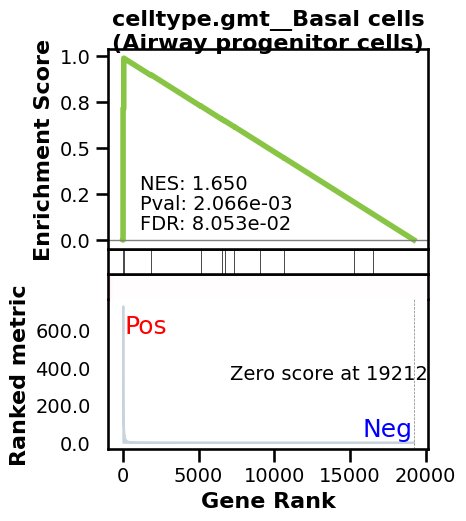

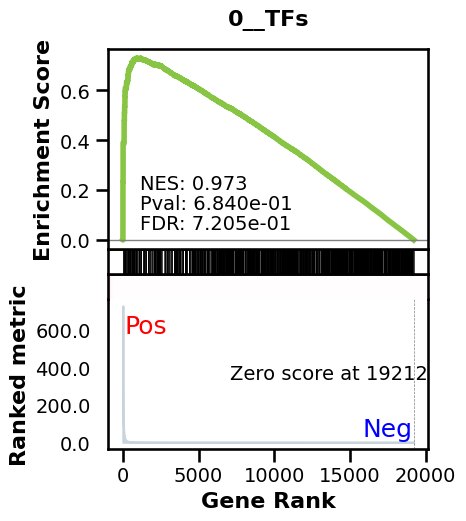

_________________________________________

TF specific enrichment

found some significant results for 

16.50485436893204

% TFs


_________________________________________

loading GT, 

omnipath

intersection of 11517 genes

intersection pct:

0.5994378806016759

precision: 

0.0007492075812903335


recall: 

1.0


random precision:

0.0007492680158778378


  0%|                                                                      | 0/128 [00:00<?, ?it/s]


  1%|▍                                                             | 1/128 [00:00<00:30,  4.16it/s]


  2%|▉                                                             | 2/128 [00:00<00:30,  4.15it/s]


  2%|█▍                                                            | 3/128 [00:00<00:30,  4.15it/s]


  3%|█▉                                                            | 4/128 [00:00<00:29,  4.15it/s]


  4%|██▍                                                           | 5/128 [00:01<00:29,  4.15it/s]


  5%|██▉                                                           | 6/128 [00:01<00:29,  4.14it/s]


  5%|███▍                                                          | 7/128 [00:01<00:29,  4.14it/s]


  6%|███▉                                                          | 8/128 [00:01<00:29,  4.12it/s]


  7%|████▎                                                         | 9/128 [00:02<00:28,  4.13it/s]


  8%|████▊                                                        | 10/128 [00:02<00:28,  4.13it/s]


  9%|█████▏                                                       | 11/128 [00:02<00:28,  4.14it/s]


  9%|█████▋                                                       | 12/128 [00:02<00:28,  4.14it/s]


 10%|██████▏                                                      | 13/128 [00:03<00:27,  4.14it/s]


 11%|██████▋                                                      | 14/128 [00:03<00:27,  4.15it/s]


 12%|███████▏                                                     | 15/128 [00:03<00:27,  4.14it/s]


 12%|███████▋                                                     | 16/128 [00:03<00:27,  4.13it/s]


 13%|████████                                                     | 17/128 [00:04<00:26,  4.13it/s]


 14%|████████▌                                                    | 18/128 [00:04<00:26,  4.13it/s]


 15%|█████████                                                    | 19/128 [00:04<00:26,  4.14it/s]


 16%|█████████▌                                                   | 20/128 [00:04<00:26,  4.14it/s]


 16%|██████████                                                   | 21/128 [00:05<00:25,  4.14it/s]


 17%|██████████▍                                                  | 22/128 [00:05<00:25,  4.13it/s]


 18%|██████████▉                                                  | 23/128 [00:05<00:25,  4.13it/s]


 19%|███████████▍                                                 | 24/128 [00:05<00:25,  4.13it/s]


 20%|███████████▉                                                 | 25/128 [00:06<00:25,  4.11it/s]


 20%|████████████▍                                                | 26/128 [00:06<00:24,  4.12it/s]


 21%|████████████▊                                                | 27/128 [00:06<00:24,  4.12it/s]


 22%|█████████████▎                                               | 28/128 [00:06<00:24,  4.13it/s]


 23%|█████████████▊                                               | 29/128 [00:07<00:23,  4.13it/s]


 23%|██████████████▎                                              | 30/128 [00:07<00:23,  4.13it/s]


 24%|██████████████▊                                              | 31/128 [00:07<00:23,  4.14it/s]


 25%|███████████████▎                                             | 32/128 [00:07<00:23,  4.14it/s]


 26%|███████████████▋                                             | 33/128 [00:07<00:22,  4.13it/s]


 27%|████████████████▏                                            | 34/128 [00:08<00:22,  4.13it/s]


 27%|████████████████▋                                            | 35/128 [00:08<00:22,  4.13it/s]


 28%|█████████████████▏                                           | 36/128 [00:08<00:22,  4.13it/s]


 29%|█████████████████▋                                           | 37/128 [00:08<00:22,  4.13it/s]


 30%|██████████████████                                           | 38/128 [00:09<00:21,  4.13it/s]


 30%|██████████████████▌                                          | 39/128 [00:09<00:21,  4.10it/s]


 31%|███████████████████                                          | 40/128 [00:09<00:21,  4.10it/s]


 32%|███████████████████▌                                         | 41/128 [00:09<00:21,  4.11it/s]


 33%|████████████████████                                         | 42/128 [00:10<00:20,  4.12it/s]


 34%|████████████████████▍                                        | 43/128 [00:10<00:20,  4.13it/s]


 34%|████████████████████▉                                        | 44/128 [00:10<00:20,  4.13it/s]


 35%|█████████████████████▍                                       | 45/128 [00:10<00:20,  4.14it/s]


 36%|█████████████████████▉                                       | 46/128 [00:11<00:19,  4.14it/s]


 37%|██████████████████████▍                                      | 47/128 [00:11<00:19,  4.14it/s]


 38%|██████████████████████▉                                      | 48/128 [00:11<00:19,  4.14it/s]


 38%|███████████████████████▎                                     | 49/128 [00:11<00:19,  4.14it/s]


 39%|███████████████████████▊                                     | 50/128 [00:12<00:18,  4.13it/s]


 40%|████████████████████████▎                                    | 51/128 [00:12<00:18,  4.13it/s]


 41%|████████████████████████▊                                    | 52/128 [00:12<00:18,  4.13it/s]


 41%|█████████████████████████▎                                   | 53/128 [00:12<00:18,  4.13it/s]


 42%|█████████████████████████▋                                   | 54/128 [00:13<00:17,  4.13it/s]


 43%|██████████████████████████▏                                  | 55/128 [00:13<00:17,  4.14it/s]


 44%|██████████████████████████▋                                  | 56/128 [00:13<00:17,  4.14it/s]


 45%|███████████████████████████▏                                 | 57/128 [00:13<00:17,  4.15it/s]


 45%|███████████████████████████▋                                 | 58/128 [00:14<00:16,  4.13it/s]


 46%|████████████████████████████                                 | 59/128 [00:14<00:16,  4.14it/s]


 47%|████████████████████████████▌                                | 60/128 [00:14<00:16,  4.14it/s]


 48%|█████████████████████████████                                | 61/128 [00:14<00:16,  4.14it/s]


 48%|█████████████████████████████▌                               | 62/128 [00:14<00:15,  4.14it/s]


 49%|██████████████████████████████                               | 63/128 [00:15<00:15,  4.14it/s]


 50%|██████████████████████████████▌                              | 64/128 [00:15<00:15,  4.14it/s]


 51%|██████████████████████████████▉                              | 65/128 [00:15<00:15,  4.14it/s]


 52%|███████████████████████████████▍                             | 66/128 [00:15<00:14,  4.14it/s]


 52%|███████████████████████████████▉                             | 67/128 [00:16<00:14,  4.14it/s]


 53%|████████████████████████████████▍                            | 68/128 [00:16<00:14,  4.14it/s]


 54%|████████████████████████████████▉                            | 69/128 [00:16<00:14,  4.14it/s]


 55%|█████████████████████████████████▎                           | 70/128 [00:16<00:14,  4.13it/s]


 55%|█████████████████████████████████▊                           | 71/128 [00:17<00:13,  4.13it/s]


 56%|██████████████████████████████████▎                          | 72/128 [00:17<00:13,  4.13it/s]


 57%|██████████████████████████████████▊                          | 73/128 [00:17<00:13,  4.13it/s]


 58%|███████████████████████████████████▎                         | 74/128 [00:17<00:13,  4.13it/s]


 59%|███████████████████████████████████▋                         | 75/128 [00:18<00:12,  4.13it/s]


 59%|████████████████████████████████████▏                        | 76/128 [00:18<00:12,  4.13it/s]


 60%|████████████████████████████████████▋                        | 77/128 [00:18<00:12,  4.13it/s]


 61%|█████████████████████████████████████▏                       | 78/128 [00:18<00:12,  4.14it/s]


 62%|█████████████████████████████████████▋                       | 79/128 [00:19<00:11,  4.13it/s]


 62%|██████████████████████████████████████▏                      | 80/128 [00:19<00:11,  4.13it/s]


 63%|██████████████████████████████████████▌                      | 81/128 [00:19<00:11,  4.13it/s]


 64%|███████████████████████████████████████                      | 82/128 [00:19<00:11,  4.13it/s]


 65%|███████████████████████████████████████▌                     | 83/128 [00:20<00:10,  4.13it/s]


 66%|████████████████████████████████████████                     | 84/128 [00:20<00:10,  4.10it/s]


 66%|████████████████████████████████████████▌                    | 85/128 [00:20<00:10,  4.11it/s]


 67%|████████████████████████████████████████▉                    | 86/128 [00:20<00:10,  4.12it/s]


 68%|█████████████████████████████████████████▍                   | 87/128 [00:21<00:09,  4.13it/s]


 69%|█████████████████████████████████████████▉                   | 88/128 [00:21<00:09,  4.13it/s]


 70%|██████████████████████████████████████████▍                  | 89/128 [00:21<00:09,  4.13it/s]


 70%|██████████████████████████████████████████▉                  | 90/128 [00:21<00:09,  4.13it/s]


 71%|███████████████████████████████████████████▎                 | 91/128 [00:22<00:08,  4.12it/s]


 72%|███████████████████████████████████████████▊                 | 92/128 [00:22<00:08,  4.12it/s]


 73%|████████████████████████████████████████████▎                | 93/128 [00:22<00:08,  4.13it/s]


 73%|████████████████████████████████████████████▊                | 94/128 [00:22<00:08,  4.13it/s]


 74%|█████████████████████████████████████████████▎               | 95/128 [00:22<00:08,  4.12it/s]


 75%|█████████████████████████████████████████████▊               | 96/128 [00:23<00:07,  4.12it/s]


 76%|██████████████████████████████████████████████▏              | 97/128 [00:23<00:07,  4.12it/s]


 77%|██████████████████████████████████████████████▋              | 98/128 [00:23<00:07,  4.13it/s]


 77%|███████████████████████████████████████████████▏             | 99/128 [00:23<00:07,  4.12it/s]


 78%|██████████████████████████████████████████████▉             | 100/128 [00:24<00:06,  4.13it/s]


 79%|███████████████████████████████████████████████▎            | 101/128 [00:24<00:06,  4.13it/s]


 80%|███████████████████████████████████████████████▊            | 102/128 [00:24<00:06,  4.13it/s]


 80%|████████████████████████████████████████████████▎           | 103/128 [00:24<00:06,  4.12it/s]


 81%|████████████████████████████████████████████████▊           | 104/128 [00:25<00:05,  4.12it/s]


 82%|█████████████████████████████████████████████████▏          | 105/128 [00:25<00:05,  4.13it/s]


 83%|█████████████████████████████████████████████████▋          | 106/128 [00:25<00:05,  4.13it/s]


 84%|██████████████████████████████████████████████████▏         | 107/128 [00:25<00:05,  4.13it/s]


 84%|██████████████████████████████████████████████████▋         | 108/128 [00:26<00:04,  4.13it/s]


 85%|███████████████████████████████████████████████████         | 109/128 [00:26<00:04,  4.12it/s]


 86%|███████████████████████████████████████████████████▌        | 110/128 [00:26<00:04,  4.13it/s]


 87%|████████████████████████████████████████████████████        | 111/128 [00:26<00:04,  4.13it/s]


 88%|████████████████████████████████████████████████████▌       | 112/128 [00:27<00:03,  4.13it/s]


 88%|████████████████████████████████████████████████████▉       | 113/128 [00:27<00:03,  4.06it/s]


 89%|█████████████████████████████████████████████████████▍      | 114/128 [00:27<00:03,  4.08it/s]


 90%|█████████████████████████████████████████████████████▉      | 115/128 [00:27<00:03,  4.10it/s]


 91%|██████████████████████████████████████████████████████▍     | 116/128 [00:28<00:02,  4.11it/s]


 91%|██████████████████████████████████████████████████████▊     | 117/128 [00:28<00:02,  4.12it/s]


 92%|███████████████████████████████████████████████████████▎    | 118/128 [00:28<00:02,  4.12it/s]


 93%|███████████████████████████████████████████████████████▊    | 119/128 [00:28<00:02,  4.11it/s]


 94%|████████████████████████████████████████████████████████▎   | 120/128 [00:29<00:01,  4.12it/s]


 95%|████████████████████████████████████████████████████████▋   | 121/128 [00:29<00:01,  4.12it/s]


 95%|█████████████████████████████████████████████████████████▏  | 122/128 [00:29<00:01,  4.13it/s]


 96%|█████████████████████████████████████████████████████████▋  | 123/128 [00:29<00:01,  4.13it/s]


 97%|██████████████████████████████████████████████████████████▏ | 124/128 [00:30<00:00,  4.13it/s]


 98%|██████████████████████████████████████████████████████████▌ | 125/128 [00:30<00:00,  4.13it/s]


 98%|███████████████████████████████████████████████████████████ | 126/128 [00:30<00:00,  4.13it/s]


 99%|███████████████████████████████████████████████████████████▌| 127/128 [00:30<00:00,  4.14it/s]

/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|████████████████████████████████████████████████████████████| 128/128 [00:30<00:00,  4.12it/s]


100%|████████████████████████████████████████████████████████████| 128/128 [00:30<00:00,  4.13it/s]

Area Under Precision-Recall Curve (AUPRC): 

0.0007558822160295174

EPR:

1.135983193256138

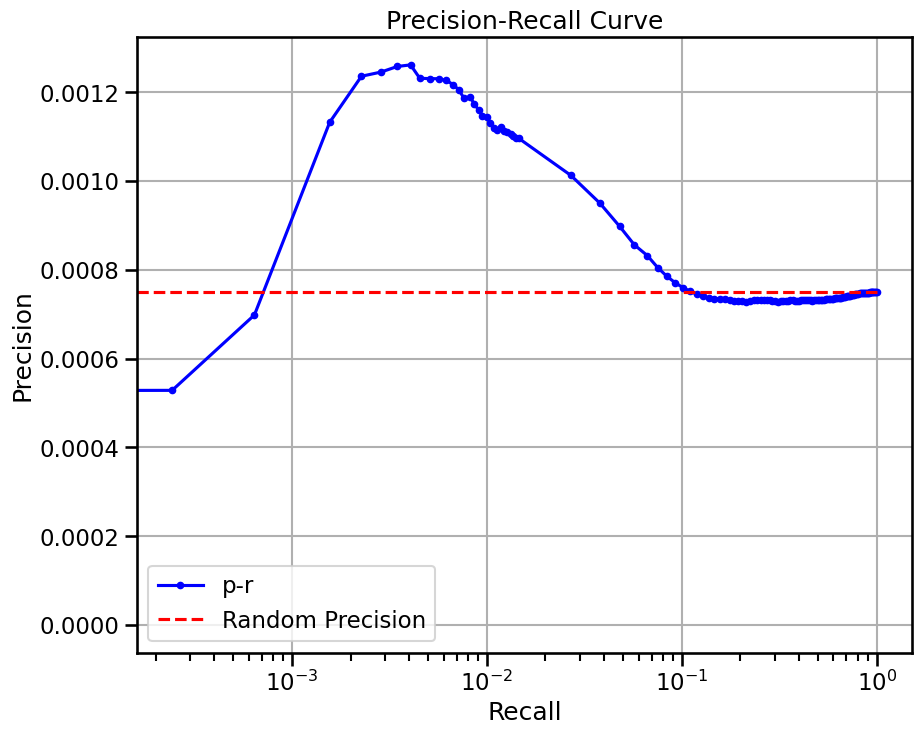

Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:419: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:165: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

base enrichment

Top central genes:

[]

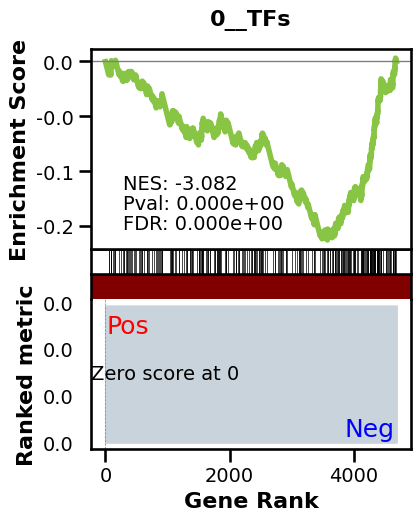

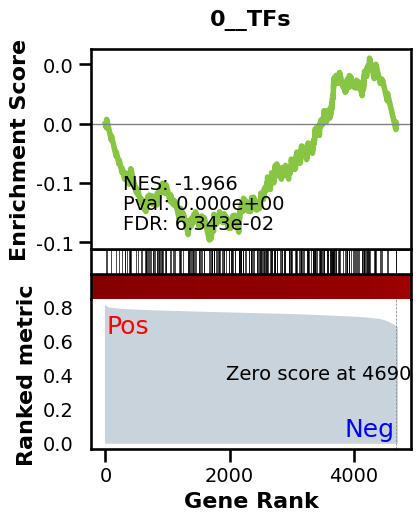

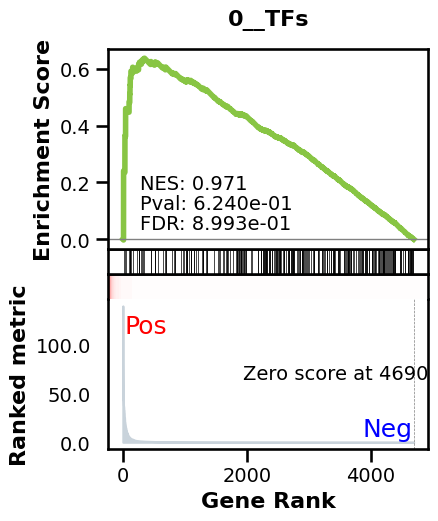

_________________________________________

TF specific enrichment

found some significant results for 

9.090909090909092

% TFs


_________________________________________

loading GT, 

omnipath

intersection of 3458 genes

intersection pct:

0.7371562566616926

precision: 

0.0009839632225556551


recall: 

1.0


random precision:

0.000984247851778263


  0%|                                                                      | 0/128 [00:00<?, ?it/s]


  4%|██▍                                                           | 5/128 [00:00<00:02, 47.77it/s]


  9%|█████▏                                                       | 11/128 [00:00<00:02, 53.14it/s]


 13%|████████                                                     | 17/128 [00:00<00:02, 54.91it/s]


 18%|██████████▉                                                  | 23/128 [00:00<00:01, 55.66it/s]


 23%|█████████████▊                                               | 29/128 [00:00<00:01, 56.25it/s]


 27%|████████████████▋                                            | 35/128 [00:00<00:01, 56.55it/s]


 32%|███████████████████▌                                         | 41/128 [00:00<00:01, 56.80it/s]


 37%|██████████████████████▍                                      | 47/128 [00:00<00:01, 56.90it/s]


 41%|█████████████████████████▎                                   | 53/128 [00:00<00:01, 57.09it/s]


 46%|████████████████████████████                                 | 59/128 [00:01<00:01, 57.20it/s]


 51%|██████████████████████████████▉                              | 65/128 [00:01<00:01, 57.23it/s]


 55%|█████████████████████████████████▊                           | 71/128 [00:01<00:00, 57.30it/s]


 60%|████████████████████████████████████▋                        | 77/128 [00:01<00:00, 57.23it/s]


 65%|███████████████████████████████████████▌                     | 83/128 [00:01<00:00, 57.22it/s]


 70%|██████████████████████████████████████████▍                  | 89/128 [00:01<00:00, 57.10it/s]


 74%|█████████████████████████████████████████████▎               | 95/128 [00:01<00:00, 57.21it/s]


 79%|███████████████████████████████████████████████▎            | 101/128 [00:01<00:00, 57.31it/s]


 84%|██████████████████████████████████████████████████▏         | 107/128 [00:01<00:00, 57.38it/s]


 88%|████████████████████████████████████████████████████▉       | 113/128 [00:01<00:00, 57.31it/s]


 93%|███████████████████████████████████████████████████████▊    | 119/128 [00:02<00:00, 57.14it/s]


 98%|██████████████████████████████████████████████████████████▌ | 125/128 [00:02<00:00, 54.33it/s]

/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|████████████████████████████████████████████████████████████| 128/128 [00:02<00:00, 55.42it/s]

Area Under Precision-Recall Curve (AUPRC): 

0.001016733706473903

EPR:

1.0362843255254062

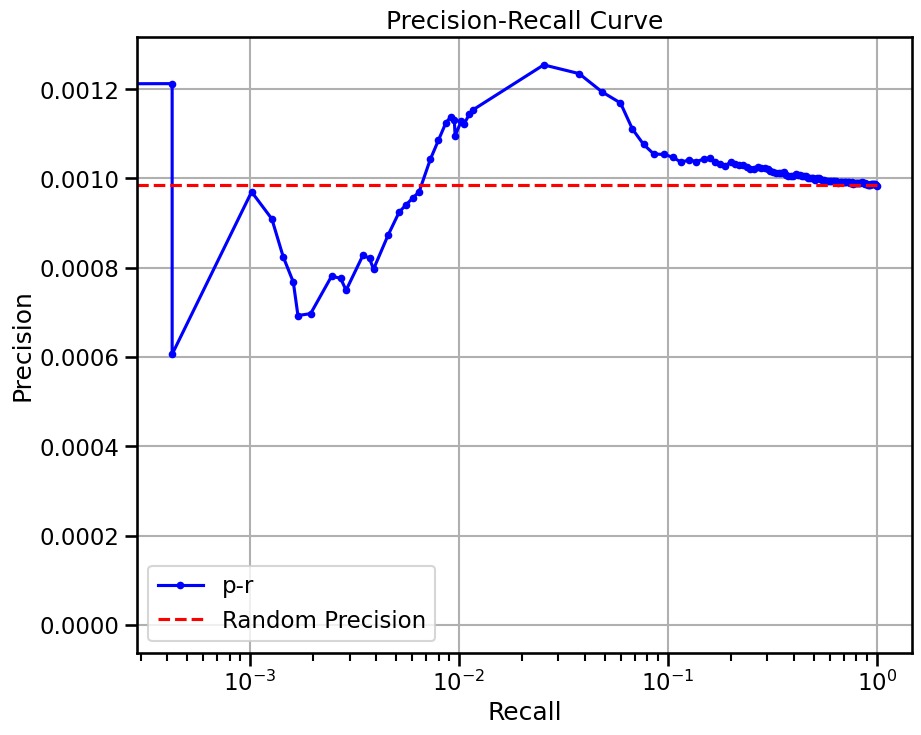

base enrichment

Top central genes:

[]

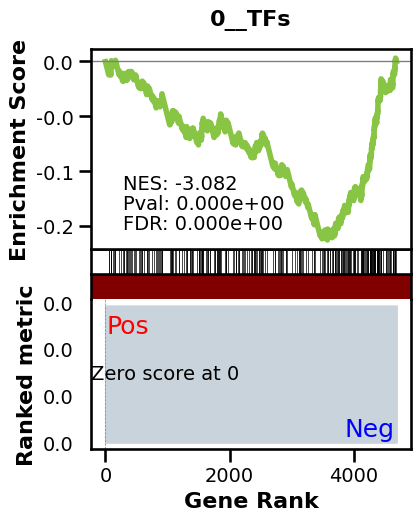

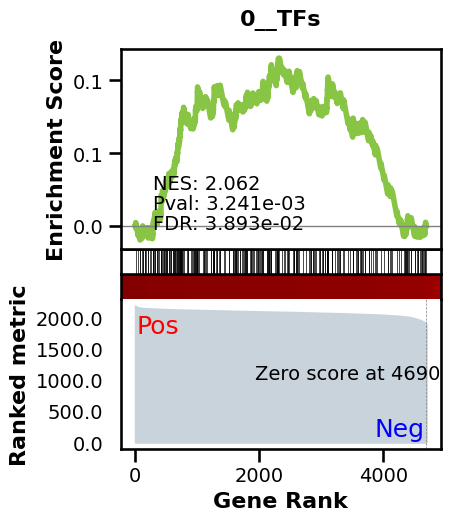

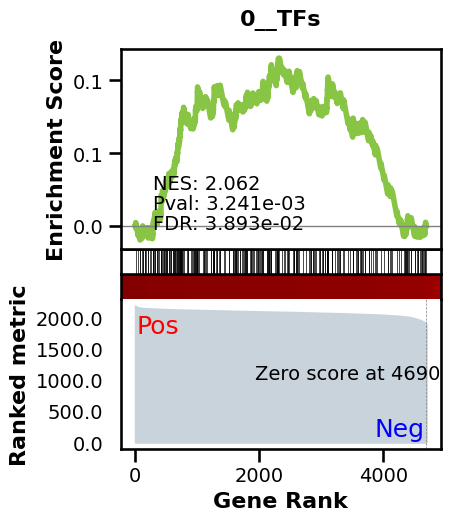

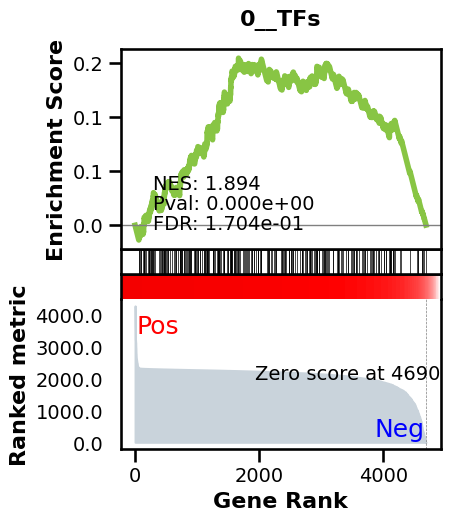

_________________________________________

TF specific enrichment

found some significant results for 

13.636363636363637

% TFs


_________________________________________

loading GT, 

omnipath

intersection of 3458 genes

intersection pct:

0.7371562566616926

precision: 

0.0009839632225556551


recall: 

1.0


random precision:

0.000984247851778263


  0%|                                                                      | 0/128 [00:00<?, ?it/s]


  2%|▉                                                             | 2/128 [00:00<00:06, 19.89it/s]


  5%|██▉                                                           | 6/128 [00:00<00:03, 30.97it/s]


  9%|█████▏                                                       | 11/128 [00:00<00:03, 38.60it/s]


 12%|███████▋                                                     | 16/128 [00:00<00:02, 42.05it/s]


 16%|██████████                                                   | 21/128 [00:00<00:02, 44.00it/s]


 20%|████████████▍                                                | 26/128 [00:00<00:02, 45.24it/s]


 24%|██████████████▊                                              | 31/128 [00:00<00:02, 45.87it/s]


 28%|█████████████████▏                                           | 36/128 [00:00<00:01, 46.39it/s]


 32%|███████████████████▌                                         | 41/128 [00:00<00:01, 46.55it/s]


 36%|█████████████████████▉                                       | 46/128 [00:01<00:01, 46.80it/s]


 40%|████████████████████████▎                                    | 51/128 [00:01<00:01, 46.84it/s]


 44%|██████████████████████████▋                                  | 56/128 [00:01<00:01, 37.92it/s]


 48%|█████████████████████████████                                | 61/128 [00:01<00:01, 40.20it/s]


 52%|███████████████████████████████▍                             | 66/128 [00:01<00:01, 42.01it/s]


 55%|█████████████████████████████████▊                           | 71/128 [00:01<00:01, 43.43it/s]


 59%|████████████████████████████████████▏                        | 76/128 [00:01<00:01, 44.52it/s]


 63%|██████████████████████████████████████▌                      | 81/128 [00:01<00:01, 45.29it/s]


 67%|████████████████████████████████████████▉                    | 86/128 [00:01<00:00, 45.85it/s]


 71%|███████████████████████████████████████████▎                 | 91/128 [00:02<00:00, 46.25it/s]


 75%|█████████████████████████████████████████████▊               | 96/128 [00:02<00:00, 46.54it/s]


 79%|███████████████████████████████████████████████▎            | 101/128 [00:02<00:00, 46.69it/s]


 83%|█████████████████████████████████████████████████▋          | 106/128 [00:02<00:00, 46.95it/s]


 87%|████████████████████████████████████████████████████        | 111/128 [00:02<00:00, 47.12it/s]


 91%|██████████████████████████████████████████████████████▍     | 116/128 [00:02<00:00, 47.21it/s]


 95%|████████████████████████████████████████████████████████▋   | 121/128 [00:02<00:00, 44.87it/s]


 98%|███████████████████████████████████████████████████████████ | 126/128 [00:02<00:00, 45.44it/s]

/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|████████████████████████████████████████████████████████████| 128/128 [00:02<00:00, 43.71it/s]

Area Under Precision-Recall Curve (AUPRC): 

0.001081096596130424

EPR:

1.4693198699692125

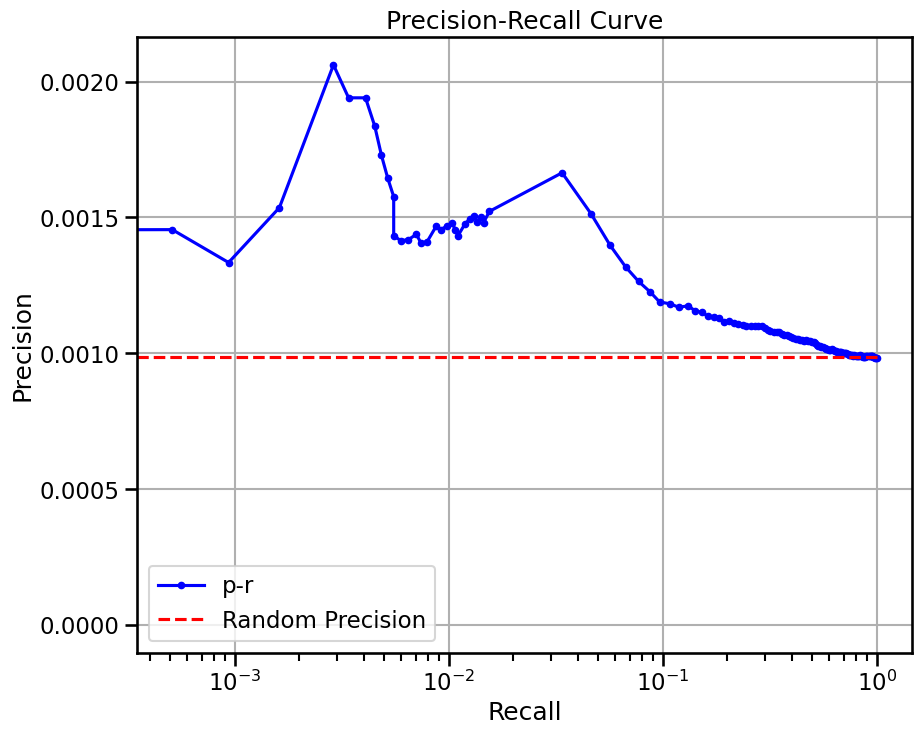

Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:165: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

avg link count: 483296256, sparsity: 1.0

base enrichment

too many genes for central computation

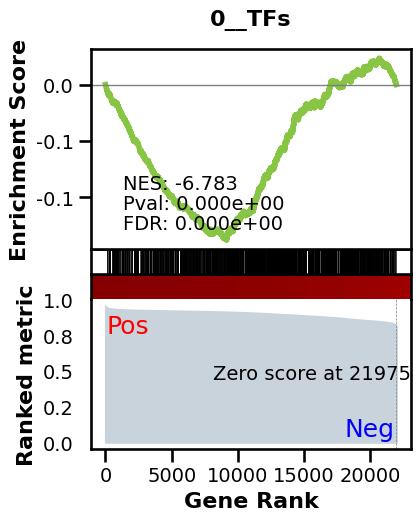

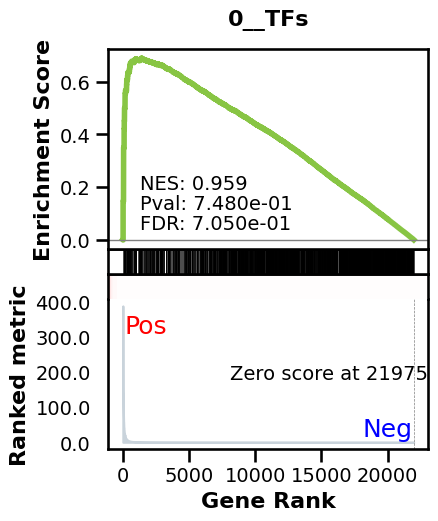

_________________________________________

TF specific enrichment

found some significant results for 

39.285714285714285

% TFs


_________________________________________

loading GT, 

omnipath

intersection of 12144 genes

intersection pct:

0.5526028394612305

precision: 

0.0006841571574106249


recall: 

1.0


random precision:

0.0006842066730187461


  0%|                                                                      | 0/128 [00:00<?, ?it/s]


  1%|▍                                                             | 1/128 [00:00<00:39,  3.19it/s]


  2%|▉                                                             | 2/128 [00:00<00:39,  3.18it/s]


  2%|█▍                                                            | 3/128 [00:00<00:39,  3.18it/s]


  3%|█▉                                                            | 4/128 [00:01<00:39,  3.18it/s]


  4%|██▍                                                           | 5/128 [00:01<00:38,  3.18it/s]


  5%|██▉                                                           | 6/128 [00:01<00:38,  3.18it/s]


  5%|███▍                                                          | 7/128 [00:02<00:38,  3.17it/s]


  6%|███▉                                                          | 8/128 [00:02<00:37,  3.18it/s]


  7%|████▎                                                         | 9/128 [00:02<00:37,  3.18it/s]


  8%|████▊                                                        | 10/128 [00:03<00:37,  3.18it/s]


  9%|█████▏                                                       | 11/128 [00:03<00:36,  3.18it/s]


  9%|█████▋                                                       | 12/128 [00:03<00:36,  3.18it/s]


 10%|██████▏                                                      | 13/128 [00:04<00:36,  3.18it/s]


 11%|██████▋                                                      | 14/128 [00:04<00:35,  3.18it/s]


 12%|███████▏                                                     | 15/128 [00:04<00:35,  3.18it/s]


 12%|███████▋                                                     | 16/128 [00:05<00:35,  3.18it/s]


 13%|████████                                                     | 17/128 [00:05<00:34,  3.18it/s]


 14%|████████▌                                                    | 18/128 [00:05<00:34,  3.18it/s]


 15%|█████████                                                    | 19/128 [00:05<00:34,  3.17it/s]


 16%|█████████▌                                                   | 20/128 [00:06<00:34,  3.16it/s]


 16%|██████████                                                   | 21/128 [00:06<00:33,  3.16it/s]


 17%|██████████▍                                                  | 22/128 [00:06<00:33,  3.17it/s]


 18%|██████████▉                                                  | 23/128 [00:07<00:33,  3.17it/s]


 19%|███████████▍                                                 | 24/128 [00:07<00:32,  3.17it/s]


 20%|███████████▉                                                 | 25/128 [00:07<00:32,  3.18it/s]


 20%|████████████▍                                                | 26/128 [00:08<00:32,  3.18it/s]


 21%|████████████▊                                                | 27/128 [00:08<00:31,  3.18it/s]


 22%|█████████████▎                                               | 28/128 [00:08<00:31,  3.18it/s]


 23%|█████████████▊                                               | 29/128 [00:09<00:31,  3.18it/s]


 23%|██████████████▎                                              | 30/128 [00:09<00:30,  3.17it/s]


 24%|██████████████▊                                              | 31/128 [00:09<00:30,  3.18it/s]


 25%|███████████████▎                                             | 32/128 [00:10<00:30,  3.18it/s]


 26%|███████████████▋                                             | 33/128 [00:10<00:29,  3.18it/s]


 27%|████████████████▏                                            | 34/128 [00:10<00:29,  3.17it/s]


 27%|████████████████▋                                            | 35/128 [00:11<00:29,  3.18it/s]


 28%|█████████████████▏                                           | 36/128 [00:11<00:28,  3.18it/s]


 29%|█████████████████▋                                           | 37/128 [00:11<00:28,  3.18it/s]


 30%|██████████████████                                           | 38/128 [00:11<00:28,  3.18it/s]


 30%|██████████████████▌                                          | 39/128 [00:12<00:28,  3.18it/s]


 31%|███████████████████                                          | 40/128 [00:12<00:27,  3.18it/s]


 32%|███████████████████▌                                         | 41/128 [00:12<00:27,  3.18it/s]


 33%|████████████████████                                         | 42/128 [00:13<00:27,  3.18it/s]


 34%|████████████████████▍                                        | 43/128 [00:13<00:26,  3.18it/s]


 34%|████████████████████▉                                        | 44/128 [00:13<00:26,  3.18it/s]


 35%|█████████████████████▍                                       | 45/128 [00:14<00:26,  3.17it/s]


 36%|█████████████████████▉                                       | 46/128 [00:14<00:25,  3.17it/s]


 37%|██████████████████████▍                                      | 47/128 [00:14<00:25,  3.16it/s]


 38%|██████████████████████▉                                      | 48/128 [00:15<00:25,  3.17it/s]


 38%|███████████████████████▎                                     | 49/128 [00:15<00:24,  3.17it/s]


 39%|███████████████████████▊                                     | 50/128 [00:15<00:24,  3.17it/s]


 40%|████████████████████████▎                                    | 51/128 [00:16<00:24,  3.18it/s]


 41%|████████████████████████▊                                    | 52/128 [00:16<00:23,  3.18it/s]


 41%|█████████████████████████▎                                   | 53/128 [00:16<00:23,  3.18it/s]


 42%|█████████████████████████▋                                   | 54/128 [00:17<00:23,  3.18it/s]


 43%|██████████████████████████▏                                  | 55/128 [00:17<00:23,  3.17it/s]


 44%|██████████████████████████▋                                  | 56/128 [00:17<00:22,  3.17it/s]


 45%|███████████████████████████▏                                 | 57/128 [00:17<00:22,  3.17it/s]


 45%|███████████████████████████▋                                 | 58/128 [00:18<00:22,  3.17it/s]


 46%|████████████████████████████                                 | 59/128 [00:18<00:21,  3.17it/s]


 47%|████████████████████████████▌                                | 60/128 [00:18<00:21,  3.17it/s]


 48%|█████████████████████████████                                | 61/128 [00:19<00:21,  3.17it/s]


 48%|█████████████████████████████▌                               | 62/128 [00:19<00:20,  3.17it/s]


 49%|██████████████████████████████                               | 63/128 [00:19<00:20,  3.17it/s]


 50%|██████████████████████████████▌                              | 64/128 [00:20<00:20,  3.17it/s]


 51%|██████████████████████████████▉                              | 65/128 [00:20<00:19,  3.17it/s]


 52%|███████████████████████████████▍                             | 66/128 [00:20<00:19,  3.18it/s]


 52%|███████████████████████████████▉                             | 67/128 [00:21<00:19,  3.18it/s]


 53%|████████████████████████████████▍                            | 68/128 [00:21<00:18,  3.17it/s]


 54%|████████████████████████████████▉                            | 69/128 [00:21<00:18,  3.17it/s]


 55%|█████████████████████████████████▎                           | 70/128 [00:22<00:18,  3.18it/s]


 55%|█████████████████████████████████▊                           | 71/128 [00:22<00:17,  3.18it/s]


 56%|██████████████████████████████████▎                          | 72/128 [00:22<00:17,  3.18it/s]


 57%|██████████████████████████████████▊                          | 73/128 [00:22<00:17,  3.17it/s]


 58%|███████████████████████████████████▎                         | 74/128 [00:23<00:17,  3.17it/s]


 59%|███████████████████████████████████▋                         | 75/128 [00:23<00:16,  3.17it/s]


 59%|████████████████████████████████████▏                        | 76/128 [00:23<00:16,  3.17it/s]


 60%|████████████████████████████████████▋                        | 77/128 [00:24<00:16,  3.17it/s]


 61%|█████████████████████████████████████▏                       | 78/128 [00:24<00:15,  3.17it/s]


 62%|█████████████████████████████████████▋                       | 79/128 [00:24<00:15,  3.18it/s]


 62%|██████████████████████████████████████▏                      | 80/128 [00:25<00:15,  3.18it/s]


 63%|██████████████████████████████████████▌                      | 81/128 [00:25<00:14,  3.17it/s]


 64%|███████████████████████████████████████                      | 82/128 [00:25<00:14,  3.17it/s]


 65%|███████████████████████████████████████▌                     | 83/128 [00:26<00:14,  3.18it/s]


 66%|████████████████████████████████████████                     | 84/128 [00:26<00:13,  3.17it/s]


 66%|████████████████████████████████████████▌                    | 85/128 [00:26<00:13,  3.17it/s]


 67%|████████████████████████████████████████▉                    | 86/128 [00:27<00:13,  3.17it/s]


 68%|█████████████████████████████████████████▍                   | 87/128 [00:27<00:12,  3.17it/s]


 69%|█████████████████████████████████████████▉                   | 88/128 [00:27<00:12,  3.17it/s]


 70%|██████████████████████████████████████████▍                  | 89/128 [00:28<00:12,  3.17it/s]


 70%|██████████████████████████████████████████▉                  | 90/128 [00:28<00:11,  3.17it/s]


 71%|███████████████████████████████████████████▎                 | 91/128 [00:28<00:11,  3.17it/s]


 72%|███████████████████████████████████████████▊                 | 92/128 [00:28<00:11,  3.17it/s]


 73%|████████████████████████████████████████████▎                | 93/128 [00:29<00:11,  3.17it/s]


 73%|████████████████████████████████████████████▊                | 94/128 [00:29<00:10,  3.17it/s]


 74%|█████████████████████████████████████████████▎               | 95/128 [00:29<00:10,  3.17it/s]


 75%|█████████████████████████████████████████████▊               | 96/128 [00:30<00:10,  3.17it/s]


 76%|██████████████████████████████████████████████▏              | 97/128 [00:30<00:09,  3.17it/s]


 77%|██████████████████████████████████████████████▋              | 98/128 [00:30<00:09,  3.18it/s]


 77%|███████████████████████████████████████████████▏             | 99/128 [00:31<00:09,  3.18it/s]


 78%|██████████████████████████████████████████████▉             | 100/128 [00:31<00:08,  3.17it/s]


 79%|███████████████████████████████████████████████▎            | 101/128 [00:31<00:08,  3.17it/s]


 80%|███████████████████████████████████████████████▊            | 102/128 [00:32<00:08,  3.18it/s]


 80%|████████████████████████████████████████████████▎           | 103/128 [00:32<00:07,  3.18it/s]


 81%|████████████████████████████████████████████████▊           | 104/128 [00:32<00:07,  3.18it/s]


 82%|█████████████████████████████████████████████████▏          | 105/128 [00:33<00:07,  3.18it/s]


 83%|█████████████████████████████████████████████████▋          | 106/128 [00:33<00:06,  3.18it/s]


 84%|██████████████████████████████████████████████████▏         | 107/128 [00:33<00:06,  3.18it/s]


 84%|██████████████████████████████████████████████████▋         | 108/128 [00:34<00:06,  3.18it/s]


 85%|███████████████████████████████████████████████████         | 109/128 [00:34<00:05,  3.17it/s]


 86%|███████████████████████████████████████████████████▌        | 110/128 [00:34<00:05,  3.18it/s]


 87%|████████████████████████████████████████████████████        | 111/128 [00:34<00:05,  3.18it/s]


 88%|████████████████████████████████████████████████████▌       | 112/128 [00:35<00:05,  3.17it/s]


 88%|████████████████████████████████████████████████████▉       | 113/128 [00:35<00:04,  3.17it/s]


 89%|█████████████████████████████████████████████████████▍      | 114/128 [00:35<00:04,  3.18it/s]


 90%|█████████████████████████████████████████████████████▉      | 115/128 [00:36<00:04,  3.18it/s]


 91%|██████████████████████████████████████████████████████▍     | 116/128 [00:36<00:03,  3.18it/s]


 91%|██████████████████████████████████████████████████████▊     | 117/128 [00:36<00:03,  3.18it/s]


 92%|███████████████████████████████████████████████████████▎    | 118/128 [00:37<00:03,  3.18it/s]


 93%|███████████████████████████████████████████████████████▊    | 119/128 [00:37<00:02,  3.18it/s]


 94%|████████████████████████████████████████████████████████▎   | 120/128 [00:37<00:02,  3.18it/s]


 95%|████████████████████████████████████████████████████████▋   | 121/128 [00:38<00:02,  3.18it/s]


 95%|█████████████████████████████████████████████████████████▏  | 122/128 [00:38<00:01,  3.18it/s]


 96%|█████████████████████████████████████████████████████████▋  | 123/128 [00:38<00:01,  3.18it/s]


 97%|██████████████████████████████████████████████████████████▏ | 124/128 [00:39<00:01,  3.18it/s]


 98%|██████████████████████████████████████████████████████████▌ | 125/128 [00:39<00:00,  3.18it/s]


 98%|███████████████████████████████████████████████████████████ | 126/128 [00:39<00:00,  3.17it/s]


 99%|███████████████████████████████████████████████████████████▌| 127/128 [00:40<00:00,  3.18it/s]

/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|████████████████████████████████████████████████████████████| 128/128 [00:40<00:00,  3.17it/s]


100%|████████████████████████████████████████████████████████████| 128/128 [00:40<00:00,  3.17it/s]

Area Under Precision-Recall Curve (AUPRC): 

0.0006878196066704968

EPR:

1.2647425358283113

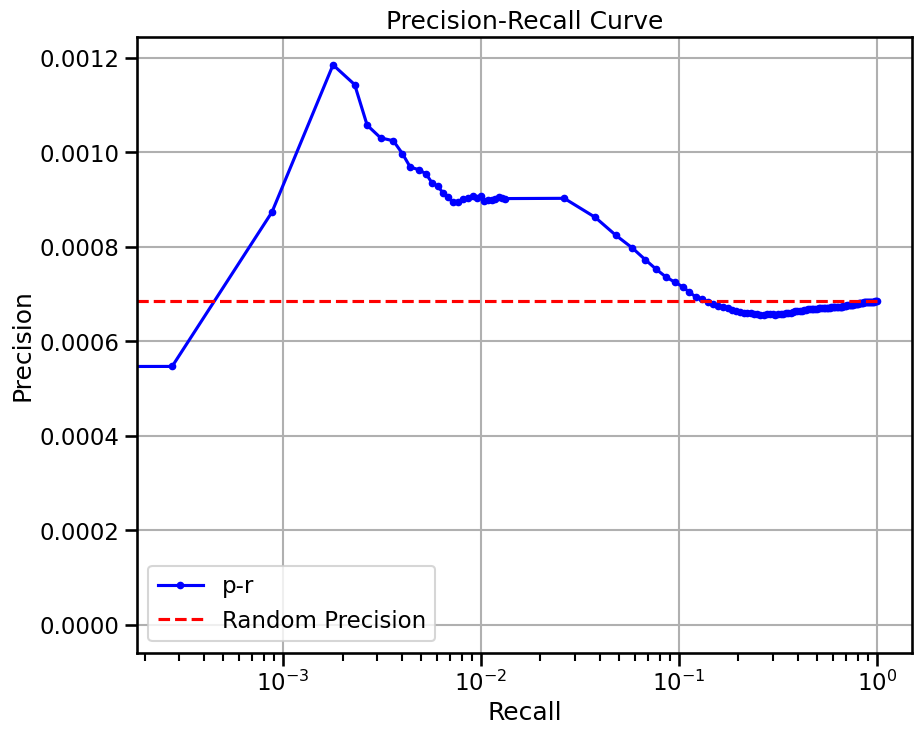

Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:165: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

base enrichment

Top central genes:

[]

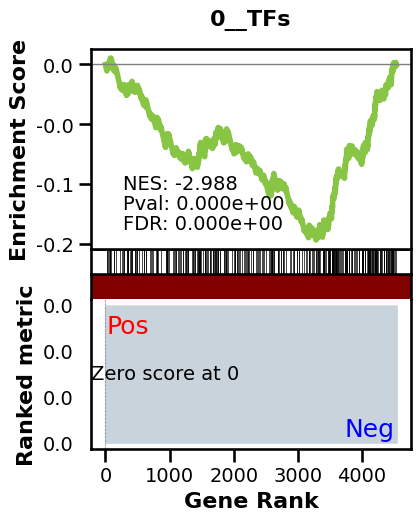

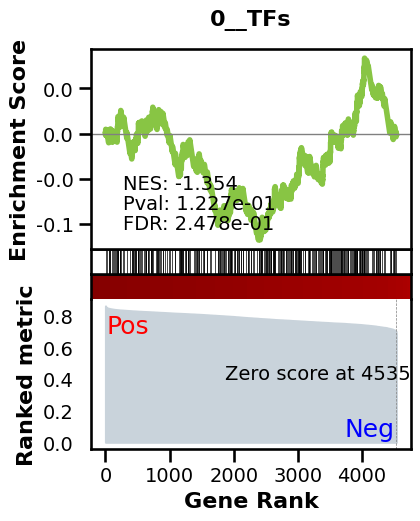

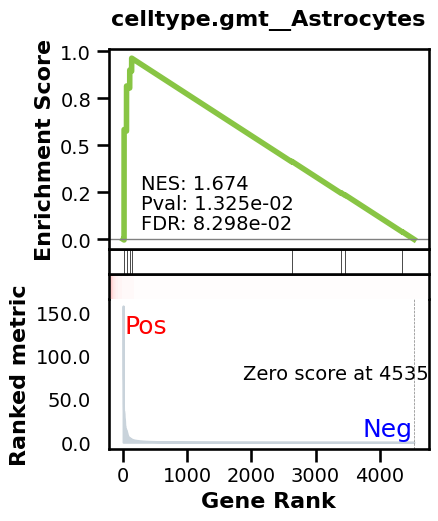

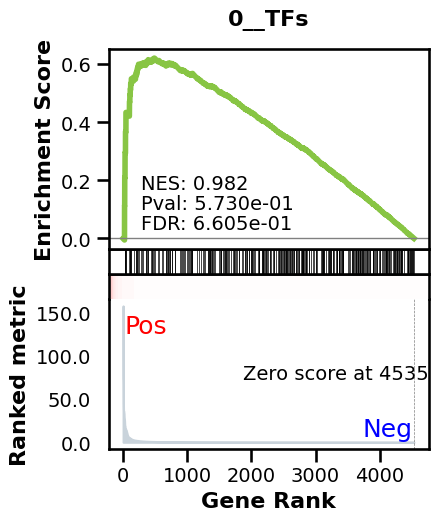

_________________________________________

TF specific enrichment

found some significant results for 

14.285714285714286

% TFs


_________________________________________

loading GT, 

omnipath

intersection of 3325 genes

intersection pct:

0.7330246913580247

precision: 

0.0015084628865396574


recall: 

1.0


random precision:

0.0015089166960723108


  0%|                                                                      | 0/128 [00:00<?, ?it/s]


  2%|█▍                                                            | 3/128 [00:00<00:05, 23.43it/s]


  5%|██▉                                                           | 6/128 [00:00<00:05, 24.26it/s]


  9%|█████▋                                                       | 12/128 [00:00<00:03, 36.87it/s]


 15%|█████████                                                    | 19/128 [00:00<00:02, 46.15it/s]


 20%|███████████▉                                                 | 25/128 [00:00<00:02, 50.61it/s]


 25%|███████████████▎                                             | 32/128 [00:00<00:01, 54.15it/s]


 30%|██████████████████                                           | 38/128 [00:00<00:01, 55.88it/s]


 34%|████████████████████▉                                        | 44/128 [00:00<00:01, 57.02it/s]


 40%|████████████████████████▎                                    | 51/128 [00:01<00:01, 58.16it/s]


 45%|███████████████████████████▋                                 | 58/128 [00:01<00:01, 58.92it/s]


 51%|██████████████████████████████▉                              | 65/128 [00:01<00:01, 59.46it/s]


 56%|██████████████████████████████████▎                          | 72/128 [00:01<00:00, 59.83it/s]


 62%|█████████████████████████████████████▋                       | 79/128 [00:01<00:00, 60.10it/s]


 67%|████████████████████████████████████████▉                    | 86/128 [00:01<00:00, 60.19it/s]


 73%|████████████████████████████████████████████▎                | 93/128 [00:01<00:00, 60.33it/s]


 78%|██████████████████████████████████████████████▉             | 100/128 [00:01<00:00, 60.53it/s]


 84%|██████████████████████████████████████████████████▏         | 107/128 [00:01<00:00, 60.42it/s]


 89%|█████████████████████████████████████████████████████▍      | 114/128 [00:02<00:00, 60.32it/s]


 95%|████████████████████████████████████████████████████████▋   | 121/128 [00:02<00:00, 60.29it/s]

/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|████████████████████████████████████████████████████████████| 128/128 [00:02<00:00, 57.68it/s]


100%|████████████████████████████████████████████████████████████| 128/128 [00:02<00:00, 55.63it/s]

Area Under Precision-Recall Curve (AUPRC): 

0.0016054452497772356

EPR:

2.2336544602579878

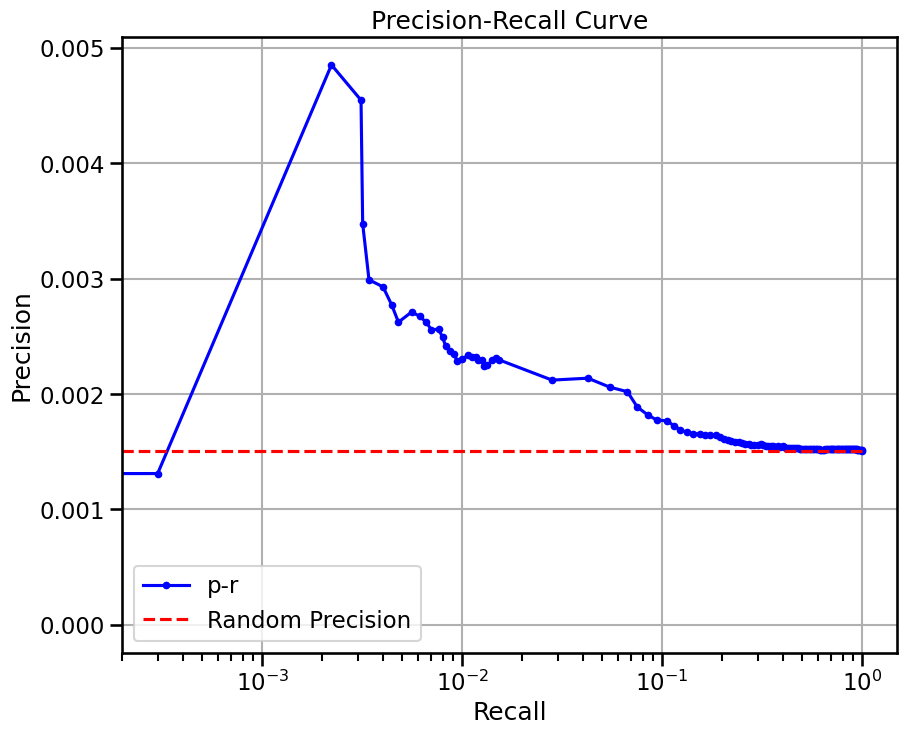

base enrichment

Top central genes:

[]

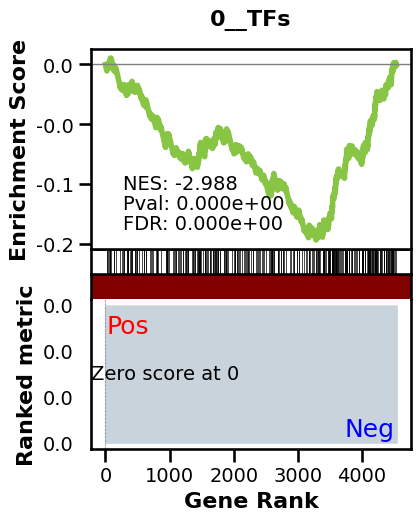

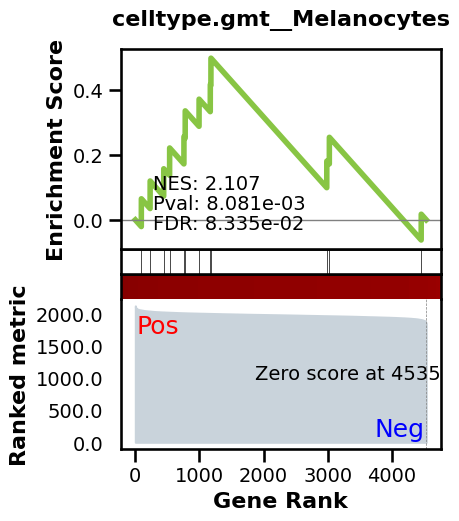

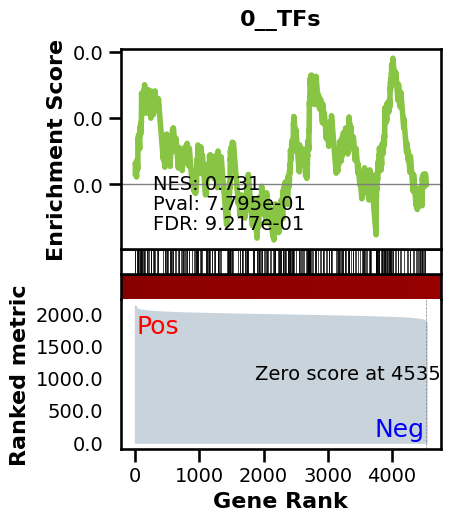

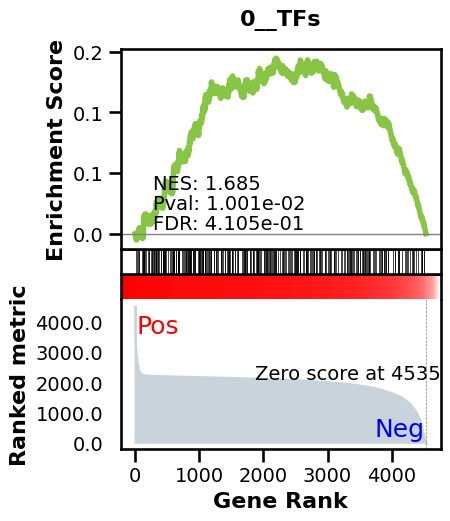

_________________________________________

TF specific enrichment

found some significant results for 

8.16326530612245

% TFs


_________________________________________

loading GT, 

omnipath

intersection of 3325 genes

intersection pct:

0.7330246913580247

precision: 

0.0015084628865396574


recall: 

1.0


random precision:

0.0015089166960723108


  0%|                                                                      | 0/128 [00:00<?, ?it/s]


  2%|█▍                                                            | 3/128 [00:00<00:05, 24.37it/s]


  6%|███▉                                                          | 8/128 [00:00<00:03, 37.12it/s]


 11%|██████▋                                                      | 14/128 [00:00<00:02, 43.68it/s]


 16%|█████████▌                                                   | 20/128 [00:00<00:02, 46.63it/s]


 20%|████████████▍                                                | 26/128 [00:00<00:02, 48.35it/s]


 25%|███████████████▎                                             | 32/128 [00:00<00:01, 49.44it/s]


 30%|██████████████████                                           | 38/128 [00:00<00:01, 50.00it/s]


 34%|████████████████████▉                                        | 44/128 [00:00<00:01, 50.33it/s]


 39%|███████████████████████▊                                     | 50/128 [00:01<00:01, 50.70it/s]


 44%|██████████████████████████▋                                  | 56/128 [00:01<00:01, 50.98it/s]


 48%|█████████████████████████████▌                               | 62/128 [00:01<00:01, 51.06it/s]


 53%|████████████████████████████████▍                            | 68/128 [00:01<00:01, 51.25it/s]


 58%|███████████████████████████████████▎                         | 74/128 [00:01<00:01, 51.26it/s]


 62%|██████████████████████████████████████▏                      | 80/128 [00:01<00:00, 51.20it/s]


 67%|████████████████████████████████████████▉                    | 86/128 [00:01<00:00, 51.17it/s]


 72%|███████████████████████████████████████████▊                 | 92/128 [00:01<00:00, 49.45it/s]


 77%|██████████████████████████████████████████████▋              | 98/128 [00:01<00:00, 49.95it/s]


 81%|████████████████████████████████████████████████▊           | 104/128 [00:02<00:00, 50.34it/s]


 86%|███████████████████████████████████████████████████▌        | 110/128 [00:02<00:00, 50.64it/s]


 91%|██████████████████████████████████████████████████████▍     | 116/128 [00:02<00:00, 50.72it/s]


 95%|█████████████████████████████████████████████████████████▏  | 122/128 [00:02<00:00, 50.89it/s]

/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|████████████████████████████████████████████████████████████| 128/128 [00:02<00:00, 50.78it/s]


100%|████████████████████████████████████████████████████████████| 128/128 [00:02<00:00, 49.48it/s]

Area Under Precision-Recall Curve (AUPRC): 

0.0016343776619595768

EPR:

1.0333175030664192

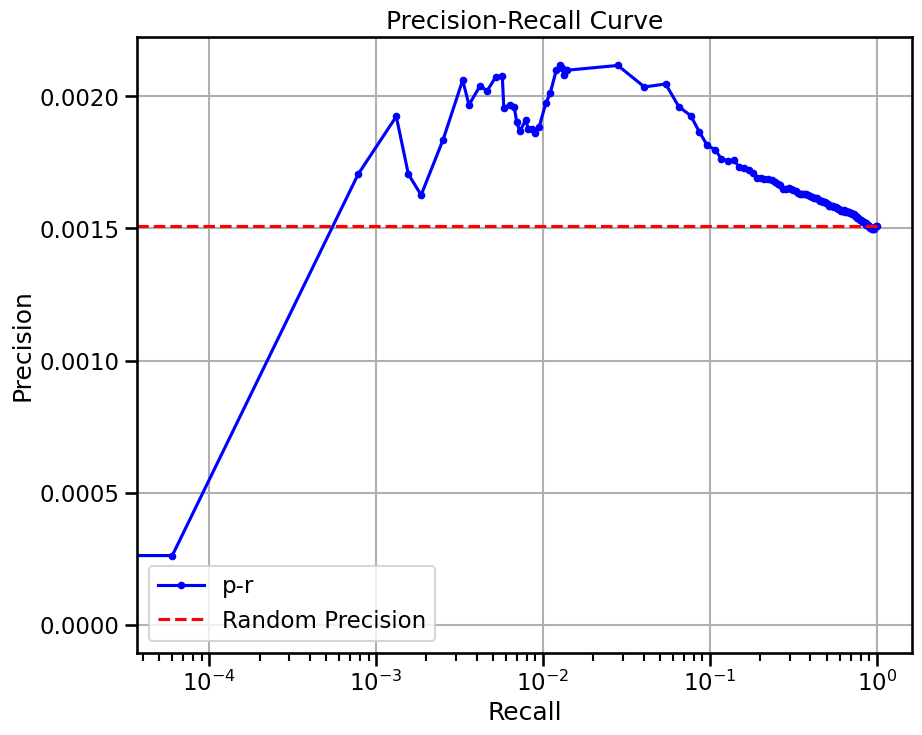

Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:165: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

avg link count: 513520921, sparsity: 1.0

base enrichment

too many genes for central computation

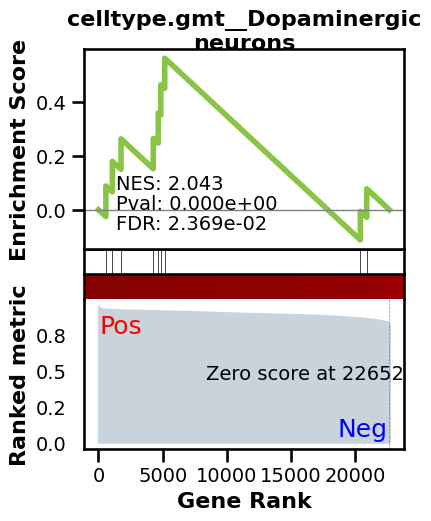

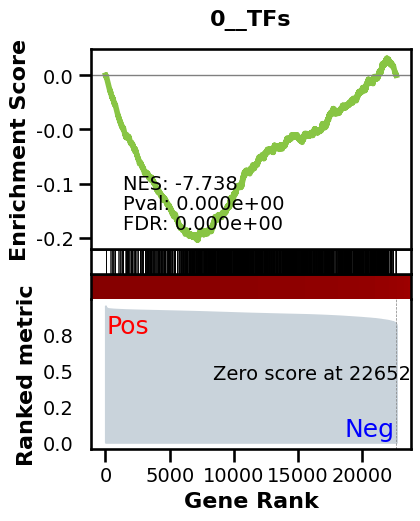

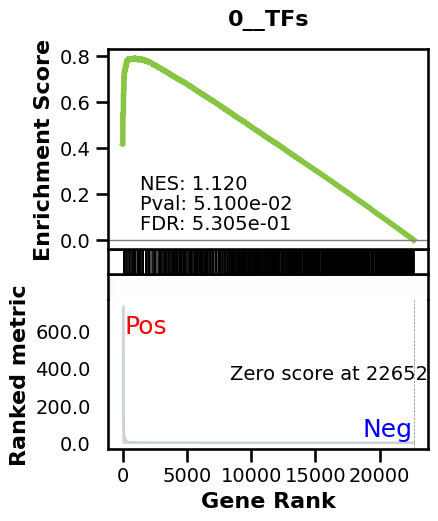

_________________________________________

TF specific enrichment

found some significant results for 

31.25

% TFs


_________________________________________

loading GT, 

omnipath

intersection of 12336 genes

intersection pct:

0.5445636339557675

precision: 

0.0006722658985674321


recall: 

1.0


random precision:

0.0006723132712612921


  0%|                                                                      | 0/128 [00:00<?, ?it/s]


  1%|▍                                                             | 1/128 [00:00<00:41,  3.06it/s]


  2%|▉                                                             | 2/128 [00:00<00:41,  3.05it/s]


  2%|█▍                                                            | 3/128 [00:00<00:40,  3.05it/s]


  3%|█▉                                                            | 4/128 [00:01<00:40,  3.05it/s]


  4%|██▍                                                           | 5/128 [00:01<00:40,  3.05it/s]


  5%|██▉                                                           | 6/128 [00:01<00:39,  3.05it/s]


  5%|███▍                                                          | 7/128 [00:02<00:39,  3.05it/s]


  6%|███▉                                                          | 8/128 [00:02<00:39,  3.05it/s]


  7%|████▎                                                         | 9/128 [00:02<00:39,  3.05it/s]


  8%|████▊                                                        | 10/128 [00:03<00:38,  3.05it/s]


  9%|█████▏                                                       | 11/128 [00:03<00:38,  3.05it/s]


  9%|█████▋                                                       | 12/128 [00:03<00:38,  3.05it/s]


 10%|██████▏                                                      | 13/128 [00:04<00:37,  3.05it/s]


 11%|██████▋                                                      | 14/128 [00:04<00:37,  3.05it/s]


 12%|███████▏                                                     | 15/128 [00:04<00:37,  3.05it/s]


 12%|███████▋                                                     | 16/128 [00:05<00:36,  3.05it/s]


 13%|████████                                                     | 17/128 [00:05<00:36,  3.05it/s]


 14%|████████▌                                                    | 18/128 [00:05<00:36,  3.05it/s]


 15%|█████████                                                    | 19/128 [00:06<00:35,  3.05it/s]


 16%|█████████▌                                                   | 20/128 [00:06<00:35,  3.05it/s]


 16%|██████████                                                   | 21/128 [00:06<00:35,  3.05it/s]


 17%|██████████▍                                                  | 22/128 [00:07<00:34,  3.05it/s]


 18%|██████████▉                                                  | 23/128 [00:07<00:34,  3.05it/s]


 19%|███████████▍                                                 | 24/128 [00:07<00:34,  3.05it/s]


 20%|███████████▉                                                 | 25/128 [00:08<00:33,  3.05it/s]


 20%|████████████▍                                                | 26/128 [00:08<00:33,  3.05it/s]


 21%|████████████▊                                                | 27/128 [00:08<00:33,  3.05it/s]


 22%|█████████████▎                                               | 28/128 [00:09<00:32,  3.05it/s]


 23%|█████████████▊                                               | 29/128 [00:09<00:32,  3.05it/s]


 23%|██████████████▎                                              | 30/128 [00:09<00:32,  3.05it/s]


 24%|██████████████▊                                              | 31/128 [00:10<00:31,  3.05it/s]


 25%|███████████████▎                                             | 32/128 [00:10<00:31,  3.05it/s]


 26%|███████████████▋                                             | 33/128 [00:10<00:31,  3.05it/s]


 27%|████████████████▏                                            | 34/128 [00:11<00:30,  3.05it/s]


 27%|████████████████▋                                            | 35/128 [00:11<00:30,  3.05it/s]


 28%|█████████████████▏                                           | 36/128 [00:11<00:30,  3.05it/s]


 29%|█████████████████▋                                           | 37/128 [00:12<00:29,  3.05it/s]


 30%|██████████████████                                           | 38/128 [00:12<00:29,  3.05it/s]


 30%|██████████████████▌                                          | 39/128 [00:12<00:29,  3.05it/s]


 31%|███████████████████                                          | 40/128 [00:13<00:28,  3.05it/s]


 32%|███████████████████▌                                         | 41/128 [00:13<00:28,  3.05it/s]


 33%|████████████████████                                         | 42/128 [00:13<00:28,  3.05it/s]


 34%|████████████████████▍                                        | 43/128 [00:14<00:27,  3.05it/s]


 34%|████████████████████▉                                        | 44/128 [00:14<00:27,  3.05it/s]


 35%|█████████████████████▍                                       | 45/128 [00:14<00:27,  3.03it/s]


 36%|█████████████████████▉                                       | 46/128 [00:15<00:27,  3.04it/s]


 37%|██████████████████████▍                                      | 47/128 [00:15<00:26,  3.04it/s]


 38%|██████████████████████▉                                      | 48/128 [00:15<00:26,  3.04it/s]


 38%|███████████████████████▎                                     | 49/128 [00:16<00:25,  3.04it/s]


 39%|███████████████████████▊                                     | 50/128 [00:16<00:25,  3.05it/s]


 40%|████████████████████████▎                                    | 51/128 [00:16<00:25,  3.05it/s]


 41%|████████████████████████▊                                    | 52/128 [00:17<00:24,  3.05it/s]


 41%|█████████████████████████▎                                   | 53/128 [00:17<00:24,  3.05it/s]


 42%|█████████████████████████▋                                   | 54/128 [00:17<00:24,  3.05it/s]


 43%|██████████████████████████▏                                  | 55/128 [00:18<00:24,  3.04it/s]


 44%|██████████████████████████▋                                  | 56/128 [00:18<00:23,  3.05it/s]


 45%|███████████████████████████▏                                 | 57/128 [00:18<00:23,  3.05it/s]


 45%|███████████████████████████▋                                 | 58/128 [00:19<00:22,  3.05it/s]


 46%|████████████████████████████                                 | 59/128 [00:19<00:22,  3.05it/s]


 47%|████████████████████████████▌                                | 60/128 [00:19<00:22,  3.05it/s]


 48%|█████████████████████████████                                | 61/128 [00:20<00:21,  3.05it/s]


 48%|█████████████████████████████▌                               | 62/128 [00:20<00:21,  3.05it/s]


 49%|██████████████████████████████                               | 63/128 [00:20<00:21,  3.05it/s]


 50%|██████████████████████████████▌                              | 64/128 [00:20<00:20,  3.05it/s]


 51%|██████████████████████████████▉                              | 65/128 [00:21<00:20,  3.05it/s]


 52%|███████████████████████████████▍                             | 66/128 [00:21<00:20,  3.05it/s]


 52%|███████████████████████████████▉                             | 67/128 [00:21<00:19,  3.05it/s]


 53%|████████████████████████████████▍                            | 68/128 [00:22<00:19,  3.05it/s]


 54%|████████████████████████████████▉                            | 69/128 [00:22<00:19,  3.05it/s]


 55%|█████████████████████████████████▎                           | 70/128 [00:22<00:19,  3.05it/s]


 55%|█████████████████████████████████▊                           | 71/128 [00:23<00:18,  3.05it/s]


 56%|██████████████████████████████████▎                          | 72/128 [00:23<00:18,  3.05it/s]


 57%|██████████████████████████████████▊                          | 73/128 [00:23<00:18,  3.05it/s]


 58%|███████████████████████████████████▎                         | 74/128 [00:24<00:17,  3.05it/s]


 59%|███████████████████████████████████▋                         | 75/128 [00:24<00:17,  3.05it/s]


 59%|████████████████████████████████████▏                        | 76/128 [00:24<00:17,  3.05it/s]


 60%|████████████████████████████████████▋                        | 77/128 [00:25<00:16,  3.05it/s]


 61%|█████████████████████████████████████▏                       | 78/128 [00:25<00:16,  3.05it/s]


 62%|█████████████████████████████████████▋                       | 79/128 [00:25<00:16,  3.05it/s]


 62%|██████████████████████████████████████▏                      | 80/128 [00:26<00:15,  3.05it/s]


 63%|██████████████████████████████████████▌                      | 81/128 [00:26<00:15,  3.05it/s]


 64%|███████████████████████████████████████                      | 82/128 [00:26<00:15,  3.05it/s]


 65%|███████████████████████████████████████▌                     | 83/128 [00:27<00:14,  3.05it/s]


 66%|████████████████████████████████████████                     | 84/128 [00:27<00:14,  3.05it/s]


 66%|████████████████████████████████████████▌                    | 85/128 [00:27<00:14,  3.05it/s]


 67%|████████████████████████████████████████▉                    | 86/128 [00:28<00:13,  3.05it/s]


 68%|█████████████████████████████████████████▍                   | 87/128 [00:28<00:13,  3.04it/s]


 69%|█████████████████████████████████████████▉                   | 88/128 [00:28<00:13,  3.04it/s]


 70%|██████████████████████████████████████████▍                  | 89/128 [00:29<00:12,  3.05it/s]


 70%|██████████████████████████████████████████▉                  | 90/128 [00:29<00:12,  3.05it/s]


 71%|███████████████████████████████████████████▎                 | 91/128 [00:29<00:12,  3.05it/s]


 72%|███████████████████████████████████████████▊                 | 92/128 [00:30<00:11,  3.04it/s]


 73%|████████████████████████████████████████████▎                | 93/128 [00:30<00:11,  3.04it/s]


 73%|████████████████████████████████████████████▊                | 94/128 [00:30<00:11,  3.05it/s]


 74%|█████████████████████████████████████████████▎               | 95/128 [00:31<00:10,  3.05it/s]


 75%|█████████████████████████████████████████████▊               | 96/128 [00:31<00:10,  3.04it/s]


 76%|██████████████████████████████████████████████▏              | 97/128 [00:31<00:10,  3.04it/s]


 77%|██████████████████████████████████████████████▋              | 98/128 [00:32<00:09,  3.04it/s]


 77%|███████████████████████████████████████████████▏             | 99/128 [00:32<00:09,  3.05it/s]


 78%|██████████████████████████████████████████████▉             | 100/128 [00:32<00:09,  3.05it/s]


 79%|███████████████████████████████████████████████▎            | 101/128 [00:33<00:08,  3.05it/s]


 80%|███████████████████████████████████████████████▊            | 102/128 [00:33<00:08,  3.05it/s]


 80%|████████████████████████████████████████████████▎           | 103/128 [00:33<00:08,  3.06it/s]


 81%|████████████████████████████████████████████████▊           | 104/128 [00:34<00:07,  3.05it/s]


 82%|█████████████████████████████████████████████████▏          | 105/128 [00:34<00:07,  3.05it/s]


 83%|█████████████████████████████████████████████████▋          | 106/128 [00:34<00:07,  3.06it/s]


 84%|██████████████████████████████████████████████████▏         | 107/128 [00:35<00:06,  3.06it/s]


 84%|██████████████████████████████████████████████████▋         | 108/128 [00:35<00:06,  3.06it/s]


 85%|███████████████████████████████████████████████████         | 109/128 [00:35<00:06,  3.06it/s]


 86%|███████████████████████████████████████████████████▌        | 110/128 [00:36<00:05,  3.05it/s]


 87%|████████████████████████████████████████████████████        | 111/128 [00:36<00:05,  3.05it/s]


 88%|████████████████████████████████████████████████████▌       | 112/128 [00:36<00:05,  3.05it/s]


 88%|████████████████████████████████████████████████████▉       | 113/128 [00:37<00:04,  3.05it/s]


 89%|█████████████████████████████████████████████████████▍      | 114/128 [00:37<00:04,  3.05it/s]


 90%|█████████████████████████████████████████████████████▉      | 115/128 [00:37<00:04,  3.05it/s]


 91%|██████████████████████████████████████████████████████▍     | 116/128 [00:38<00:03,  3.05it/s]


 91%|██████████████████████████████████████████████████████▊     | 117/128 [00:38<00:03,  3.05it/s]


 92%|███████████████████████████████████████████████████████▎    | 118/128 [00:38<00:03,  3.00it/s]


 93%|███████████████████████████████████████████████████████▊    | 119/128 [00:39<00:02,  3.01it/s]


 94%|████████████████████████████████████████████████████████▎   | 120/128 [00:39<00:02,  3.02it/s]


 95%|████████████████████████████████████████████████████████▋   | 121/128 [00:39<00:02,  3.03it/s]


 95%|█████████████████████████████████████████████████████████▏  | 122/128 [00:40<00:01,  3.02it/s]


 96%|█████████████████████████████████████████████████████████▋  | 123/128 [00:40<00:01,  3.03it/s]


 97%|██████████████████████████████████████████████████████████▏ | 124/128 [00:40<00:01,  3.04it/s]


 98%|██████████████████████████████████████████████████████████▌ | 125/128 [00:41<00:00,  3.04it/s]


 98%|███████████████████████████████████████████████████████████ | 126/128 [00:41<00:00,  3.05it/s]


 99%|███████████████████████████████████████████████████████████▌| 127/128 [00:41<00:00,  3.05it/s]

/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|████████████████████████████████████████████████████████████| 128/128 [00:41<00:00,  3.05it/s]


100%|████████████████████████████████████████████████████████████| 128/128 [00:42<00:00,  3.05it/s]

Area Under Precision-Recall Curve (AUPRC): 

0.0006881442518524149

EPR:

1.9799034203808874

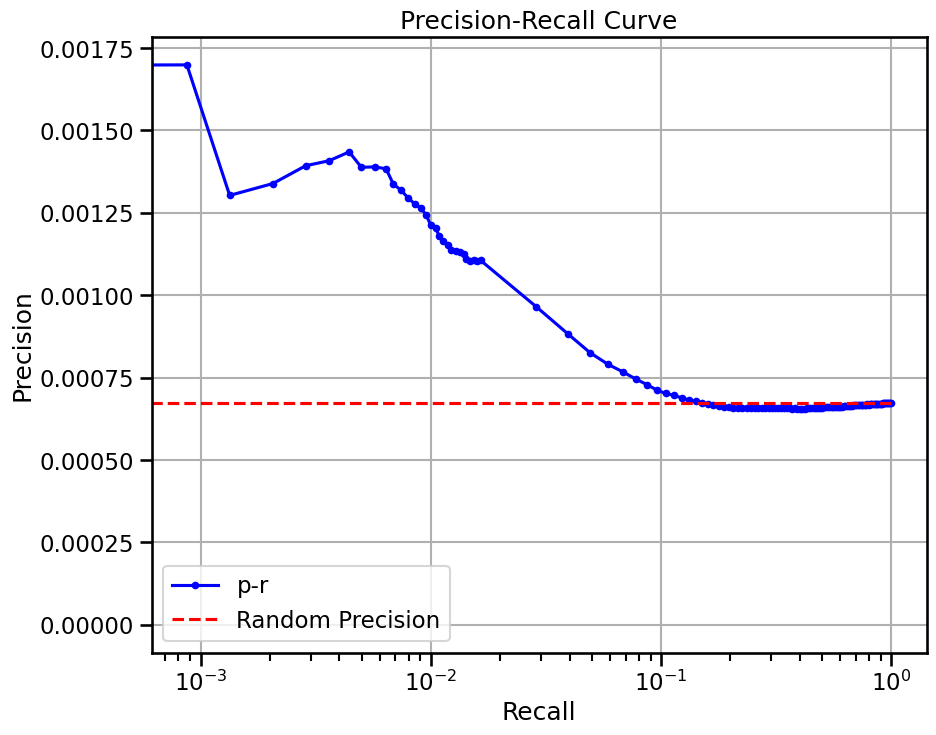

Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:165: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

base enrichment

Top central genes:

[]

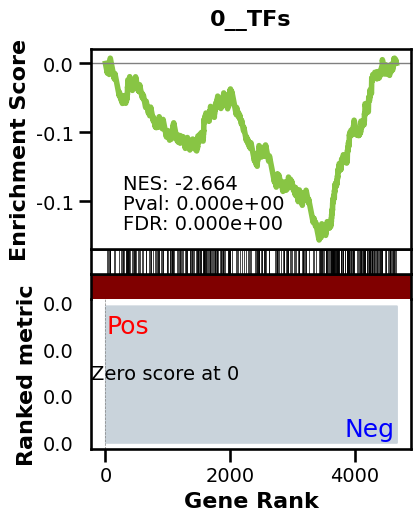

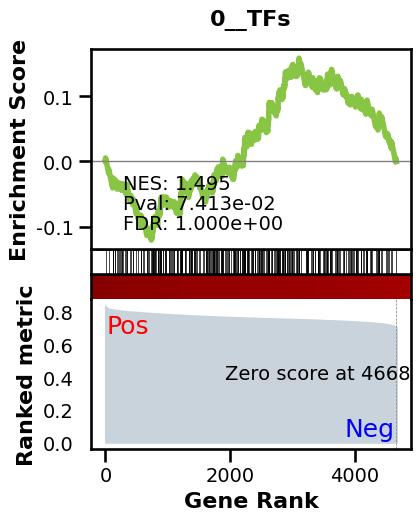

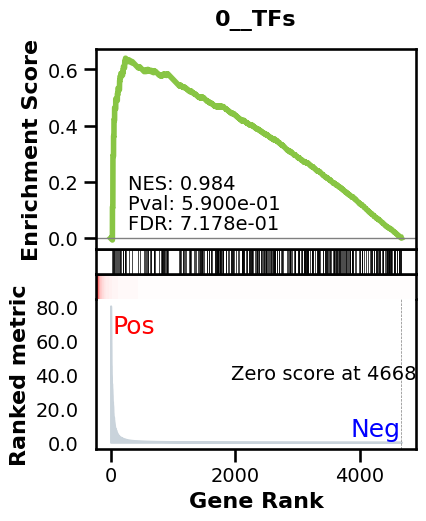

_________________________________________

TF specific enrichment

found some significant results for 

13.636363636363637

% TFs


_________________________________________

loading GT, 

omnipath

intersection of 3533 genes

intersection pct:

0.7566930820304134

precision: 

0.0019055303963943855


recall: 

1.0


random precision:

0.0019060699010366264


  0%|                                                                      | 0/128 [00:00<?, ?it/s]


  2%|▉                                                             | 2/128 [00:00<00:06, 19.55it/s]


  5%|██▉                                                           | 6/128 [00:00<00:03, 31.46it/s]


  9%|█████▋                                                       | 12/128 [00:00<00:02, 41.45it/s]


 14%|████████▌                                                    | 18/128 [00:00<00:02, 45.60it/s]


 19%|███████████▍                                                 | 24/128 [00:00<00:02, 48.02it/s]


 23%|██████████████▎                                              | 30/128 [00:00<00:01, 49.40it/s]


 28%|█████████████████▏                                           | 36/128 [00:00<00:01, 50.33it/s]


 33%|████████████████████                                         | 42/128 [00:00<00:01, 50.99it/s]


 38%|██████████████████████▉                                      | 48/128 [00:01<00:01, 51.38it/s]


 42%|█████████████████████████▋                                   | 54/128 [00:01<00:01, 51.72it/s]


 47%|████████████████████████████▌                                | 60/128 [00:01<00:01, 51.84it/s]


 52%|███████████████████████████████▍                             | 66/128 [00:01<00:01, 51.91it/s]


 56%|██████████████████████████████████▎                          | 72/128 [00:01<00:01, 52.05it/s]


 61%|█████████████████████████████████████▏                       | 78/128 [00:01<00:00, 52.06it/s]


 66%|████████████████████████████████████████                     | 84/128 [00:01<00:01, 42.05it/s]


 70%|██████████████████████████████████████████▉                  | 90/128 [00:01<00:00, 44.73it/s]


 75%|█████████████████████████████████████████████▊               | 96/128 [00:02<00:00, 46.67it/s]


 80%|███████████████████████████████████████████████▊            | 102/128 [00:02<00:00, 48.10it/s]


 84%|██████████████████████████████████████████████████▋         | 108/128 [00:02<00:00, 49.27it/s]


 89%|█████████████████████████████████████████████████████▍      | 114/128 [00:02<00:00, 50.10it/s]


 94%|████████████████████████████████████████████████████████▎   | 120/128 [00:02<00:00, 50.51it/s]


 98%|███████████████████████████████████████████████████████████ | 126/128 [00:02<00:00, 50.81it/s]

/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|████████████████████████████████████████████████████████████| 128/128 [00:02<00:00, 47.83it/s]

Area Under Precision-Recall Curve (AUPRC): 

0.002033410297676017

EPR:

2.1489381287909093

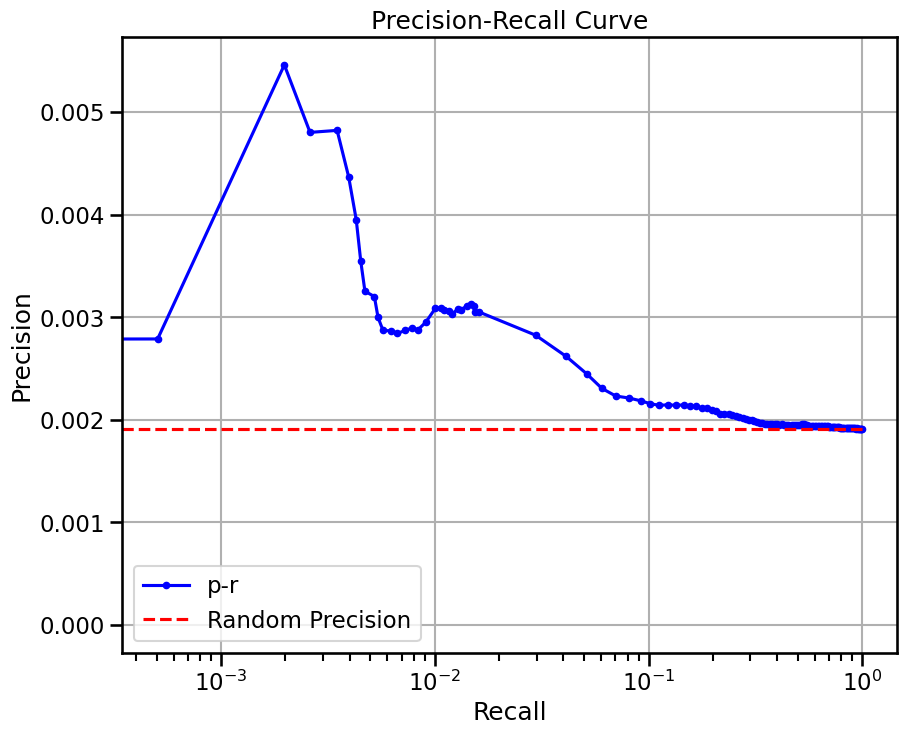

base enrichment

Top central genes:

[]

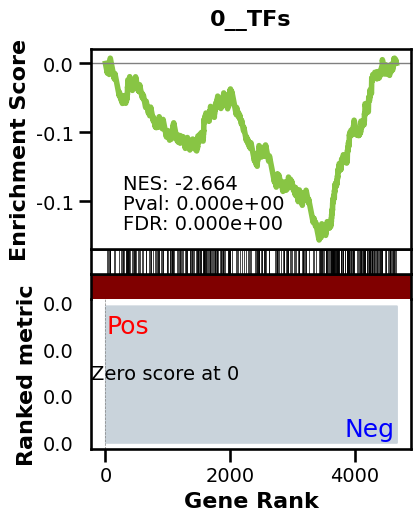

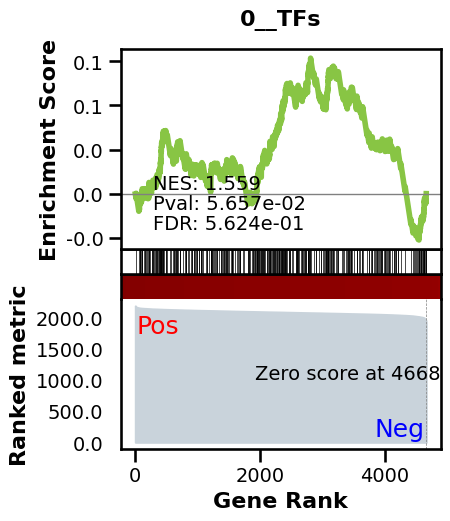

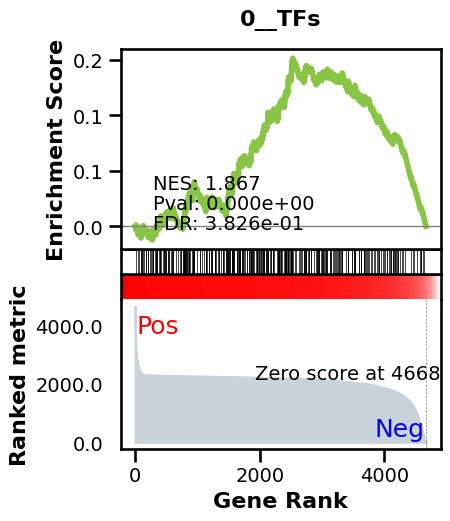

_________________________________________

TF specific enrichment

found some significant results for 

10.606060606060606

% TFs


_________________________________________

loading GT, 

omnipath

intersection of 3533 genes

intersection pct:

0.7566930820304134

precision: 

0.0019055303963943855


recall: 

1.0


random precision:

0.0019060699010366264


  0%|                                                                      | 0/128 [00:00<?, ?it/s]


  2%|▉                                                             | 2/128 [00:00<00:06, 19.15it/s]


  5%|██▉                                                           | 6/128 [00:00<00:04, 30.13it/s]


  9%|█████▏                                                       | 11/128 [00:00<00:03, 36.41it/s]


 12%|███████▋                                                     | 16/128 [00:00<00:02, 39.24it/s]


 16%|██████████                                                   | 21/128 [00:00<00:02, 40.85it/s]


 20%|████████████▍                                                | 26/128 [00:00<00:02, 41.83it/s]


 24%|██████████████▊                                              | 31/128 [00:00<00:02, 42.52it/s]


 28%|█████████████████▏                                           | 36/128 [00:00<00:02, 42.93it/s]


 32%|███████████████████▌                                         | 41/128 [00:01<00:02, 43.16it/s]


 36%|█████████████████████▉                                       | 46/128 [00:01<00:02, 35.44it/s]


 40%|████████████████████████▎                                    | 51/128 [00:01<00:02, 37.63it/s]


 44%|██████████████████████████▋                                  | 56/128 [00:01<00:01, 39.34it/s]


 48%|█████████████████████████████                                | 61/128 [00:01<00:01, 40.55it/s]


 52%|███████████████████████████████▍                             | 66/128 [00:01<00:01, 41.40it/s]


 55%|█████████████████████████████████▊                           | 71/128 [00:01<00:01, 42.05it/s]


 59%|████████████████████████████████████▏                        | 76/128 [00:01<00:01, 42.57it/s]


 63%|██████████████████████████████████████▌                      | 81/128 [00:02<00:01, 42.82it/s]


 67%|████████████████████████████████████████▉                    | 86/128 [00:02<00:00, 43.13it/s]


 71%|███████████████████████████████████████████▎                 | 91/128 [00:02<00:00, 43.10it/s]


 75%|█████████████████████████████████████████████▊               | 96/128 [00:02<00:00, 43.25it/s]


 79%|███████████████████████████████████████████████▎            | 101/128 [00:02<00:00, 43.24it/s]


 83%|█████████████████████████████████████████████████▋          | 106/128 [00:02<00:00, 43.31it/s]


 87%|████████████████████████████████████████████████████        | 111/128 [00:02<00:00, 43.47it/s]


 91%|██████████████████████████████████████████████████████▍     | 116/128 [00:02<00:00, 43.58it/s]


 95%|████████████████████████████████████████████████████████▋   | 121/128 [00:02<00:00, 43.58it/s]


 98%|███████████████████████████████████████████████████████████ | 126/128 [00:03<00:00, 43.60it/s]

/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|████████████████████████████████████████████████████████████| 128/128 [00:03<00:00, 41.37it/s]

Area Under Precision-Recall Curve (AUPRC): 

0.0019904053916952025

EPR:

1.613966868262037

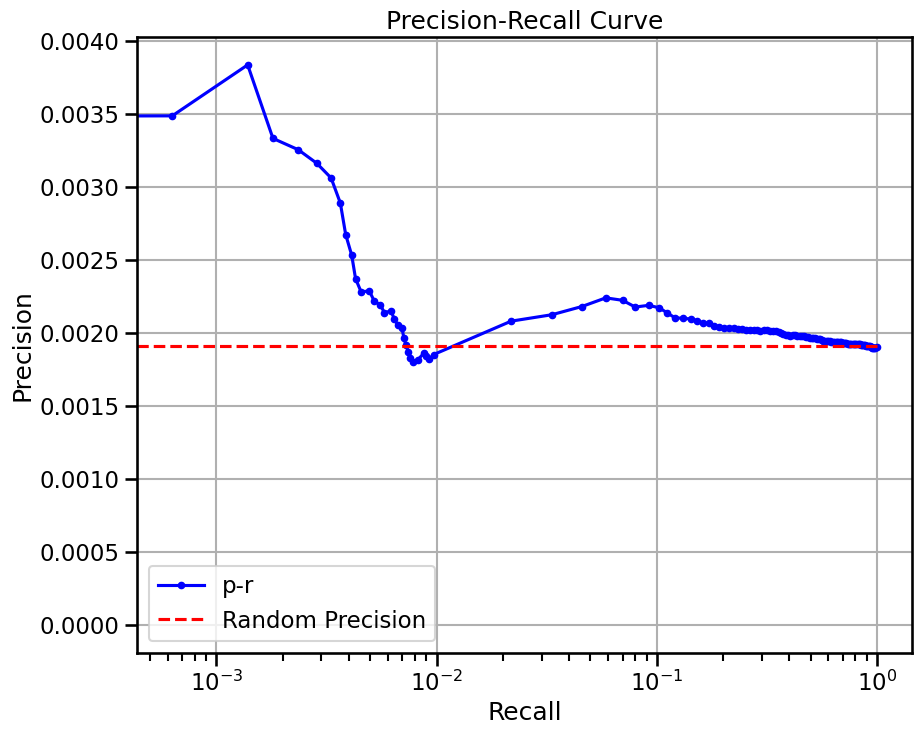

In [9]:
metrics = {}
clf_omni = None
for celltype in CELLTYPES:
    grn_inferer = GRNfer(model, adata[adata.X.sum(1) > 500],
                         how="random expr",
                         preprocess="softmax",
                         head_agg='mean',
                         filtration="none",
                         forward_mode="none",
                         organisms=['NCBITaxon:9606','NCBITaxon:10090'],
                         num_genes=2200,
                         max_cells=MAXCELLS,
                         doplot=False,
                         batch_size=32,
                         )
    grn = grn_inferer(layer=list(range(model.nlayers))[:], cell_type=celltype)
    grn.var.index = make_index_unique(grn.var['symbol'].astype(str))
    metrics[celltype+'_scprint'] = BenGRN(grn).scprint_benchmark()
    grn_inferer = GRNfer(model, adata[adata.X.sum(1) > 500],
                         how="most var across",
                         preprocess="softmax",
                         head_agg='none',
                         filtration="none",
                         forward_mode="none",
                         organisms=['NCBITaxon:9606','NCBITaxon:10090'],
                         num_genes=NUM_GENES,
                         max_cells=MAXCELLS,
                         doplot=False,
                         batch_size=32,
                         )
    grn = grn_inferer(layer=list(range(model.nlayers))[:], cell_type=celltype)
    grn.var.index = make_index_unique(grn.var['symbol'].astype(str))
    grn.varp['all'] = grn.varp['GRN']
    grn.varp['GRN'] = grn.varp['GRN'].mean(-1)
    metrics[celltype+'_scprint_meanmostvar'] = BenGRN(grn).scprint_benchmark()
    
    if clf_omni == None:
        grn.varp['GRN'] = grn.varp['all']
        grn, m, clf_omni = train_classifier(grn, C=0.01, train_size=0.5, class_weight={
                                        1: 200, 0: 1}, shuffle=False)
        grn.varp['GRN'] = grn.varp['classified']
    else:
        grn.varp["GRN"] = clf_omni.predict_proba(
            grn.varp['all'].reshape(-1, grn.varp['all'].shape[-1])
        ).reshape(len(grn.var), len(grn.var), 2)[:, :, 1]
    metrics[celltype+'_scprint_class'] = BenGRN(grn).scprint_benchmark()

### we have 50% of the omnipath coming from protein interaction type stuff. the model doesn't get necessarily a ton better without it.

### we have 75% less sources in the transcript only dataset and similar amount of targets.

### in the end we get that most transcript level ground truth doesn't overlap the ppi level one. so dropping it would help in the results but on both side. and it should not help too much with EPR


In [10]:
metrics

{'retinal rod cell_scprint': {'TF_enr': True,
  'enriched_terms_Regulators': ['celltype.gmt__Retinal progenitor cells'],
  'significant_enriched_TFtargets': 42.857142857142854,
  'precision': 0.0006618214377693767,
  'recall': 1.0,
  'rand_precision': 0.0006618672671051408,
  'auprc': 0.0006332263407250111,
  'epr': 2.291506801719913},
 'retinal rod cell_scprint_meanmostvar': {'enriched_terms_Targets': ['celltype.gmt__Langerhans cells',
   'celltype.gmt__Naive CD4+ T cells',
   'celltype.gmt__Memory CD8+ T cells',
   'celltype.gmt__Effector CD4+ T cells',
   'celltype.gmt__Memory CD4+ T cells',
   'celltype.gmt__-T cells',
   'celltype.gmt__Naive CD8+ T cells',
   'celltype.gmt__Effector CD8+ T cells'],
  'significant_enriched_TFtargets': 0.0,
  'precision': 0.0006598171363936281,
  'recall': 1.0,
  'rand_precision': 0.0006606188583090516,
  'auprc': 0.0009848623898070052,
  'epr': 6.809487421826298},
 'retinal rod cell_scprint_class': {'significant_enriched_TFtargets': 0.0,
  'precisi